In [1239]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# If using the BLEU score

In [1398]:
#bleu_score_type = "test_Simpson"
#bleu_score_type = "gap_Simpson"
#bleu_score_type = "test_Simpson_all_parameters"
#bleu_score_type = "test_Simpson_all_include_depth"

#bleu_score_type = "test_Simpson_two_datasets"
#bleu_score_type = "gap_Simpson_two_datasets"
#bleu_score_type = "test_Simpson_all_parameters_two_datasets"
#bleu_score_type = "test_Simpson_all_include_depth_two_datasets"

In [1649]:
# more settings
#bleu_score_type = "test"
#bleu_score_type = "gap"
#bleu_score_type = "test_all"
#bleu_score_type = "gap_all"
#bleu_score_type = "test_Simpson_sample"
#bleu_score_type = "test_Simpson_lr"
#bleu_score_type = "gap_Simpson_all_parameters"
#bleu_score_type = 'pretrained_models'

#bleu_score_type = "test_Simpson_IWSLT"
#bleu_score_type = "gap_Simpson_IWSLT"
#bleu_score_type = "test_Simpson_all_parameters_IWSLT"
#bleu_score_type = "test_Simpson_all_include_depth_IWSLT"

#bleu_score_type = "test_Simpson_all_parameters_WMT_adjust_measures_by_sample"
#bleu_score_type = "test_Simpson_all_include_depth_WMT_adjust_measures_by_sample"

#bleu_score_type = "test_Simpson_WMT_individual_param_depth"
#bleu_score_type = "test_Simpson_WMT_individual_param_width"
#bleu_score_type = "test_Simpson_WMT_individual_param_lr"
#bleu_score_type = "test_Simpson_WMT_individual_param_sample"
#bleu_score_type = "test_Simpson_WMT_individual_param_sample_no_adjustment"

#bleu_score_type = 'customize'
#bleu_score_type = 'combined_lr'
#bleu_score_type = 'combined_sample_normalized'
#bleu_score_type = 'combined_sample_unnormalized'
#bleu_score_type = 'combined_width'
#bleu_score_type = 'combined_lr_gap'
#bleu_score_type = 'combined_sample_normalized_gap'
#bleu_score_type = 'combined_sample_unnormalized_gap'
bleu_score_type = 'combined_width_gap'

In [1650]:
def merge_two_dicts(rank_correlations_aggregated_WMT, rank_correlations_aggregated_IWSLT):
    rank_correlations_aggregated_merged = {}
    for key in rank_correlations_aggregated_WMT:
        rank_correlations_aggregated_merged[key] = rank_correlations_aggregated_WMT[key]
        if key in rank_correlations_aggregated_IWSLT:
            rank_correlations_aggregated_merged[key] += rank_correlations_aggregated_IWSLT[key]
    return rank_correlations_aggregated_merged

In [1651]:
rank_correlations_min = None
rank_correlations_ave = None

if bleu_score_type=="test":
    rank_correlations_aggregated = {'W_CKA': [0.8207792207792207, 0.7727272727272727, 0.3181818181818181, 0.014285714285714285, 0.835064935064935, 0.7909090909090909, 0.4194805194805195, -0.1, 0.8636363636363636, 0.6519480519480519, 0.2792207792207792, -0.05844155844155843, 0.9804511278195487, 0.9533834586466164, 0.9729323308270676, 0.9774436090225563, 0.9233082706766916, 0.9518796992481202, 0.9909774436090225, 0.9699248120300751, 0.9909774436090225, 0.9864661654135337, 0.9669172932330825, 0.9624060150375938, 0.9624060150375938, 0.5684210526315789, 0.2646616541353383, 0.030075187969924807, 0.9759398496240601, 0.6, 0.35187969924812035, 0.03157894736842105, 0.9338345864661652, 0.5052631578947367, 0.28421052631578947, 0.06466165413533834, 0.9623376623376624, 0.9714285714285713, 0.8597402597402597, 0.8545454545454545, 0.8883116883116883, 0.9753246753246754, 0.92987012987013, 0.92987012987013, 0.8974025974025974, 0.896103896103896, 0.9363636363636364, 0.9597402597402598, 0.8831168831168831, 0.8740259740259739, 0.9415584415584415, 0.9744360902255638, 0.8616541353383457, 0.8466165413533834, 0.8556390977443609, 0.875187969924812, 0.9533834586466164, 0.793984962406015, 0.8601503759398496, 0.9443609022556391, 0.918796992481203, 0.8180451127819548, 0.7834586466165413, 0.6586466165413534, 0.7774436090225564, 0.7443609022556391, 0.9263157894736842, 0.5894736842105263, 0.7864661654135338, 0.7834586466165413, 0.9233082706766916, 0.7022556390977444, 0.8977443609022555, 0.837593984962406, 0.9082706766917292, -0.07532467532467534, 0.6181818181818182, 0.857142857142857, 0.8935064935064935, -0.0025974025974025974, 0.5571428571428572, 0.8051948051948051, 0.9142857142857143, -0.07532467532467534, 0.5974025974025974, 0.8974025974025974, 0.8727272727272727, -0.30526315789473685, -0.2902255639097744, -0.28872180451127816, 0.7924812030075187, -0.17593984962406017, -0.25864661654135335, -0.35187969924812035, 0.8150375939849623, -0.2045112781954887, -0.24060150375939846, -0.24962406015037594, 0.7924812030075187, 0.9293233082706768, 0.8406015037593983, 0.9127819548872179, 0.78796992481203, 0.8586466165413533, 0.8481203007518796, 0.7729323308270677, 0.8541353383458646, 0.8406015037593983, 0.9218045112781955, 0.8872180451127819, 0.9052631578947368, 0.9155844155844156, 0.6766233766233766, 0.37922077922077924, 0.26233766233766237, 0.016883116883116882, 0.8532467532467533, 0.7454545454545455, 0.45194805194805193, 0.23636363636363636, -0.012987012987012986, 0.8532467532467533, 0.6883116883116883, 0.35974025974025975, 0.09090909090909091, -0.04285714285714286, -0.156390977443609, -0.32481203007518794, -0.18496240601503755, -0.1639097744360902, -0.156390977443609, -0.24511278195488717, -0.16240601503759397, -0.14736842105263157, -0.1639097744360902, -0.17142857142857143, -0.19248120300751878, -0.14736842105263157, -0.35939849624060144, -0.1518796992481203, -0.11879699248120301, 0.030075187969924807, -0.30977443609022554, -0.14736842105263157, -0.07518796992481201, -0.037593984962406006, -0.35488721804511275, -0.14887218045112782, 0.03609022556390977, -0.012030075187969924], 'L2': [-0.8113024136887679, -0.8126015368491982, -0.9243261286462103, -0.9360182370900835, -0.835985753736945, -0.8931471727958812, -0.8190971526513501, -0.9632998234591215, -0.8528743548225398, -0.8320883842556537, -0.9542059613361087, -0.9620007002986909, -0.9815720889715784, -0.9544942382413281, -0.9725461387281616, -0.9785634388904396, -0.9244077374299386, -0.9514855881601892, -0.9905980392149953, -0.9710418136875922, -0.9909774436090225, -0.986085064093287, -0.9665288385658838, -0.963520188484745, -0.963520188484745, -0.957502888322467, -0.9680331636064532, -0.9954887218045112, -0.9759398496240601, -0.9454682879979112, -0.9548872180451128, -0.9789473684210527, -0.963520188484745, -0.9609022556390976, -0.9458646616541352, -0.9729323308270676, -0.9632998234591215, -0.972393685582134, -0.8597402597402597, -0.8554726011434005, -0.8606690937851218, -0.9762910550634251, -0.9295226212879316, -0.9308217444483621, -0.8970445422771722, -0.8788568180311471, -0.9360182370900835, -0.9607015771382607, -0.8840533106728686, -0.8736603253894256, -0.9230270054857798, 0.1413533834586466, 0.09552464007616128, -0.1572019667395095, -0.6521249050868648, 0.0022564875608542035, -0.060925164143063495, -0.08048138967046659, -0.640090304762309, 0.08649868983274446, 0.017299737966548896, -0.08649868983274446, -0.5092140262327652, -0.6220384042754755, -0.7529146828050193, -0.706766917293233, -0.9078601619836745, -0.5558481024904188, -0.7634449580890056, -0.7398496240601502, -0.8732606860505767, -0.6852200559793931, -0.867243385888299, -0.8075187969924811, -0.8792779862128545, 0.13965573974626505, 0.25397857786413786, 0.29295227267704904, 0.12666450814196134, 0.02663202478882264, 0.3605066770194284, 0.14615135554841693, 0.16953557243616363, 0.16044171031315105, 0.16823644927573328, -0.013640793184518914, 0.13186100078368285, 0.30613014575588693, 0.28872180451127816, 0.28421052631578947, 0.05490786398078562, 0.17675819226691258, 0.25864661654135335, 0.351259896972971, 0.21286199324057986, 0.20383604299716301, 0.2399398439708303, 0.24896579421424708, 0.23091389372741347, 0.29409554543133115, 0.12260249080641171, 0.13764574121210643, 0.0218127130882573, 0.08048138967046659, 0.11056789048185597, 0.012786762844840486, 0.14667169145552322, 0.14667169145552322, 0.22038361844342721, 0.13764574121210643, 0.09702896511673074, -0.9155844155844156, -0.676193605004009, -0.379993524425884, -0.26307243998715046, -0.00714517738236705, -0.85417347798297, -0.7463462556672491, -0.45144529824955454, -0.23579085361811264, 0.030529394270113756, -0.8528743548225398, -0.6891848366083128, -0.35920755385899805, -0.09158818281034128, 0.06820396592259456, -0.7950357839409644, -0.3873636979466383, -0.04738623877793827, 0.20233171795659358, -0.7107935816690741, -0.4039112733929024, -0.1286197909686896, 0.206844693078302, -0.787514158738117, -0.4279804740420139, -0.08048138967046659, 0.17374954218577365, 0.35276422201354046, 0.2986085205530396, 0.16622791698292633, 0.09552464007616128, 0.33320799648613736, 0.20985334315944093, 0.19481009275374622, 0.1677322420234958, 0.3587815221758183, 0.24746146917367765, 0.1481760164960927, 0.12410681584698119], 'L2_DIST': [-0.8116883116883117, -0.8129870129870129, -0.9246753246753248, -0.9363636363636364, -0.8363636363636363, -0.8935064935064935, -0.8194805194805195, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.9623376623376624, -0.9819548872180449, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9248120300751879, -0.9518796992481202, -0.9909774436090225, -0.9714285714285714, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9639097744360902, -0.9578947368421054, -0.9684210526315788, -0.9969924812030074, -0.9774436090225563, -0.9458646616541352, -0.956390977443609, -0.9804511278195487, -0.9639097744360902, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9636363636363635, -0.9727272727272727, -0.8597402597402597, -0.8558441558441559, -0.8610389610389609, -0.9766233766233766, -0.92987012987013, -0.9311688311688312, -0.8974025974025974, -0.8792207792207792, -0.9363636363636364, -0.961038961038961, -0.8844155844155844, -0.8740259740259739, -0.9233766233766234, 0.13984962406015036, 0.09624060150375939, -0.17593984962406017, -0.6887218045112782, -0.007518796992481202, -0.06766917293233082, -0.11729323308270674, -0.6496240601503759, 0.08270676691729321, -0.009022556390977442, -0.11729323308270674, -0.5218045112781955, -0.6225563909774435, -0.7533834586466165, -0.7082706766917292, -0.9082706766917292, -0.556390977443609, -0.7639097744360903, -0.7473684210526315, -0.8736842105263156, -0.6857142857142857, -0.8676691729323308, -0.8150375939849623, -0.8796992481203006, 0.13896103896103898, 0.2532467532467532, 0.2922077922077922, 0.125974025974026, 0.025974025974025972, 0.35974025974025975, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16753246753246753, -0.014285714285714285, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17593984962406017, 0.25864661654135335, 0.35037593984962395, 0.2120300751879699, 0.20300751879699244, 0.23909774436090225, 0.24812030075187969, 0.2300751879699248, 0.29323308270676685, 0.12180451127819547, 0.13684210526315788, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.012030075187969924, 0.14586466165413534, 0.14586466165413534, 0.21954887218045113, 0.13684210526315788, 0.09624060150375939, -0.916883116883117, -0.6766233766233766, -0.38051948051948054, -0.2636363636363636, -0.007792207792207793, -0.8545454545454545, -0.7467532467532467, -0.45194805194805193, -0.23636363636363636, 0.029870129870129873, -0.8532467532467533, -0.6896103896103896, -0.35974025974025975, -0.09220779220779221, 0.06753246753246753, -0.7984962406015037, -0.3984962406015037, -0.0631578947368421, 0.20150375939849624, -0.732330827067669, -0.4270676691729323, -0.1413533834586466, 0.20601503759398496, -0.78796992481203, -0.44060150375939844, -0.11578947368421053, 0.17293233082706763, 0.35187969924812035, 0.29774436090225564, 0.16541353383458643, 0.09473684210526315, 0.33233082706766914, 0.2120300751879699, 0.193984962406015, 0.16691729323308271, 0.3578947368421052, 0.24661654135338343, 0.14736842105263157, 0.12330827067669171], 'INVERSE_MARGIN': [0.7961038961038961, 0.6038961038961038, 0.461038961038961, 0.5051948051948052, 0.6064935064935064, 0.8584415584415584, 0.35844155844155845, 0.44935064935064933, 0.7064935064935066, 0.4974025974025974, 0.8428571428571429, 0.8805194805194804, 0.8812030075187969, 0.48872180451127817, 0.825563909774436, 0.4631578947368421, 0.6556390977443608, 0.021052631578947364, 0.6721804511278194, 0.4781954887218045, 0.8511278195488721, 0.7097744360902255, 0.5864661654135337, 0.6060150375939849, -0.14285714285714285, 0.9263157894736842, 0.1819548872180451, 0.7278195488721804, 0.42255639097744363, 0.6887218045112782, 0.8796992481203006, 0.7353383458646616, 0.706766917293233, 0.2541353383458646, 0.7684210526315788, 0.4812030075187969, 0.8376623376623376, 0.44675324675324674, 0.7220779220779221, 0.8168831168831169, 0.8701298701298701, 0.7974025974025974, 0.22987012987012984, 0.7935064935064934, 0.7610389610389611, 0.748051948051948, 0.851948051948052, 0.2155844155844156, 0.7454545454545455, 0.8207792207792207, 0.8337662337662338, -0.11578947368421053, 0.5969924812030075, 0.7203007518796991, 0.831578947368421, -0.02706766917293233, 0.6766917293233082, 0.7293233082706766, 0.9067669172932331, 0.045112781954887216, 0.6195488721804511, 0.706766917293233, 0.78796992481203, 0.5849624060150376, 0.806015037593985, 0.7142857142857143, 0.9127819548872179, 0.7007518796992479, 0.7699248120300751, 0.793984962406015, 0.7924812030075187, 0.6992481203007518, 0.8586466165413533, 0.7654135338345864, 0.8541353383458646, -0.032467532467532464, -0.12727272727272726, 0.42987012987012985, 0.7597402597402596, 0.16883116883116883, 0.4766233766233766, 0.5246753246753247, 0.8870129870129868, 0.044155844155844164, 0.28181818181818186, 0.8532467532467533, 0.1, 0.3954887218045112, 0.6932330827067669, 0.7774436090225564, 0.669172932330827, 0.34586466165413526, 0.5368421052631579, 0.8225563909774435, 0.7353383458646616, 0.8466165413533834, 0.5022556390977443, 0.8586466165413533, 0.37744360902255636, 0.18496240601503755, 0.33684210526315783, 0.4060150375939849, 0.5233082706766917, 0.6541353383458646, -0.045112781954887216, 0.793984962406015, 0.2721804511278195, 0.437593984962406, -0.048120300751879695, -0.030075187969924807, 0.5263157894736841, 0.535064935064935, 0.48441558441558447, 0.3922077922077922, 0.2857142857142857, 0.3051948051948052, 0.6597402597402597, 0.5168831168831168, 0.33506493506493507, 0.13116883116883118, 0.34285714285714286, 0.425974025974026, 0.5155844155844156, 0.17662337662337665, 0.044155844155844164, 0.07272727272727272, 0.018045112781954885, -0.09022556390977443, -0.10827067669172932, 0.06466165413533834, -0.156390977443609, -0.13684210526315788, -0.12180451127819547, 0.16240601503759397, -0.11729323308270674, -0.12932330827067667, -0.14285714285714285, -0.05714285714285714, 0.16541353383458643, 0.09172932330827067, 0.6300751879699248, 0.3233082706766917, 0.6285714285714286, 0.30526315789473685, 0.17142857142857143, 0.5097744360902255, -0.12481203007518797, -0.14436090225563908, 0.5624060150375939, -0.07218045112781954], 'LOG_PROD_OF_SPEC': [-0.8116883116883117, -0.8116883116883117, -0.9246753246753248, -0.9350649350649349, -0.835985753736945, -0.8931471727958812, -0.8190971526513501, -0.9632998234591215, -0.8532467532467533, -0.8324675324675326, -0.9542059613361087, -0.9620007002986909, -0.9815720889715784, -0.9544942382413281, -0.9729323308270676, -0.9785634388904396, -0.9248120300751879, -0.9514855881601892, -0.9909774436090225, -0.9710418136875922, -0.9921023642555648, -0.986085064093287, -0.9665288385658838, -0.963520188484745, -0.9639097744360902, -0.957502888322467, -0.9684210526315788, -0.9954887218045112, -0.9770591138498701, -0.9454682879979112, -0.9548872180451128, -0.980067763931009, -0.9639097744360902, -0.9624060150375938, -0.9469726130384807, -0.9744360902255638, -0.9636363636363635, -0.9727272727272727, -0.8584415584415584, -0.8558441558441559, -0.8870129870129868, -0.9766233766233766, -0.9295226212879316, -0.9308217444483621, -0.896103896103896, -0.8970445422771722, -0.9360182370900835, -0.9607015771382607, -0.8840533106728686, -0.8740259740259739, -0.9425138528922353, -0.9755547888093005, -0.8627304107665904, -0.8476871603608958, -0.8567131106043127, -0.8747650110911462, -0.9533834586466164, -0.7935314589003949, -0.8597217606854516, -0.9454682879979112, -0.918796992481203, -0.8191049845900759, -0.7819548872180451, -0.6581422052491426, -0.7774436090225564, -0.7458646616541353, -0.9263157894736842, -0.58796992481203, -0.787514158738117, -0.7845055086569781, -0.9229034123893693, -0.7037593984962407, -0.8977443609022555, -0.837593984962406, -0.9097744360902256, 0.13965573974626505, 0.2532467532467532, 0.2922077922077922, 0.12727272727272726, 0.02663202478882264, 0.36103896103896105, 0.14615135554841693, 0.16953557243616363, 0.16103896103896104, 0.16883116883116883, -0.013640793184518914, 0.13186100078368285, 0.30613014575588693, 0.28958257030962276, 0.2865739202284838, 0.05490786398078562, 0.17675819226691258, 0.2594960694982334, 0.351259896972971, 0.2120300751879699, 0.20383604299716301, 0.23909774436090225, 0.24896579421424708, 0.23091389372741347, 0.29473684210526313, 0.12260249080641171, 0.13684210526315788, 0.0218127130882573, 0.08048138967046659, 0.11056789048185597, 0.012786762844840486, 0.14586466165413534, 0.14667169145552322, 0.22038361844342721, 0.13764574121210643, 0.09702896511673074, -0.9155844155844156, -0.6753246753246753, -0.38051948051948054, -0.2636363636363636, -0.016883116883116882, -0.85417347798297, -0.7454545454545455, -0.4506493506493507, -0.23579085361811264, 0.012341670024088541, -0.8532467532467533, -0.6891848366083128, -0.35920755385899805, -0.09158818281034128, 0.04352062587441748, 0.15789473684210525, 0.32418204624272057, 0.18578414251032943, 0.16472359194235683, 0.15569764169894001, 0.24445281909253871, 0.16240601503759397, 0.1481760164960927, 0.16472359194235683, 0.17074089210463472, 0.1918014426726073, 0.14667169145552322, 0.35939849624060144, 0.2571428571428572, 0.11879699248120301, 0.044377588696799336, 0.30977443609022554, 0.17293233082706763, 0.14667169145552322, 0.09853329015730021, 0.3542685470541099, 0.21804511278195485, 0.11207221552242544, 0.1090635654412865], 'LOG_SUM_OF_SPEC': [-0.8116883116883117, -0.8116883116883117, -0.9246753246753248, -0.9350649350649349, -0.835985753736945, -0.8931471727958812, -0.8190971526513501, -0.9632998234591215, -0.8532467532467533, -0.8320883842556537, -0.9542059613361087, -0.9620007002986909, -0.9815720889715784, -0.9544942382413281, -0.9729323308270676, -0.9785634388904396, -0.9244077374299386, -0.9514855881601892, -0.9905980392149953, -0.9710418136875922, -0.9921023642555648, -0.986085064093287, -0.9665288385658838, -0.963520188484745, -0.963520188484745, -0.957502888322467, -0.9680331636064532, -0.9966153393772732, -0.9770591138498701, -0.9454682879979112, -0.9559985632818976, -0.980067763931009, -0.9639097744360902, -0.9624060150375938, -0.9469726130384807, -0.9744360902255638, -0.9636363636363635, -0.9727272727272727, -0.8584415584415584, -0.8558441558441559, -0.8870129870129868, -0.9766233766233766, -0.9295226212879316, -0.9308217444483621, -0.896103896103896, -0.8970445422771722, -0.9360182370900835, -0.9607015771382607, -0.8840533106728686, -0.8740259740259739, -0.9425138528922353, -0.9755547888093005, -0.8627304107665904, -0.8476871603608958, -0.8567131106043127, -0.8747650110911462, -0.9533834586466164, -0.7935314589003949, -0.8597217606854516, -0.9454682879979112, -0.9183904372676608, -0.8191049845900759, -0.7830011836164085, -0.6581422052491426, -0.7769838834541307, -0.7458646616541353, -0.9259120624705082, -0.58796992481203, -0.787514158738117, -0.7845055086569781, -0.9229034123893693, -0.7037593984962407, -0.8973298866996882, -0.837593984962406, -0.9097744360902256, 0.13965573974626505, 0.2532467532467532, 0.2922077922077922, 0.12727272727272726, 0.02663202478882264, 0.36103896103896105, 0.14615135554841693, 0.16953557243616363, 0.16103896103896104, 0.16823644927573328, -0.013640793184518914, 0.13186100078368285, 0.30613014575588693, 0.28958257030962276, 0.2865739202284838, 0.05490786398078562, 0.17675819226691258, 0.2594960694982334, 0.351259896972971, 0.21286199324057986, 0.20383604299716301, 0.2399398439708303, 0.24896579421424708, 0.23091389372741347, 0.29409554543133115, 0.12260249080641171, 0.13764574121210643, 0.0218127130882573, 0.08048138967046659, 0.11056789048185597, 0.012786762844840486, 0.14586466165413534, 0.14667169145552322, 0.22038361844342721, 0.13764574121210643, 0.09702896511673074, -0.9155844155844156, -0.6753246753246753, -0.38051948051948054, -0.2636363636363636, -0.016883116883116882, -0.85417347798297, -0.7463462556672491, -0.4506493506493507, -0.23579085361811264, 0.012341670024088541, -0.8528743548225398, -0.6891848366083128, -0.35920755385899805, -0.09158818281034128, 0.04352062587441748, 0.1572019667395095, 0.32418204624272057, 0.18578414251032943, 0.16472359194235683, 0.15569764169894001, 0.24445281909253871, 0.16240601503759397, 0.1481760164960927, 0.16472359194235683, 0.17074089210463472, 0.1918014426726073, 0.14667169145552322, 0.35939849624060144, 0.25799174445766393, 0.11879699248120301, 0.044377588696799336, 0.3091387958370259, 0.17374954218577365, 0.14667169145552322, 0.09853329015730021, 0.3542685470541099, 0.21804511278195485, 0.11207221552242544, 0.1090635654412865], 'LOG_PROD_OF_SPEC_OVER_MARGIN': [-0.8103896103896104, -0.8129870129870129, -0.9233766233766234, -0.9350649350649349, -0.8363636363636363, -0.8935064935064935, -0.8181818181818182, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.961038961038961, -0.9804511278195487, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9233082706766916, -0.9503759398496241, -0.9909774436090225, -0.9699248120300751, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9624060150375938, -0.9578947368421054, -0.9669172932330825, -0.9969924812030074, -0.9774436090225563, -0.9443609022556391, -0.956390977443609, -0.9789473684210527, -0.9624060150375938, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9584415584415583, -0.9714285714285713, -0.8597402597402597, -0.8558441558441559, -0.8883116883116883, -0.9636363636363635, -0.92987012987013, -0.9311688311688312, -0.8974025974025974, -0.8974025974025974, -0.9311688311688312, -0.961038961038961, -0.8844155844155844, -0.8740259740259739, -0.9428571428571428, -0.9744360902255638, -0.8616541353383457, -0.8466165413533834, -0.8571428571428572, -0.8736842105263156, -0.9533834586466164, -0.7924812030075187, -0.8586466165413533, -0.9458646616541352, -0.9172932330827066, -0.8180451127819548, -0.7834586466165413, -0.6571428571428571, -0.7774436090225564, -0.7458646616541353, -0.9248120300751879, -0.5894736842105263, -0.7864661654135338, -0.7834586466165413, -0.9233082706766916, -0.7037593984962407, -0.8977443609022555, -0.837593984962406, -0.9097744360902256, 0.13896103896103898, 0.2532467532467532, 0.2935064935064935, 0.125974025974026, 0.025974025974025972, 0.36103896103896105, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16883116883116883, -0.012987012987012986, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17744360902255638, 0.25864661654135335, 0.35037593984962395, 0.21353383458646616, 0.20300751879699244, 0.24060150375939846, 0.24812030075187969, 0.23157894736842105, 0.29323308270676685, 0.12180451127819547, 0.13834586466165413, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.013533834586466165, 0.14586466165413534, 0.14586466165413534, 0.22105263157894736, 0.13834586466165413, 0.09624060150375939, -0.9064935064935065, -0.6766233766233766, -0.38051948051948054, -0.2636363636363636, -0.016883116883116882, -0.8441558441558441, -0.7467532467532467, -0.45194805194805193, -0.23636363636363636, 0.011688311688311687, -0.8428571428571429, -0.6896103896103896, -0.35974025974025975, -0.09220779220779221, 0.04285714285714286, 0.15789473684210525, 0.32481203007518794, 0.18496240601503755, 0.16541353383458643, 0.15488721804511277, 0.24511278195488717, 0.16240601503759397, 0.14736842105263157, 0.16541353383458643, 0.17142857142857143, 0.19097744360902258, 0.14586466165413534, 0.35939849624060144, 0.2571428571428572, 0.11729323308270674, 0.045112781954887216, 0.3082706766917293, 0.17293233082706763, 0.14736842105263157, 0.09774436090225563, 0.3533834586466165, 0.21804511278195485, 0.11127819548872178, 0.10827067669172932], 'LOG_SPEC_INIT_MAIN': [-0.8116883116883117, -0.8129870129870129, -0.9246753246753248, -0.9363636363636364, -0.8363636363636363, -0.8935064935064935, -0.8194805194805195, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.9623376623376624, -0.9819548872180449, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9248120300751879, -0.9518796992481202, -0.9909774436090225, -0.9714285714285714, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9639097744360902, -0.9578947368421054, -0.9684210526315788, -0.9969924812030074, -0.9774436090225563, -0.9458646616541352, -0.956390977443609, -0.9804511278195487, -0.9639097744360902, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9636363636363635, -0.9727272727272727, -0.8597402597402597, -0.8558441558441559, -0.8883116883116883, -0.9766233766233766, -0.92987012987013, -0.9311688311688312, -0.8974025974025974, -0.8974025974025974, -0.9363636363636364, -0.961038961038961, -0.8844155844155844, -0.8740259740259739, -0.9428571428571428, -0.9759398496240601, -0.863157894736842, -0.8481203007518796, -0.8571428571428572, -0.875187969924812, -0.9548872180451128, -0.793984962406015, -0.8601503759398496, -0.9458646616541352, -0.918796992481203, -0.819548872180451, -0.7834586466165413, -0.6586466165413534, -0.7774436090225564, -0.7458646616541353, -0.9263157894736842, -0.5894736842105263, -0.78796992481203, -0.7849624060150376, -0.9233082706766916, -0.7037593984962407, -0.8977443609022555, -0.837593984962406, -0.9097744360902256, 0.13896103896103898, 0.2532467532467532, 0.2922077922077922, 0.125974025974026, 0.025974025974025972, 0.35974025974025975, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16753246753246753, -0.014285714285714285, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17593984962406017, 0.25864661654135335, 0.35037593984962395, 0.2120300751879699, 0.20300751879699244, 0.23909774436090225, 0.24812030075187969, 0.2300751879699248, 0.29323308270676685, 0.12180451127819547, 0.13684210526315788, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.012030075187969924, 0.14586466165413534, 0.14586466165413534, 0.21954887218045113, 0.13684210526315788, 0.09624060150375939, -0.916883116883117, -0.6766233766233766, -0.38051948051948054, -0.2636363636363636, -0.01818181818181818, -0.8545454545454545, -0.7467532467532467, -0.45194805194805193, -0.23636363636363636, 0.011688311688311687, -0.8532467532467533, -0.6896103896103896, -0.35974025974025975, -0.09220779220779221, 0.04285714285714286, 0.156390977443609, 0.3233082706766917, 0.18496240601503755, 0.1639097744360902, 0.15488721804511277, 0.24360902255639094, 0.16240601503759397, 0.14736842105263157, 0.1639097744360902, 0.16992481203007515, 0.19097744360902258, 0.14586466165413534, 0.35939849624060144, 0.2571428571428572, 0.11729323308270674, 0.04360902255639097, 0.3082706766917293, 0.17293233082706763, 0.14586466165413534, 0.09774436090225563, 0.3533834586466165, 0.21804511278195485, 0.11127819548872178, 0.10827067669172932], 'LOG_SPEC_ORIG_MAIN': [-0.8103896103896104, -0.8116883116883117, -0.9246753246753248, -0.9363636363636364, -0.8363636363636363, -0.8935064935064935, -0.8181818181818182, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.961038961038961, -0.9804511278195487, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9233082706766916, -0.9503759398496241, -0.9909774436090225, -0.9699248120300751, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9624060150375938, -0.9578947368421054, -0.9669172932330825, -0.9969924812030074, -0.9774436090225563, -0.9443609022556391, -0.956390977443609, -0.9789473684210527, -0.9624060150375938, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9597402597402598, -0.9727272727272727, -0.8597402597402597, -0.8558441558441559, -0.8883116883116883, -0.9636363636363635, -0.92987012987013, -0.9311688311688312, -0.8974025974025974, -0.8974025974025974, -0.9311688311688312, -0.961038961038961, -0.8844155844155844, -0.8740259740259739, -0.9428571428571428, -0.9744360902255638, -0.8616541353383457, -0.8466165413533834, -0.8571428571428572, -0.8736842105263156, -0.9533834586466164, -0.7924812030075187, -0.8586466165413533, -0.9458646616541352, -0.9172932330827066, -0.8180451127819548, -0.7834586466165413, -0.6571428571428571, -0.7774436090225564, -0.7458646616541353, -0.9248120300751879, -0.5894736842105263, -0.7864661654135338, -0.7834586466165413, -0.9233082706766916, -0.7037593984962407, -0.8977443609022555, -0.837593984962406, -0.9097744360902256, 0.14025974025974028, 0.2545454545454545, 0.2935064935064935, 0.125974025974026, 0.025974025974025972, 0.36103896103896105, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16883116883116883, -0.012987012987012986, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17744360902255638, 0.25864661654135335, 0.35037593984962395, 0.21353383458646616, 0.20300751879699244, 0.24060150375939846, 0.24812030075187969, 0.23157894736842105, 0.29323308270676685, 0.12180451127819547, 0.13834586466165413, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.013533834586466165, 0.14586466165413534, 0.14586466165413534, 0.22105263157894736, 0.13834586466165413, 0.09624060150375939, -0.9116883116883117, -0.6753246753246753, -0.38051948051948054, -0.2636363636363636, -0.016883116883116882, -0.8441558441558441, -0.7467532467532467, -0.45194805194805193, -0.23636363636363636, 0.011688311688311687, -0.8428571428571429, -0.6896103896103896, -0.35974025974025975, -0.09220779220779221, 0.04285714285714286, 0.15789473684210525, 0.32481203007518794, 0.18496240601503755, 0.16541353383458643, 0.15488721804511277, 0.24511278195488717, 0.16240601503759397, 0.14736842105263157, 0.16541353383458643, 0.17142857142857143, 0.19097744360902258, 0.14586466165413534, 0.35939849624060144, 0.2571428571428572, 0.11729323308270674, 0.045112781954887216, 0.3082706766917293, 0.17293233082706763, 0.14736842105263157, 0.09774436090225563, 0.3533834586466165, 0.21804511278195485, 0.11127819548872178, 0.10827067669172932], 'LOG_SUM_OF_SPEC_OVER_MARGIN': [-0.8103896103896104, -0.8129870129870129, -0.9233766233766234, -0.9350649350649349, -0.8363636363636363, -0.8935064935064935, -0.8181818181818182, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.961038961038961, -0.9804511278195487, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9233082706766916, -0.9503759398496241, -0.9909774436090225, -0.9699248120300751, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9624060150375938, -0.9578947368421054, -0.9669172932330825, -0.9969924812030074, -0.9774436090225563, -0.9443609022556391, -0.956390977443609, -0.980067763931009, -0.9624060150375938, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9584415584415583, -0.9714285714285713, -0.8597402597402597, -0.8558441558441559, -0.8883116883116883, -0.9636363636363635, -0.92987012987013, -0.9311688311688312, -0.8974025974025974, -0.8974025974025974, -0.9311688311688312, -0.961038961038961, -0.8844155844155844, -0.8740259740259739, -0.9428571428571428, -0.9744360902255638, -0.8616541353383457, -0.8466165413533834, -0.8571428571428572, -0.8736842105263156, -0.9533834586466164, -0.7924812030075187, -0.8586466165413533, -0.9458646616541352, -0.9172932330827066, -0.8180451127819548, -0.7834586466165413, -0.6571428571428571, -0.7774436090225564, -0.7458646616541353, -0.9248120300751879, -0.5894736842105263, -0.7864661654135338, -0.7834586466165413, -0.9233082706766916, -0.7037593984962407, -0.8977443609022555, -0.837593984962406, -0.9097744360902256, 0.13896103896103898, 0.2532467532467532, 0.2935064935064935, 0.125974025974026, 0.025974025974025972, 0.36103896103896105, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16883116883116883, -0.012987012987012986, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17744360902255638, 0.25864661654135335, 0.35037593984962395, 0.21353383458646616, 0.20300751879699244, 0.2399398439708303, 0.24812030075187969, 0.23157894736842105, 0.29323308270676685, 0.12180451127819547, 0.13834586466165413, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.013533834586466165, 0.14586466165413534, 0.14586466165413534, 0.22105263157894736, 0.13834586466165413, 0.09624060150375939, -0.9064935064935065, -0.6766233766233766, -0.38051948051948054, -0.2636363636363636, -0.016883116883116882, -0.8441558441558441, -0.7467532467532467, -0.45194805194805193, -0.23636363636363636, 0.011688311688311687, -0.8428571428571429, -0.6896103896103896, -0.35974025974025975, -0.09220779220779221, 0.04285714285714286, 0.15789473684210525, 0.32481203007518794, 0.18496240601503755, 0.16541353383458643, 0.15488721804511277, 0.24511278195488717, 0.16240601503759397, 0.14736842105263157, 0.16541353383458643, 0.17142857142857143, 0.19097744360902258, 0.14586466165413534, 0.35939849624060144, 0.2571428571428572, 0.11729323308270674, 0.045112781954887216, 0.3082706766917293, 0.17293233082706763, 0.14736842105263157, 0.09774436090225563, 0.3533834586466165, 0.21804511278195485, 0.11127819548872178, 0.10827067669172932], 'LOG_PROD_OF_FRO': [-0.8113024136887679, -0.8126015368491982, -0.9243261286462103, -0.9360182370900835, -0.835985753736945, -0.8931471727958812, -0.8190971526513501, -0.9632998234591215, -0.8528743548225398, -0.8320883842556537, -0.9542059613361087, -0.9620007002986909, -0.9815720889715784, -0.9544942382413281, -0.9725461387281616, -0.9785634388904396, -0.9244077374299386, -0.9514855881601892, -0.9905980392149953, -0.9710418136875922, -0.9921023642555648, -0.986085064093287, -0.9665288385658838, -0.9624060150375938, -0.963520188484745, -0.957502888322467, -0.9680331636064532, -0.9966153393772732, -0.9770591138498701, -0.9454682879979112, -0.9559985632818976, -0.980067763931009, -0.963520188484745, -0.9620158634441753, -0.9469726130384807, -0.9740504637687311, -0.9632998234591215, -0.972393685582134, -0.8593699706246916, -0.8554726011434005, -0.8879506801541598, -0.9753246753246754, -0.9295226212879316, -0.9308217444483621, -0.8970445422771722, -0.8970445422771722, -0.9360182370900835, -0.9607015771382607, -0.8840533106728686, -0.8736603253894256, -0.9425138528922353, -0.9755547888093005, -0.8627304107665904, -0.8476871603608958, -0.8567131106043127, -0.8747650110911462, -0.9544942382413281, -0.7935314589003949, -0.8597217606854516, -0.9454682879979112, -0.9183904372676608, -0.8191049845900759, -0.7830011836164085, -0.6581422052491426, -0.7769838834541307, -0.7453930576021719, -0.9259120624705082, -0.5889432533829471, -0.787514158738117, -0.7845055086569781, -0.9229034123893693, -0.7032719564662268, -0.8973298866996882, -0.8371568850769096, -0.9093644870242439, 0.13965573974626505, 0.25397857786413786, 0.29295227267704904, 0.12666450814196134, 0.02663202478882264, 0.36103896103896105, 0.14615135554841693, 0.16953557243616363, 0.16044171031315105, 0.16823644927573328, -0.013640793184518914, 0.13186100078368285, 0.30613014575588693, 0.28958257030962276, 0.2865739202284838, 0.05490786398078562, 0.17675819226691258, 0.2594960694982334, 0.351259896972971, 0.21286199324057986, 0.20383604299716301, 0.2399398439708303, 0.24896579421424708, 0.23091389372741347, 0.29409554543133115, 0.12260249080641171, 0.13764574121210643, 0.0218127130882573, 0.08048138967046659, 0.11056789048185597, 0.012786762844840486, 0.14667169145552322, 0.14667169145552322, 0.22038361844342721, 0.13764574121210643, 0.09702896511673074, -0.9165313896836279, -0.676193605004009, -0.379993524425884, -0.26307243998715046, -0.01753816266581003, -0.85417347798297, -0.7463462556672491, -0.45144529824955454, -0.23579085361811264, 0.012341670024088541, -0.8528743548225398, -0.6891848366083128, -0.35844155844155845, -0.09090909090909091, 0.04352062587441748, 0.1572019667395095, 0.32418204624272057, 0.18578414251032943, 0.16472359194235683, 0.15569764169894001, 0.24445281909253871, 0.16321926690178737, 0.1481760164960927, 0.16472359194235683, 0.17074089210463472, 0.1918014426726073, 0.14667169145552322, 0.36028584721638784, 0.25799174445766393, 0.11808951568470333, 0.044377588696799336, 0.3091387958370259, 0.17374954218577365, 0.14667169145552322, 0.09853329015730021, 0.3542685470541099, 0.21887929340285772, 0.11207221552242544, 0.1090635654412865], 'LOG_SUM_OF_FRO': [-0.8113024136887679, -0.8126015368491982, -0.9243261286462103, -0.9360182370900835, -0.835985753736945, -0.8931471727958812, -0.8190971526513501, -0.9632998234591215, -0.8528743548225398, -0.8320883842556537, -0.9542059613361087, -0.9620007002986909, -0.9815720889715784, -0.9544942382413281, -0.9725461387281616, -0.9785634388904396, -0.9244077374299386, -0.9514855881601892, -0.9905980392149953, -0.9710418136875922, -0.9921023642555648, -0.986085064093287, -0.9665288385658838, -0.9624060150375938, -0.963520188484745, -0.957502888322467, -0.9680331636064532, -0.9966153393772732, -0.9770591138498701, -0.9454682879979112, -0.9559985632818976, -0.980067763931009, -0.963520188484745, -0.9620158634441753, -0.9469726130384807, -0.9740504637687311, -0.9632998234591215, -0.972393685582134, -0.8593699706246916, -0.8554726011434005, -0.8879506801541598, -0.9762910550634251, -0.9295226212879316, -0.9308217444483621, -0.8970445422771722, -0.8970445422771722, -0.9360182370900835, -0.9607015771382607, -0.8840533106728686, -0.8736603253894256, -0.9425138528922353, -0.9755547888093005, -0.8627304107665904, -0.8476871603608958, -0.8567131106043127, -0.8747650110911462, -0.9544942382413281, -0.7935314589003949, -0.8597217606854516, -0.9454682879979112, -0.9183904372676608, -0.8191049845900759, -0.7830011836164085, -0.6581422052491426, -0.7769838834541307, -0.7453930576021719, -0.9259120624705082, -0.5889432533829471, -0.787514158738117, -0.7845055086569781, -0.9229034123893693, -0.7032719564662268, -0.8973298866996882, -0.8371568850769096, -0.9093644870242439, 0.13965573974626505, 0.25397857786413786, 0.29295227267704904, 0.12666450814196134, 0.02663202478882264, 0.3605066770194284, 0.14615135554841693, 0.16953557243616363, 0.16044171031315105, 0.16823644927573328, -0.013640793184518914, 0.13186100078368285, 0.30613014575588693, 0.28958257030962276, 0.2865739202284838, 0.05490786398078562, 0.17675819226691258, 0.2594960694982334, 0.351259896972971, 0.21286199324057986, 0.20383604299716301, 0.2399398439708303, 0.24896579421424708, 0.23091389372741347, 0.29409554543133115, 0.12260249080641171, 0.13764574121210643, 0.0218127130882573, 0.08048138967046659, 0.11056789048185597, 0.012786762844840486, 0.14667169145552322, 0.14667169145552322, 0.22038361844342721, 0.13764574121210643, 0.09702896511673074, -0.9165313896836279, -0.676193605004009, -0.379993524425884, -0.26307243998715046, -0.01753816266581003, -0.85417347798297, -0.7463462556672491, -0.45144529824955454, -0.23579085361811264, 0.012341670024088541, -0.8528743548225398, -0.6891848366083128, -0.35920755385899805, -0.09090909090909091, 0.04352062587441748, 0.1572019667395095, 0.32418204624272057, 0.18578414251032943, 0.16472359194235683, 0.15569764169894001, 0.24445281909253871, 0.16321926690178737, 0.1481760164960927, 0.16472359194235683, 0.17074089210463472, 0.1918014426726073, 0.14667169145552322, 0.36028584721638784, 0.25799174445766393, 0.11808951568470333, 0.044377588696799336, 0.3091387958370259, 0.17374954218577365, 0.14667169145552322, 0.09853329015730021, 0.3542685470541099, 0.21887929340285772, 0.11207221552242544, 0.1090635654412865], 'LOG_PROD_OF_FRO_OVER_MARGIN': [-0.8103896103896104, -0.8129870129870129, -0.9233766233766234, -0.9363636363636364, -0.8363636363636363, -0.8935064935064935, -0.8181818181818182, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.961038961038961, -0.9804511278195487, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9233082706766916, -0.9503759398496241, -0.9909774436090225, -0.9699248120300751, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9624060150375938, -0.9578947368421054, -0.9669172932330825, -0.9969924812030074, -0.9774436090225563, -0.9443609022556391, -0.956390977443609, -0.9789473684210527, -0.9624060150375938, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.8025974025974025, -0.9246753246753248, -0.8493506493506494, -0.851948051948052, -0.8883116883116883, -0.7948051948051948, -0.8831168831168831, -0.9207792207792208, -0.8935064935064935, -0.8974025974025974, -0.7753246753246753, -0.9142857142857143, -0.8740259740259739, -0.8701298701298701, -0.9428571428571428, -0.9699248120300751, -0.8616541353383457, -0.8466165413533834, -0.8571428571428572, -0.8691729323308269, -0.9533834586466164, -0.7924812030075187, -0.8586466165413533, -0.9413533834586465, -0.9172932330827066, -0.8180451127819548, -0.7834586466165413, -0.6571428571428571, -0.7774436090225564, -0.7458646616541353, -0.9248120300751879, -0.5894736842105263, -0.7864661654135338, -0.7834586466165413, -0.9233082706766916, -0.7037593984962407, -0.8977443609022555, -0.837593984962406, -0.9097744360902256, 0.13896103896103898, 0.2532467532467532, 0.2935064935064935, 0.125974025974026, 0.025974025974025972, 0.36103896103896105, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16883116883116883, -0.012987012987012986, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17744360902255638, 0.25864661654135335, 0.35037593984962395, 0.21353383458646616, 0.20300751879699244, 0.24060150375939846, 0.24812030075187969, 0.23157894736842105, 0.29323308270676685, 0.12180451127819547, 0.13834586466165413, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.013533834586466165, 0.14586466165413534, 0.14586466165413534, 0.22105263157894736, 0.13834586466165413, 0.09624060150375939, -0.7987012987012986, -0.6441558441558441, -0.3701298701298701, -0.2597402597402597, -0.016883116883116882, -0.7077922077922078, -0.7116883116883117, -0.44155844155844154, -0.2324675324675325, 0.011688311688311687, -0.7103896103896103, -0.6584415584415585, -0.34935064935064936, -0.08831168831168833, 0.04285714285714286, 0.16240601503759397, 0.32481203007518794, 0.18496240601503755, 0.16541353383458643, 0.15488721804511277, 0.24511278195488717, 0.16240601503759397, 0.14736842105263157, 0.16541353383458643, 0.17142857142857143, 0.19097744360902258, 0.14586466165413534, 0.35939849624060144, 0.2571428571428572, 0.11729323308270674, 0.045112781954887216, 0.3082706766917293, 0.17293233082706763, 0.14736842105263157, 0.09774436090225563, 0.3533834586466165, 0.21804511278195485, 0.11127819548872178, 0.10827067669172932], 'LOG_SUM_OF_FRO_OVER_MARGIN': [-0.8103896103896104, -0.8129870129870129, -0.9233766233766234, -0.9363636363636364, -0.835985753736945, -0.8935064935064935, -0.8181818181818182, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.961038961038961, -0.9804511278195487, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9233082706766916, -0.9503759398496241, -0.9909774436090225, -0.9699248120300751, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9624060150375938, -0.9578947368421054, -0.9669172932330825, -0.9969924812030074, -0.9774436090225563, -0.9443609022556391, -0.956390977443609, -0.9789473684210527, -0.9624060150375938, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.8025974025974025, -0.9246753246753248, -0.8493506493506494, -0.851948051948052, -0.8883116883116883, -0.7948051948051948, -0.8831168831168831, -0.9207792207792208, -0.8935064935064935, -0.8974025974025974, -0.7753246753246753, -0.9142857142857143, -0.8740259740259739, -0.8701298701298701, -0.9428571428571428, -0.9699248120300751, -0.8616541353383457, -0.8466165413533834, -0.8571428571428572, -0.8691729323308269, -0.9533834586466164, -0.7924812030075187, -0.8597217606854516, -0.9413533834586465, -0.9172932330827066, -0.8180451127819548, -0.7834586466165413, -0.6571428571428571, -0.7774436090225564, -0.7458646616541353, -0.9248120300751879, -0.5894736842105263, -0.7864661654135338, -0.7834586466165413, -0.9233082706766916, -0.7037593984962407, -0.8977443609022555, -0.837593984962406, -0.9097744360902256, 0.13896103896103898, 0.2532467532467532, 0.2935064935064935, 0.125974025974026, 0.025974025974025972, 0.36103896103896105, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16883116883116883, -0.012987012987012986, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17744360902255638, 0.25864661654135335, 0.35037593984962395, 0.21353383458646616, 0.20300751879699244, 0.24060150375939846, 0.24812030075187969, 0.23157894736842105, 0.29323308270676685, 0.12180451127819547, 0.13834586466165413, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.013533834586466165, 0.14586466165413534, 0.14586466165413534, 0.22105263157894736, 0.13834586466165413, 0.09624060150375939, -0.7987012987012986, -0.6441558441558441, -0.3701298701298701, -0.2597402597402597, -0.016883116883116882, -0.7077922077922078, -0.7116883116883117, -0.44155844155844154, -0.2324675324675325, 0.011688311688311687, -0.7103896103896103, -0.6584415584415585, -0.34935064935064936, -0.08831168831168833, 0.04285714285714286, 0.16240601503759397, 0.32481203007518794, 0.18496240601503755, 0.16541353383458643, 0.15488721804511277, 0.24511278195488717, 0.16240601503759397, 0.14736842105263157, 0.16541353383458643, 0.17142857142857143, 0.19097744360902258, 0.14586466165413534, 0.35939849624060144, 0.2571428571428572, 0.11729323308270674, 0.045112781954887216, 0.3082706766917293, 0.17293233082706763, 0.14736842105263157, 0.09774436090225563, 0.3533834586466165, 0.21804511278195485, 0.11127819548872178, 0.10827067669172932], 'FRO_DIST': [-0.8116883116883117, -0.8129870129870129, -0.9246753246753248, -0.9363636363636364, -0.8363636363636363, -0.8935064935064935, -0.8194805194805195, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.9623376623376624, -0.9819548872180449, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9248120300751879, -0.9518796992481202, -0.9909774436090225, -0.9714285714285714, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9639097744360902, -0.9578947368421054, -0.9684210526315788, -0.9969924812030074, -0.9774436090225563, -0.9458646616541352, -0.956390977443609, -0.9804511278195487, -0.9639097744360902, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9636363636363635, -0.9727272727272727, -0.8597402597402597, -0.8558441558441559, -0.8610389610389609, -0.9766233766233766, -0.92987012987013, -0.9311688311688312, -0.8974025974025974, -0.8792207792207792, -0.9363636363636364, -0.961038961038961, -0.8844155844155844, -0.8740259740259739, -0.9233766233766234, 0.13984962406015036, 0.09624060150375939, -0.17593984962406017, -0.6887218045112782, -0.007518796992481202, -0.06766917293233082, -0.11729323308270674, -0.6496240601503759, 0.08270676691729321, -0.009022556390977442, -0.11729323308270674, -0.5218045112781955, -0.6225563909774435, -0.7533834586466165, -0.7082706766917292, -0.9082706766917292, -0.556390977443609, -0.7639097744360903, -0.7473684210526315, -0.8736842105263156, -0.6857142857142857, -0.8676691729323308, -0.8150375939849623, -0.8796992481203006, 0.13896103896103898, 0.2532467532467532, 0.2922077922077922, 0.125974025974026, 0.025974025974025972, 0.35974025974025975, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16753246753246753, -0.014285714285714285, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17593984962406017, 0.25864661654135335, 0.35037593984962395, 0.2120300751879699, 0.20300751879699244, 0.23909774436090225, 0.24812030075187969, 0.2300751879699248, 0.29323308270676685, 0.12180451127819547, 0.13684210526315788, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.012030075187969924, 0.14586466165413534, 0.14586466165413534, 0.21954887218045113, 0.13684210526315788, 0.09624060150375939, -0.916883116883117, -0.6766233766233766, -0.38051948051948054, -0.2636363636363636, -0.007792207792207793, -0.8545454545454545, -0.7467532467532467, -0.45194805194805193, -0.23636363636363636, 0.029870129870129873, -0.8532467532467533, -0.6896103896103896, -0.35974025974025975, -0.09220779220779221, 0.06753246753246753, -0.7984962406015037, -0.3984962406015037, -0.0631578947368421, 0.20150375939849624, -0.732330827067669, -0.4270676691729323, -0.1413533834586466, 0.20601503759398496, -0.78796992481203, -0.44060150375939844, -0.11578947368421053, 0.17293233082706763, 0.35187969924812035, 0.29774436090225564, 0.16541353383458643, 0.09473684210526315, 0.33233082706766914, 0.2120300751879699, 0.193984962406015, 0.16691729323308271, 0.3578947368421052, 0.24661654135338343, 0.14736842105263157, 0.12330827067669171], 'DIST_SPEC_INIT': [-0.8116883116883117, -0.8129870129870129, -0.9246753246753248, -0.9363636363636364, -0.8363636363636363, -0.8935064935064935, -0.8194805194805195, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.9623376623376624, -0.9819548872180449, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9248120300751879, -0.9518796992481202, -0.9909774436090225, -0.9714285714285714, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9639097744360902, -0.9578947368421054, -0.9684210526315788, -0.9969924812030074, -0.9774436090225563, -0.9458646616541352, -0.956390977443609, -0.9804511278195487, -0.9639097744360902, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9636363636363635, -0.9727272727272727, -0.864935064935065, -0.1922077922077922, -0.3116883116883117, -0.9766233766233766, -0.92987012987013, -0.8805194805194804, -0.24545454545454545, -0.3701298701298701, -0.9363636363636364, -0.961038961038961, -0.8675324675324675, -0.22207792207792207, -0.3844155844155844, 0.1518796992481203, 0.07368421052631578, 0.003007518796992481, -0.20601503759398496, 0.03458646616541353, 0.006015037593984962, 0.09323308270676692, -0.21654135338345865, 0.09022556390977443, 0.12180451127819547, 0.17293233082706763, -0.07218045112781954, -0.4857142857142857, -0.512781954887218, -0.3398496240601503, -0.4766917293233082, -0.4120300751879699, -0.5609022556390978, -0.38646616541353385, -0.4631578947368421, -0.5518796992481202, -0.6661654135338345, -0.393984962406015, -0.42105263157894735, 0.13896103896103898, 0.2532467532467532, 0.2922077922077922, 0.125974025974026, 0.025974025974025972, 0.35974025974025975, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16753246753246753, -0.014285714285714285, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17593984962406017, 0.25864661654135335, 0.35037593984962395, 0.2120300751879699, 0.20300751879699244, 0.23909774436090225, 0.24812030075187969, 0.2300751879699248, 0.29323308270676685, 0.12180451127819547, 0.13684210526315788, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.012030075187969924, 0.14586466165413534, 0.14586466165413534, 0.21954887218045113, 0.13684210526315788, 0.09624060150375939, -0.916883116883117, -0.6766233766233766, -0.44935064935064933, -0.34415584415584416, 0.20649350649350648, -0.8545454545454545, -0.7467532467532467, -0.5233766233766234, -0.24675324675324672, 0.17272727272727273, -0.8532467532467533, -0.6896103896103896, -0.5220779220779221, -0.22987012987012984, 0.23636363636363636, -0.7894736842105263, -0.49022556390977434, -0.1894736842105263, 0.06165413533834586, -0.7142857142857143, -0.47218045112781953, -0.28421052631578947, 0.14586466165413534, -0.78796992481203, -0.431578947368421, -0.21954887218045113, 0.03909774436090225, 0.38496240601503756, 0.3924812030075188, 0.3037593984962406, 0.3037593984962406, 0.38496240601503756, 0.3157894736842105, 0.33082706766917286, 0.29172932330827067, 0.39999999999999997, 0.33233082706766914, 0.3157894736842105, 0.3037593984962406], 'PARAM_NORM': [-0.8113024136887679, -0.8126015368491982, -0.9233766233766234, -0.9360182370900835, -0.835985753736945, -0.8931471727958812, -0.8190971526513501, -0.9632998234591215, -0.8528743548225398, -0.8320883842556537, -0.9542059613361087, -0.9620007002986909, -0.9815720889715784, -0.9544942382413281, -0.9725461387281616, -0.9785634388904396, -0.9244077374299386, -0.9514855881601892, -0.9905980392149953, -0.9710418136875922, -0.9921023642555648, -0.986085064093287, -0.9665288385658838, -0.963520188484745, -0.963520188484745, -0.9578947368421054, -0.9680331636064532, -0.9969924812030074, -0.9770591138498701, -0.9454682879979112, -0.9559985632818976, -0.980067763931009, -0.963520188484745, -0.9620158634441753, -0.9458646616541352, -0.9740504637687311, -0.9636363636363635, -0.972393685582134, -0.8584415584415584, -0.8554726011434005, -0.8606690937851218, -0.9762910550634251, -0.9295226212879316, -0.9308217444483621, -0.8970445422771722, -0.877922077922078, -0.9360182370900835, -0.9607015771382607, -0.8831168831168831, -0.8736603253894256, -0.9230270054857798, 0.14065439129324533, 0.09552464007616128, -0.1572019667395095, -0.6521249050868648, 0.0022564875608542035, -0.060925164143063495, -0.08048138967046659, -0.640090304762309, 0.08649868983274446, 0.018045112781954885, -0.08649868983274446, -0.5092140262327652, -0.6220384042754755, -0.7529146828050193, -0.7077849315879352, -0.9067669172932331, -0.5548872180451127, -0.7634449580890056, -0.7408800824804633, -0.8721804511278194, -0.6852200559793931, -0.867243385888299, -0.8085747093060895, -0.8792779862128545, 0.13965573974626505, 0.2545454545454545, 0.29295227267704904, 0.12666450814196134, 0.02727272727272727, 0.3605066770194284, 0.14545454545454545, 0.16953557243616363, 0.16103896103896104, 0.16823644927573328, -0.013640793184518914, 0.13186100078368285, 0.30613014575588693, 0.28958257030962276, 0.2865739202284838, 0.05490786398078562, 0.17675819226691258, 0.2594960694982334, 0.351259896972971, 0.21286199324057986, 0.20383604299716301, 0.2399398439708303, 0.24896579421424708, 0.23091389372741347, 0.29409554543133115, 0.12260249080641171, 0.13764574121210643, 0.0218127130882573, 0.08048138967046659, 0.11056789048185597, 0.012786762844840486, 0.14667169145552322, 0.14667169145552322, 0.22038361844342721, 0.13834586466165413, 0.09702896511673074, -0.9155844155844156, -0.676193605004009, -0.379993524425884, -0.26307243998715046, -0.00714517738236705, -0.85417347798297, -0.7463462556672491, -0.4506493506493507, -0.23579085361811264, 0.030529394270113756, -0.8532467532467533, -0.6891848366083128, -0.35920755385899805, -0.09158818281034128, 0.06820396592259456, -0.7950357839409644, -0.3873636979466383, -0.04738623877793827, 0.20233171795659358, -0.7107935816690741, -0.4039112733929024, -0.12932330827067667, 0.206844693078302, -0.787514158738117, -0.4279804740420139, -0.08048138967046659, 0.17374954218577365, 0.35187969924812035, 0.2986085205530396, 0.16622791698292633, 0.09552464007616128, 0.33320799648613736, 0.20985334315944093, 0.19481009275374622, 0.1677322420234958, 0.3578947368421052, 0.24746146917367765, 0.1481760164960927, 0.12481203007518797], 'PATH_NORM': [-0.059740259740259746, -0.5012987012987012, -0.8662337662337661, -0.9025974025974025, -0.14155844155844155, -0.28831168831168835, -0.7324675324675325, -0.9142857142857143, -0.015584415584415586, -0.5220779220779221, -0.8844155844155844, -0.9311688311688312, -0.7999999999999999, -0.793984962406015, -0.9624060150375938, -0.9669172932330825, -0.8932330827067668, -0.849624060150376, -0.9499812631196196, -0.956390977443609, -0.7458646616541353, -0.9759398496240601, -0.9428571428571428, -0.963520188484745, -0.9624060150375938, -0.9443609022556391, -0.9548872180451128, -0.9729323308270676, -0.9774436090225563, -0.9443609022556391, -0.9428571428571428, -0.9669172932330825, -0.9578947368421054, -0.9503759398496241, -0.9338345864661652, -0.9503759398496241, -0.9623376623376624, -0.9714285714285713, -0.49610389610389616, 0.425974025974026, 0.22337662337662337, -0.9753246753246754, -0.9285714285714285, -0.23636363636363636, 0.34415584415584416, 0.20129870129870128, -0.9363636363636364, -0.9623376623376624, -0.2545454545454545, 0.324131228527378, 0.17012987012987013, 0.04060150375939849, 0.05413533834586466, -0.04060150375939849, 0.009022556390977442, -0.04661654135338346, 0.009022556390977442, 0.10676691729323308, -0.07669172932330826, 0.05714285714285714, 0.05864661654135337, 0.16992481203007515, 0.1969924812030075, -0.31127819548872177, -0.3699248120300751, -0.16992481203007515, -0.1819548872180451, -0.23458646616541348, -0.32481203007518794, -0.09774436090225563, -0.1263157894736842, -0.3714285714285714, -0.4601503759398496, -0.16240601503759397, -0.10375939849624059, 0.8467532467532467, 0.7987012987012986, 0.6649350649350649, 0.2311688311688312, 0.5532467532467533, 0.7831168831168831, 0.34751544541512464, 0.2935064935064935, 0.7246753246753247, 0.7389610389610389, 0.3025974025974026, 0.20129870129870128, 0.3984962406015037, 0.3578947368421052, 0.33533834586466166, 0.13834586466165413, 0.24360902255639094, 0.3443609022556391, 0.3954887218045112, 0.2992481203007519, 0.3106431208775953, 0.26766917293233083, 0.33533834586466166, 0.33233082706766914, 0.35187969924812035, 0.21436631828114935, 0.14285714285714285, 0.16240601503759397, 0.07969924812030074, 0.1894736842105263, 0.06766917293233082, 0.2796992481203007, 0.14586466165413534, 0.26766917293233083, 0.23909774436090225, 0.10075187969924812, -0.9155844155844156, -0.6415584415584416, -0.5233766233766234, -0.07402597402597402, 0.39610389610389607, -0.8532467532467533, -0.7311688311688312, -0.7129870129870131, -0.15844155844155844, 0.40389610389610386, -0.8532467532467533, -0.5883116883116883, -0.8155844155844156, -0.12857142857142856, 0.4246753246753247, -0.7288454821559078, -0.11278195488721804, 0.02857142857142857, 0.18646616541353384, -0.6330827067669172, -0.19781874283488515, -0.025563909774436087, 0.21804511278195485, -0.6852200559793931, -0.22255639097744356, -0.07669172932330826, 0.1533834586466165, 0.44060150375939844, 0.4195488721804511, 0.35037593984962395, 0.41503759398496237, 0.42255639097744363, 0.3969924812030075, 0.38195488721804516, 0.4270676691729323, 0.44360902255639095, 0.437593984962406, 0.4330827067669173, 0.33533834586466166], 'PATH_NORM_OVER_MARGIN': [0.3025974025974026, -0.11298701298701298, -0.3649350649350649, -0.4168831168831169, 0.2857142857142857, -0.08441558441558442, -0.2675324675324675, -0.44285714285714284, 0.35584415584415585, -0.15844155844155844, -0.425974025974026, -0.44155844155844154, 0.3924812030075188, -0.07518796992481201, -0.37744360902255636, -0.43458646616541347, 0.3609022556390977, -0.18796992481203004, -0.362406015037594, -0.42556390977443603, 0.5804511278195488, -0.3924812030075188, -0.38496240601503756, -0.42255639097744363, -0.669172932330827, -0.41654135338345866, -0.42556390977443603, -0.45563909774436084, -0.4360902255639097, -0.4030075187969925, -0.41503759398496237, -0.437593984962406, -0.41503759398496237, -0.42105263157894735, -0.40751879699248117, -0.431578947368421, 0.045454545454545456, -0.36103896103896105, 0.2909090909090909, 0.8805194805194804, 0.8051948051948051, 0.045454545454545456, -0.40129870129870127, 0.47792207792207797, 0.8805194805194804, 0.7389610389610389, 0.059740259740259746, -0.3987012987012987, 0.37142857142857144, 0.8558441558441559, 0.7441558441558441, 0.4120300751879699, 0.7518796992481201, 0.8210526315789473, 0.6827067669172932, 0.3383458646616541, 0.8105263157894737, 0.6917293233082705, 0.58796992481203, 0.49022556390977434, 0.7849624060150376, 0.8736842105263156, 0.801503759398496, 0.33383458646616543, 0.35488721804511275, 0.5233082706766917, 0.4631578947368421, 0.45563909774436084, 0.37293233082706767, 0.5624060150375939, 0.4661654135338345, 0.3293233082706767, 0.23609022556390977, 0.5458646616541353, 0.512781954887218, 0.9623376623376624, 0.9142857142857143, 0.8480519480519481, 0.6701298701298701, 0.8714285714285716, 0.9285714285714285, 0.7090909090909091, 0.7220779220779221, 0.835064935064935, 0.8935064935064935, 0.6116883116883116, 0.6493506493506493, 0.8721804511278194, 0.9218045112781955, 0.8466165413533834, 0.5894736842105263, 0.9233082706766916, 0.9112781954887217, 0.9609022556390976, 0.7503759398496239, 0.9157894736842105, 0.8165413533834586, 0.8721804511278194, 0.7909774436090224, 0.8330827067669173, 0.6631578947368421, 0.6796992481203006, 0.5729323308270676, 0.6165413533834586, 0.6345864661654135, 0.5548872180451127, 0.7022556390977444, 0.6872180451127818, 0.7624060150375939, 0.6796992481203006, 0.6375939849624059, -0.14025974025974028, -0.24285714285714283, -0.059740259740259746, 0.38831168831168833, 0.8662337662337661, -0.03896103896103896, -0.23766233766233766, -0.07662337662337662, 0.2714285714285714, 0.8051948051948051, -0.1922077922077922, -0.2155844155844156, -0.1974025974025974, 0.174025974025974, 0.8454545454545455, -0.4285714285714286, 0.010526315789473682, 0.38646616541353385, 0.631578947368421, -0.41804511278195483, -0.1894736842105263, 0.38947368421052625, 0.7383458646616541, -0.4015037593984962, -0.28421052631578947, 0.34736842105263155, 0.6646616541353383, 0.9593984962406013, 0.9398496240601503, 0.837593984962406, 0.9157894736842105, 0.9699248120300751, 0.9699248120300751, 0.8556390977443609, 0.932330827067669, 0.9789473684210527, 0.875187969924812, 0.9278195488721804, 0.8075187969924811], 'PACBAYES_INIT': [-0.8116883116883117, -0.8129870129870129, -0.9246753246753248, -0.9363636363636364, -0.8363636363636363, -0.8935064935064935, -0.8194805194805195, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.9623376623376624, -0.9819548872180449, -0.9548872180451128, -0.9729323308270676, -0.9789473684210527, -0.9248120300751879, -0.9518796992481202, -0.9909774436090225, -0.9714285714285714, -0.9924812030075187, -0.9864661654135337, -0.9669172932330825, -0.9639097744360902, -0.9639097744360902, -0.9578947368421054, -0.9684210526315788, -0.9969924812030074, -0.9774436090225563, -0.9458646616541352, -0.956390977443609, -0.9804511278195487, -0.9609022556390976, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9636363636363635, -0.974025974025974, -0.8597402597402597, -0.8558441558441559, -0.8831168831168831, -0.9766233766233766, -0.9337662337662337, -0.9311688311688312, -0.8974025974025974, -0.8935064935064935, -0.9363636363636364, -0.9623376623376624, -0.8844155844155844, -0.8740259740259739, -0.9428571428571428, 0.048120300751879695, -0.09323308270676692, -0.4917293233082706, -0.7969924812030074, -0.045112781954887216, -0.2796992481203007, -0.41804511278195483, -0.819548872180451, -0.03609022556390977, -0.23609022556390977, -0.41654135338345866, -0.7308270676691728, -0.6375939849624059, -0.7654135338345864, -0.732330827067669, -0.9248120300751879, -0.5729323308270676, -0.7774436090225564, -0.7729323308270677, -0.918796992481203, -0.6992481203007518, -0.8872180451127819, -0.8330827067669173, -0.9082706766917292, 0.13896103896103898, 0.2532467532467532, 0.2922077922077922, 0.125974025974026, 0.025974025974025972, 0.35974025974025975, 0.14545454545454545, 0.16883116883116883, 0.15974025974025974, 0.16753246753246753, -0.014285714285714285, 0.13116883116883118, 0.30526315789473685, 0.28872180451127816, 0.28421052631578947, 0.05413533834586466, 0.17593984962406017, 0.25864661654135335, 0.35037593984962395, 0.2120300751879699, 0.20300751879699244, 0.23909774436090225, 0.24812030075187969, 0.2300751879699248, 0.29323308270676685, 0.12180451127819547, 0.13684210526315788, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.012030075187969924, 0.14586466165413534, 0.14586466165413534, 0.21954887218045113, 0.13684210526315788, 0.09624060150375939, -0.916883116883117, -0.6649350649350649, -0.38051948051948054, -0.2636363636363636, -0.01818181818181818, -0.8545454545454545, -0.7467532467532467, -0.45194805194805193, -0.23636363636363636, 0.014285714285714285, -0.8532467532467533, -0.6896103896103896, -0.35974025974025975, -0.09220779220779221, 0.05584415584415584, -0.5187969924812029, 0.13533834586466165, 0.18496240601503755, 0.20150375939849624, -0.4661654135338345, 0.09022556390977443, 0.15037593984962402, 0.15037593984962402, -0.512781954887218, 0.021052631578947364, 0.19248120300751878, 0.17744360902255638, 0.3654135338345864, 0.2796992481203007, 0.13533834586466165, 0.05263157894736842, 0.31879699248120297, 0.19548872180451127, 0.1609022556390977, 0.13233082706766916, 0.3639097744360902, 0.23308270676691725, 0.12030075187969923, 0.10827067669172932], 'PACBAYES_ORIG': [-0.8113024136887679, -0.8126015368491982, -0.9243261286462103, -0.9360182370900835, -0.835985753736945, -0.8931471727958812, -0.8190971526513501, -0.9632998234591215, -0.8528743548225398, -0.8320883842556537, -0.9542059613361087, -0.9620007002986909, -0.9815720889715784, -0.9544942382413281, -0.9725461387281616, -0.9785634388904396, -0.9244077374299386, -0.9514855881601892, -0.9905980392149953, -0.9710418136875922, -0.9909774436090225, -0.986085064093287, -0.9665288385658838, -0.963520188484745, -0.963520188484745, -0.957502888322467, -0.9680331636064532, -0.9954887218045112, -0.9759398496240601, -0.9454682879979112, -0.9548872180451128, -0.9789473684210527, -0.9605115384036058, -0.9609022556390976, -0.9458646616541352, -0.9729323308270676, -0.9594024539778303, -0.9684963161008427, -0.8597402597402597, -0.8554726011434005, -0.8840533106728686, -0.9620007002986909, -0.9321208676087923, -0.9295226212879316, -0.8970445422771722, -0.895745419116742, -0.9360182370900835, -0.9607015771382607, -0.8840533106728686, -0.8736603253894256, -0.9425138528922353, -0.045112781954887216, -0.19781874283488515, -0.646107604924587, -0.8130876844277979, -0.12410681584698119, -0.4911621257459316, -0.6160211041131975, -0.8311395849146316, -0.12410681584698119, -0.4069199234740413, -0.6250470543566143, -0.742384407521033, -0.6446032798840174, -0.764949283129575, -0.732330827067669, -0.9244077374299386, -0.5723956779366829, -0.7784882084947002, -0.77593984962406, -0.9213990873487998, -0.6987589813445184, -0.8867996114157018, -0.831578947368421, -0.9093644870242439, 0.13965573974626505, 0.25397857786413786, 0.29295227267704904, 0.12666450814196134, 0.02663202478882264, 0.3605066770194284, 0.14615135554841693, 0.16953557243616363, 0.16044171031315105, 0.16823644927573328, -0.013640793184518914, 0.13186100078368285, 0.30613014575588693, 0.28872180451127816, 0.28421052631578947, 0.05490786398078562, 0.17675819226691258, 0.25864661654135335, 0.351259896972971, 0.21286199324057986, 0.20383604299716301, 0.2399398439708303, 0.24896579421424708, 0.23091389372741347, 0.29409554543133115, 0.12260249080641171, 0.13764574121210643, 0.0218127130882573, 0.08048138967046659, 0.11056789048185597, 0.012786762844840486, 0.14667169145552322, 0.14667169145552322, 0.22038361844342721, 0.13764574121210643, 0.09702896511673074, -0.8675324675324675, -0.6398181565119585, -0.3786944012654537, -0.26307243998715046, -0.01753816266581003, -0.8892498033145901, -0.7450471325068188, -0.45014617508912413, -0.23579085361811264, 0.014939916344949287, -0.8801559411915774, -0.6606041270788445, -0.35790843069856765, -0.09158818281034128, 0.048717118516138976, 0.06393381422420244, 0.28055662006620596, 0.18879279259146836, 0.18728846755089887, 0.09702896511673074, 0.22640091860570508, 0.1572019667395095, 0.14667169145552322, 0.08349003975160553, 0.11808951568470333, 0.20082739291602414, 0.1572019667395095, 0.3663031473786657, 0.27303499486335864, 0.13614141617153694, 0.05340353894021614, 0.31966907112101217, 0.18879279259146836, 0.16171494186121793, 0.1195938407252728, 0.36479882233809624, 0.22640091860570508, 0.11357654056299492, 0.1090635654412865], 'PACBAYES_FLATNESS': [-0.78064387654091, -0.8064113756228733, -0.9256915659275947, -0.9206801940309729, -0.8465201786051159, -0.8748943453012572, -0.8211354748234105, -0.9556010966815469, -0.8417484022383456, -0.8396629478949653, -0.9624286940072243, -0.9702042968255107, -0.966974796222979, -0.9652440476302896, -0.9734718757958767, -0.9622681890956164, -0.9548020214475521, -0.9520001859458831, -0.9860064094242232, -0.9398222070524321, -0.9825619879192822, -0.9731725490963872, -0.9780696340543619, -0.9512822124455304, -0.9610740558675276, -0.9577137615895573, -0.9704994356483683, -0.987907137319566, -0.9673971683026107, -0.919558846793141, -0.9587268310310431, -0.9747321355236492, -0.9536742134998226, -0.9625624769025646, -0.9361209135830049, -0.953475877285492, -0.9542676975728468, -0.7898153737674074, -0.7218373608670844, -0.8258977365784628, -0.8812079022696157, -0.9406565984307812, -0.782643365521414, -0.8022706643795056, -0.8027495676108994, -0.8774943342286886, -0.9626212244028767, -0.7577974870057607, -0.7158672209781459, -0.8037270248282571, -0.9244639790936355, -0.9445215270248623, -0.840659854147187, -0.8478559978917786, -0.8129806493072652, -0.8685354098868646, -0.9120447674838866, -0.7983517398838094, -0.8637959942711226, -0.9725557370424253, -0.9079820791977187, -0.7973053584911628, -0.788798436148274, -0.6347230890045713, -0.7927575387401501, -0.7787826802479543, -0.8969227754682729, -0.5786934009820336, -0.7976238214578453, -0.7716973656148214, -0.9109799611852281, -0.7262027347864621, -0.8727955594783382, -0.8474212609387685, -0.8810858901093984, 0.14887594626883818, 0.2500824806468569, 0.29009348368857724, 0.11372791937148048, 0.04176232720527162, 0.35156369209895877, 0.1381566384902933, 0.11976988675940417, 0.16639677245850412, 0.16248155428300992, -0.016297386724077375, 0.13477646758049677, 0.28604450964557343, 0.2901432800453121, 0.2878765356699581, 0.0701828095789806, 0.15791652481632873, 0.24224634899179243, 0.3332114231770381, 0.19713193357639944, 0.18374586591330389, 0.21936861575660782, 0.24151115352092065, 0.2117236315050415, 0.2801081152747411, 0.09180957169790929, 0.12986144427831664, -0.0022736604688483233, 0.06576055766940893, 0.09495372020018816, -0.009830025748448355, 0.13707283923089567, 0.11988357296090635, 0.19727676563187121, 0.12036615465529686, 0.07642988220688603, -0.8386720169738361, -0.7047415277479152, -0.012706031636810788, -0.05325859339017388, 0.04312399312164524, -0.906342374872078, -0.5942851293054761, -0.09453936493313875, -0.011107695197999532, 0.07581861291432032, -0.920212619970484, -0.5758043117168063, -0.02762838362100468, 0.08456625876595535, 0.0979447014926567, 0.16151058391711567, 0.3198539147379734, 0.19274646213447447, 0.1701997880870233, 0.15465951066745207, 0.2396103078299153, 0.1873131016358125, 0.16685685572969755, 0.15384685383729896, 0.180721242606089, 0.21501444165962852, 0.1796919984781358, 0.3833189605508936, 0.2885345400385152, 0.18545107900938174, 0.05815769687886113, 0.3286779344263301, 0.2190354817515549, 0.190190033397725, 0.12556962143309275, 0.37411040099482024, 0.2492495768237249, 0.1343405791460121, 0.12693768501982403], 'PACBAYES_MAG_INIT': [-0.7922077922077921, -0.8285714285714286, -0.9142857142857143, -0.92987012987013, -0.8337662337662338, -0.8688311688311688, -0.8194805194805195, -0.9415584415584415, -0.8493506493506494, -0.838961038961039, -0.9545454545454546, -0.9584415584415583, -0.9815720889715784, -0.9533834586466164, -0.9714285714285714, -0.9789473684210527, -0.9244077374299386, -0.9503759398496241, -0.9894736842105262, -0.9714285714285714, -0.9695374886470227, -0.9849624060150375, -0.9458646616541352, -0.9639097744360902, -0.9639097744360902, -0.9548872180451128, -0.9684210526315788, -0.9969924812030074, -0.9774436090225563, -0.9458646616541352, -0.956390977443609, -0.9819548872180449, -0.9624060150375938, -0.9624060150375938, -0.9473684210526315, -0.9744360902255638, -0.9636363636363635, -0.9727272727272727, -0.8506493506493505, -0.8506493506493505, -0.8285714285714286, -0.9766233766233766, -0.92987012987013, -0.9285714285714285, -0.8883116883116883, -0.8935064935064935, -0.9363636363636364, -0.961038961038961, -0.8831168831168831, -0.8714285714285716, -0.9324675324675323, 0.34072962168898474, 0.2827067669172932, 0.022556390977443608, -0.5593984962406015, 0.26551336966051126, 0.10225563909774435, 0.02706766917293233, -0.5609022556390978, 0.3121474459181648, 0.14887218045112782, 0.04661654135338346, -0.5759398496240601, -0.5609022556390978, -0.7353383458646616, -0.7172932330827068, -0.8917293233082706, -0.5308270676691729, -0.7368421052631579, -0.7714285714285714, -0.9067669172932331, -0.5984962406015037, -0.8541353383458646, -0.8030075187969924, -0.9218045112781955, 0.13376623376623376, 0.24285714285714283, 0.28441558441558445, 0.11818181818181818, 0.032467532467532464, 0.35974025974025975, 0.14545454545454545, 0.16883116883116883, 0.15584415584415584, 0.1753246753246753, -0.01818181818181818, 0.13116883116883118, 0.30613014575588693, 0.2902255639097744, 0.26766917293233083, 0.05563909774436089, 0.17675819226691258, 0.2601503759398496, 0.33684210526315783, 0.22105263157894736, 0.20383604299716301, 0.24060150375939846, 0.24962406015037594, 0.23157894736842105, 0.29323308270676685, 0.12180451127819547, 0.13684210526315788, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.012030075187969924, 0.14586466165413534, 0.14586466165413534, 0.21954887218045113, 0.1413533834586466, 0.09624060150375939, -0.8935064935064935, -0.6727272727272726, -0.38051948051948054, -0.2532467532467532, 0.02727272727272727, -0.8662337662337661, -0.7467532467532467, -0.448051948051948, -0.2350649350649351, 0.05064935064935065, -0.8870129870129868, -0.6831168831168831, -0.35584415584415585, -0.06753246753246753, 0.11948051948051949, -0.6024821787480723, -0.3714285714285714, 0.12330827067669171, 0.3578947368421052, -0.5799173031395303, -0.29473684210526313, 0.07218045112781954, 0.3533834586466165, -0.5799173031395303, -0.25864661654135335, 0.08421052631578946, 0.33383458646616543, 0.431578947368421, 0.3714285714285714, 0.22255639097744356, 0.09172932330827067, 0.41804511278195483, 0.3278195488721804, 0.27669172932330827, 0.14436090225563908, 0.43909774436090226, 0.3533834586466165, 0.2526315789473684, 0.193984962406015], 'PACBAYES_MAG_ORIG': [-0.2747645484310238, -0.30334525796049205, -0.4046768644740611, -0.41117248027621295, -0.2877557800353276, -0.3306268443295299, -0.31763561272522617, -0.41117248027621295, -0.3215329822065172, -0.3202338590460869, -0.4384540666452508, -0.4410523129661115, -0.34524259681069314, -0.402406948352333, -0.43700642428543074, -0.43700642428543074, -0.22640091860570508, -0.3121474459181648, -0.42196317387973603, -0.4309891241231528, -0.40751879699248117, -0.3963896481900551, -0.3693117974598047, -0.4189545237985971, -0.42196317387973603, -0.4114328985957497, -0.4264761490014444, -0.4550583247722644, -0.4355020992448613, -0.4039112733929024, -0.4144415486768887, -0.44001507436656967, -0.42045884883916657, -0.42045884883916657, -0.4054155984334719, -0.4309891241231528, 0.9632998234591215, 0.9749919319029947, 0.7593374872715529, 0.12666450814196134, -0.0954855522916324, 0.9766233766233766, 0.9295226212879316, 0.6502111417954016, 0.08898993648948053, -0.1526469713505688, 0.9360182370900835, 0.9607015771382607, 0.7372523935442366, 0.18902241984261925, -0.19421891248434073, 0.9439639629573419, 0.8371568850769096, 0.6009778537075028, 0.2571428571428572, 0.915381787186522, 0.640090304762309, 0.646107604924587, 0.21135766820001037, 0.9514855881601892, 0.6536292301274343, 0.48514482558365374, 0.1827754924291905, 0.12260249080641171, -0.0007521625202847346, -0.07897706462989713, -0.3151560959993037, 0.21436631828114935, -0.009022556390977442, -0.012786762844840486, -0.27905229502563644, 0.07596841454875819, -0.1572019667395095, -0.1286197909686896, -0.32117339616158164, 0.711269930335629, 0.7619357335924136, 0.8048067978866159, 0.6372199101910978, 0.5787593679717311, 0.8831168831168831, 0.6489120186349712, 0.6878857134478824, 0.7255602851003632, 0.6956804524104646, 0.4969146088646176, 0.6606041270788445, 0.8431741852391875, 0.8296352598740621, 0.7243325070341993, 0.5964648785857944, 0.7198195319124909, 0.7890184837786864, 0.855208785563743, 0.7574276579267276, 0.6957503312633794, 0.7634449580890056, 0.7799925335352696, 0.7784882084947002, 0.8356525600363399, 0.6641595054114205, 0.6792027558171153, 0.569387027855544, 0.6220384042754755, 0.6521249050868648, 0.5543437774498494, 0.6882287060605321, 0.6882287060605321, 0.7619406330484361, 0.6852200559793931, 0.6385859797217396, 0.9165313896836279, 0.6766233766233766, 0.9139331433627673, 0.8307892610952234, 0.7645339799132743, 0.85417347798297, 0.7489445019881099, 0.9282234981275013, 0.7684313493945655, 0.8009094284053249, 0.8532467532467533, 0.6839883439665914, 0.850276108501679, 0.9451120992130961, 0.8567717243038308, 0.12410681584698119, 0.30462582071531746, 0.7514103577644498, 0.9695374886470227, 0.12109816576584224, 0.33320799648613736, 0.6761941057359762, 0.9605115384036058, 0.1677322420234958, 0.447536699569417, 0.7092892566285046, 0.9680331636064532, 0.9740504637687311, 0.9529899132007584, 0.883790961334563, 0.7499060327238803, 0.9605115384036058, 0.9108688120648135, 0.8702520359694378, 0.7484017076833107, 0.9890937141744258, 0.9168861122270913, 0.8537044605231736, 0.8296352598740621], 'PACBAYES_MAG_FLATNESS': [-0.8148157035662683, -0.819396996678689, -0.9246440257792172, -0.9354699979620412, -0.8373078151506022, -0.8733349128839454, -0.8242215448097813, -0.9167624059712667, -0.8526840540480107, -0.8296495961434275, -0.9693343650985866, -0.9632306148796338, -0.967768316280318, -0.9621036108508179, -0.9811390611787402, -0.9758408359414104, -0.9216444494143649, -0.9144990504196985, -0.9784217447363446, -0.9603179000407239, -0.9698385001704236, -0.9700786135796782, -0.9349195031401989, -0.9597296294454171, -0.963520188484745, -0.9471032041352804, -0.966480056605193, -0.9939770308390125, -0.9770591138498701, -0.9480815324980189, -0.9597296294454171, -0.9811891415693781, -0.961987816808818, -0.958163908215139, -0.9439223179016101, -0.9759220219443893, -0.9622200883969102, -0.969404328769166, -0.8608589853400456, -0.8668525500679616, -0.8530519701066986, -0.977820120483288, -0.9313833450776137, -0.9195741215452133, -0.907200248804874, -0.9022233290449233, -0.920536358668733, -0.9580500469967352, -0.8809385681184151, -0.8763050547503677, -0.9485567364500935, -0.9584412313196612, -0.847006814923945, -0.8464779071652743, -0.871431722224245, -0.8375502956340499, -0.955871219588594, -0.7639552104763914, -0.846364412999959, -0.8990567090033682, -0.9285593553149676, -0.8638933079493771, -0.7898951593601089, -0.682571819312982, -0.7645337453646643, -0.7557634053639242, -0.9130891225821377, -0.6201417639011487, -0.7888422015383073, -0.8031122829462826, -0.9108854861806043, -0.7138404002747217, -0.8746581253450467, -0.8176268533533175, -0.9375903371716017, 0.13537295128038096, 0.24886295052122756, 0.2913019688922694, 0.11638501387905449, 0.031239911833934073, 0.3625731759552088, 0.13138228750396505, 0.1670459032494586, 0.1600002115147297, 0.1728957597834863, -0.018855672639623355, 0.1410924469930437, 0.30015219523159303, 0.27988409596532726, 0.24098765376686557, 0.05804769546228616, 0.1776290925553, 0.24528476529468504, 0.3161933840905589, 0.21426000502222628, 0.18882369116513353, 0.23458676716965016, 0.23773754174715625, 0.21844599041907103, 0.29409554543133115, 0.10951774087577745, 0.14237313382570652, 0.018085954281460672, 0.08048138967046659, 0.11295193532261505, 0.002260744285182584, 0.14904036598446474, 0.14086653981696887, 0.2182914451287615, 0.14393405282329116, 0.0911145611602428, -0.8694704910796255, -0.6670190729390304, -0.3894513630906781, -0.25187178916109343, -0.018205477031360478, -0.8711503084410266, -0.7542641057100004, -0.4564762232129451, -0.24283936509798454, 0.01691610248971846, -0.8970276851833066, -0.6566504650642084, -0.3525601010530598, -0.09136396726849806, 0.040391093758028726, 0.15164176411784325, 0.32302116783423135, 0.1775616427360634, 0.15975926281956926, 0.15088732748044104, 0.23285666137380617, 0.157558030540491, 0.14426130005016202, 0.152338551348698, 0.15058956989277544, 0.1935243158527471, 0.15291929188686995, 0.35980451990188966, 0.25828342543771304, 0.11592028465458369, 0.04447810431525823, 0.30166049772019404, 0.1725701471022706, 0.12453150361195303, 0.05215492504815191, 0.34717228318632337, 0.21686771581942088, 0.10506571857526253, 0.1077214716247409], 'log_norm': [-0.8103896103896104, -0.8116883116883117, -0.9233766233766234, -0.9350649350649349, -0.835064935064935, -0.8922077922077922, -0.8181818181818182, -0.9636363636363635, -0.851948051948052, -0.8311688311688311, -0.9532467532467532, -0.9623376623376624, -0.9804511278195487, -0.9533834586466164, -0.9714285714285714, -0.9789473684210527, -0.9248120300751879, -0.9518796992481202, -0.9909774436090225, -0.9699248120300751, -0.9909774436090225, -0.9849624060150375, -0.9654135338345864, -0.9624060150375938, -0.9639097744360902, -0.956390977443609, -0.9684210526315788, -0.9954887218045112, -0.9759398496240601, -0.9443609022556391, -0.956390977443609, -0.9804511278195487, -0.9624060150375938, -0.9609022556390976, -0.9458646616541352, -0.9729323308270676, -0.9623376623376624, -0.9727272727272727, -0.8597402597402597, -0.8545454545454545, -0.8883116883116883, -0.9766233766233766, -0.92987012987013, -0.9311688311688312, -0.8974025974025974, -0.896103896103896, -0.9350649350649349, -0.9597402597402598, -0.8831168831168831, -0.8727272727272727, -0.9428571428571428, -0.9759398496240601, -0.8616541353383457, -0.8466165413533834, -0.8556390977443609, -0.875187969924812, -0.9533834586466164, -0.7924812030075187, -0.8586466165413533, -0.9443609022556391, -0.9172932330827066, -0.819548872180451, -0.7819548872180451, -0.6586466165413534, -0.7774436090225564, -0.7443609022556391, -0.9263157894736842, -0.58796992481203, -0.78796992481203, -0.7834586466165413, -0.9218045112781955, -0.7037593984962407, -0.8962406015037594, -0.8360902255639097, -0.9082706766917292, 0.14025974025974028, 0.2545454545454545, 0.2935064935064935, 0.125974025974026, 0.025974025974025972, 0.35974025974025975, 0.14545454545454545, 0.17012987012987013, 0.16103896103896104, 0.16753246753246753, -0.014285714285714285, 0.13246753246753248, 0.306766917293233, 0.2902255639097744, 0.28421052631578947, 0.05563909774436089, 0.17593984962406017, 0.25864661654135335, 0.35187969924812035, 0.2120300751879699, 0.2045112781954887, 0.24060150375939846, 0.24962406015037594, 0.23157894736842105, 0.29473684210526313, 0.12180451127819547, 0.13834586466165413, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.013533834586466165, 0.14586466165413534, 0.14586466165413534, 0.22105263157894736, 0.13834586466165413, 0.09774436090225563, -0.9155844155844156, -0.6753246753246753, -0.37922077922077924, -0.26233766233766237, -0.01818181818181818, -0.8532467532467533, -0.7454545454545455, -0.45194805194805193, -0.23636363636363636, 0.011688311688311687, -0.851948051948052, -0.6896103896103896, -0.35974025974025975, -0.09220779220779221, 0.044155844155844164, 0.156390977443609, 0.3233082706766917, 0.18496240601503755, 0.16541353383458643, 0.15488721804511277, 0.24511278195488717, 0.16240601503759397, 0.14887218045112782, 0.16541353383458643, 0.17142857142857143, 0.19248120300751878, 0.14736842105263157, 0.3609022556390977, 0.2571428571428572, 0.11729323308270674, 0.04360902255639097, 0.3082706766917293, 0.17293233082706763, 0.14586466165413534, 0.09924812030075188, 0.35488721804511275, 0.21954887218045113, 0.11127819548872178, 0.10977443609022557], 'alpha_weighted': [-0.2831168831168831, -0.3038961038961039, -0.4090909090909091, -0.857142857142857, -0.3233766233766234, -0.35584415584415585, -0.40649350649350646, -0.7961038961038961, -0.2636363636363636, -0.26493506493506497, -0.4623376623376624, -0.9181818181818181, 0.30225563909774433, -0.38947368421052625, -0.40451127819548865, -0.43458646616541347, -0.33383458646616543, -0.3293233082706767, -0.4195488721804511, -0.4015037593984962, 0.0, -0.4285714285714286, -0.4195488721804511, -0.42556390977443603, -0.8736842105263156, -0.8992481203007519, -0.9112781954887217, -0.4421052631578947, -0.9037593984962405, -0.6646616541353383, -0.38195488721804516, -0.9413533834586465, -0.8872180451127819, -0.7639097744360903, -0.8977443609022555, -0.7383458646616541, 0.751948051948052, 0.8610389610389609, 0.44415584415584414, -0.02727272727272727, -0.3181818181818181, 0.7766233766233767, 0.8792207792207792, 0.32857142857142857, -0.05454545454545454, -0.2727272727272727, 0.9038961038961039, 0.8597402597402597, 0.4051948051948052, -0.014285714285714285, -0.35454545454545455, 0.17593984962406017, -0.022556390977443608, 0.030075187969924807, -0.29473684210526313, 0.39097744360902253, -0.05864661654135337, -0.010526315789473682, -0.2601503759398496, 0.3037593984962406, 0.06917293233082707, -0.019548872180451125, -0.17744360902255638, -0.3383458646616541, -0.2150375939849624, -0.20751879699248119, -0.3744360902255639, -0.2857142857142857, -0.2045112781954887, -0.19849624060150375, -0.35939849624060144, -0.29172932330827067, -0.3609022556390977, -0.2827067669172932, -0.3383458646616541, 0.5987012987012986, 0.735064935064935, 0.7883116883116883, 0.6311688311688312, 0.5181818181818182, 0.8636363636363636, 0.5909090909090908, 0.35974025974025975, 0.6467532467532467, 0.6792207792207793, 0.4922077922077922, 0.6597402597402597, -0.09323308270676692, 0.7398496240601502, 0.7112781954887217, 0.5894736842105263, 0.7112781954887217, 0.7563909774436091, 0.7037593984962407, 0.7593984962406014, 0.6511278195488721, 0.7819548872180451, 0.7909774436090224, 0.7609022556390977, 0.3398496240601503, 0.15939849624060148, 0.6451127819548872, 0.09323308270676692, 0.22556390977443608, 0.5233082706766917, 0.193984962406015, 0.4526315789473684, 0.04962406015037594, 0.5082706766917292, 0.5368421052631579, 0.13383458646616542, 0.5363636363636364, 0.638961038961039, 0.9064935064935065, 0.5493506493506494, 0.5181818181818182, 0.5493506493506494, 0.6948051948051948, 0.8883116883116883, 0.6545454545454545, 0.6051948051948052, 0.5935064935064935, 0.6428571428571428, 0.9116883116883117, 0.7571428571428571, 0.6883116883116883, 0.882706766917293, 0.8872180451127819, 0.9293233082706768, 0.8796992481203006, 0.6962406015037594, 0.9172932330827066, 0.9353383458646616, 0.7548872180451127, 0.793984962406015, 0.918796992481203, 0.9413533834586465, 0.8225563909774435, 0.8947368421052632, 0.8285714285714285, 0.6992481203007518, 0.5774436090225563, 0.5894736842105263, 0.5654135338345864, 0.7007518796992479, 0.6721804511278194, 0.8706766917293233, 0.7578947368421052, 0.6872180451127818, 0.5052631578947367], 'log_alpha_norm': [-0.24935064935064938, -0.3038961038961039, -0.4090909090909091, -0.6350649350649351, -0.32987012987012987, -0.35584415584415585, -0.32857142857142857, -0.4974025974025974, -0.26233766233766237, -0.26233766233766237, -0.42207792207792205, -0.7116883116883117, 0.2992481203007519, -0.39097744360902253, -0.40451127819548865, -0.43458646616541347, -0.32631578947368417, -0.3293233082706767, -0.41654135338345866, -0.4015037593984962, 0.024060150375939848, -0.4285714285714286, -0.4240601503759398, -0.42556390977443603, -0.863157894736842, -0.8150375939849623, -0.6451127819548872, -0.4421052631578947, -0.631578947368421, -0.362406015037594, -0.38195488721804516, -0.7624060150375939, -0.7834586466165413, -0.4300751879699248, -0.819548872180451, -0.4240601503759398, 0.8857142857142857, 0.8467532467532467, 0.4168831168831169, -0.04285714285714286, -0.3571428571428571, 0.8714285714285716, 0.8896103896103895, 0.2896103896103896, -0.05454545454545454, -0.3246753246753247, 0.92987012987013, 0.8454545454545455, 0.3701298701298701, -0.07272727272727272, -0.35584415584415585, 0.17142857142857143, -0.03157894736842105, 0.019548872180451125, -0.30526315789473685, 0.39097744360902253, -0.07218045112781954, -0.013533834586466165, -0.2781954887218045, 0.3278195488721804, 0.06165413533834586, -0.03308270676691729, -0.2120300751879699, -0.20300751879699244, -0.21804511278195485, -0.21052631578947367, -0.3789473684210526, -0.2827067669172932, -0.20601503759398496, -0.19999999999999998, -0.35939849624060144, -0.24962406015037594, -0.3609022556390977, -0.28721804511278193, -0.3383458646616541, 0.6103896103896104, 0.7441558441558441, 0.803896103896104, 0.6311688311688312, 0.5181818181818182, 0.8636363636363636, 0.6220779220779221, 0.6181818181818182, 0.6467532467532467, 0.6792207792207793, 0.4948051948051948, 0.6597402597402597, -0.05864661654135337, 0.7398496240601502, 0.7112781954887217, 0.5894736842105263, 0.7112781954887217, 0.7563909774436091, 0.724812030075188, 0.7593984962406014, 0.6556390977443608, 0.7834586466165413, 0.7909774436090224, 0.7609022556390977, 0.5413533834586466, 0.30977443609022554, 0.6571428571428571, 0.3203007518796992, 0.47368421052631576, 0.5924812030075187, 0.4812030075187969, 0.6631578947368421, 0.10075187969924812, 0.6992481203007518, 0.6571428571428571, 0.41654135338345866, 0.7155844155844155, 0.6506493506493506, 0.8844155844155844, 0.551948051948052, 0.4805194805194805, 0.7506493506493507, 0.7129870129870131, 0.8662337662337661, 0.6545454545454545, 0.5623376623376624, 0.6922077922077923, 0.6571428571428571, 0.9129870129870129, 0.7584415584415585, 0.6792207792207793, 0.9037593984962405, 0.8902255639097743, 0.9473684210526315, 0.8511278195488721, 0.7037593984962407, 0.9338345864661652, 0.9413533834586465, 0.7548872180451127, 0.7999999999999999, 0.918796992481203, 0.9473684210526315, 0.7954887218045112, 0.8947368421052632, 0.8105263157894737, 0.6992481203007518, 0.5609022556390978, 0.7112781954887217, 0.6827067669172932, 0.7052631578947368, 0.6345864661654135, 0.8706766917293233, 0.7548872180451127, 0.6796992481203006, 0.5518796992481202], 'log_spectral_norm': [-0.8103896103896104, -0.8116883116883117, -0.9233766233766234, -0.9350649350649349, -0.835064935064935, -0.8935064935064935, -0.8194805194805195, -0.9636363636363635, -0.8532467532467533, -0.8324675324675326, -0.9545454545454546, -0.9623376623376624, -0.9804511278195487, -0.9548872180451128, -0.9714285714285714, -0.9789473684210527, -0.9233082706766916, -0.9503759398496241, -0.9909774436090225, -0.9714285714285714, -0.9909774436090225, -0.9864661654135337, -0.9669172932330825, -0.9624060150375938, -0.9624060150375938, -0.9578947368421054, -0.9684210526315788, -0.9969924812030074, -0.9774436090225563, -0.9458646616541352, -0.9548872180451128, -0.9804511278195487, -0.9639097744360902, -0.9609022556390976, -0.9458646616541352, -0.9744360902255638, -0.9623376623376624, -0.9727272727272727, -0.8597402597402597, -0.8558441558441559, -0.8870129870129868, -0.9766233766233766, -0.92987012987013, -0.92987012987013, -0.8974025974025974, -0.8974025974025974, -0.9350649350649349, -0.961038961038961, -0.8844155844155844, -0.8740259740259739, -0.9428571428571428, -0.9759398496240601, -0.863157894736842, -0.8466165413533834, -0.8571428571428572, -0.875187969924812, -0.9533834586466164, -0.7924812030075187, -0.8601503759398496, -0.9458646616541352, -0.9172932330827066, -0.8180451127819548, -0.7819548872180451, -0.6571428571428571, -0.77593984962406, -0.7458646616541353, -0.9248120300751879, -0.5894736842105263, -0.78796992481203, -0.7834586466165413, -0.9233082706766916, -0.7037593984962407, -0.8977443609022555, -0.837593984962406, -0.9097744360902256, 0.14025974025974028, 0.2532467532467532, 0.2922077922077922, 0.125974025974026, 0.02727272727272727, 0.36103896103896105, 0.14675324675324675, 0.17012987012987013, 0.16103896103896104, 0.16883116883116883, -0.014285714285714285, 0.13246753246753248, 0.306766917293233, 0.28872180451127816, 0.28872180451127816, 0.05413533834586466, 0.17593984962406017, 0.25864661654135335, 0.35187969924812035, 0.21353383458646616, 0.2045112781954887, 0.23909774436090225, 0.24812030075187969, 0.2300751879699248, 0.29473684210526313, 0.12180451127819547, 0.13834586466165413, 0.021052631578947364, 0.07969924812030074, 0.10977443609022557, 0.012030075187969924, 0.14736842105263157, 0.14586466165413534, 0.22105263157894736, 0.13834586466165413, 0.09774436090225563, -0.9155844155844156, -0.6753246753246753, -0.37922077922077924, -0.2636363636363636, -0.016883116883116882, -0.8545454545454545, -0.7454545454545455, -0.45194805194805193, -0.23636363636363636, 0.011688311688311687, -0.8532467532467533, -0.6883116883116883, -0.35974025974025975, -0.09220779220779221, 0.04285714285714286, 0.156390977443609, 0.32481203007518794, 0.18646616541353384, 0.16541353383458643, 0.156390977443609, 0.24360902255639094, 0.16240601503759397, 0.14736842105263157, 0.16541353383458643, 0.17142857142857143, 0.19097744360902258, 0.14736842105263157, 0.35939849624060144, 0.2571428571428572, 0.11729323308270674, 0.04360902255639097, 0.30977443609022554, 0.1744360902255639, 0.14586466165413534, 0.09774436090225563, 0.35488721804511275, 0.21954887218045113, 0.11278195488721804, 0.10827067669172932], 'stable_rank': [-0.005194805194805195, -0.1935064935064935, -0.40649350649350646, -0.41818181818181815, -0.05064935064935065, -0.2909090909090909, -0.2987012987012987, -0.4454545454545455, -0.03896103896103896, -0.2597402597402597, -0.43506493506493504, -0.44285714285714284, 0.9804511278195487, 0.4766917293233082, -0.18045112781954886, -0.4270676691729323, 0.9233082706766916, 0.9037593984962405, -0.1894736842105263, -0.4270676691729323, 0.9909774436090225, 0.4330827067669173, -0.11278195488721804, -0.4195488721804511, -0.42255639097744363, -0.41353383458646614, -0.42556390977443603, -0.4541353383458646, -0.4330827067669173, -0.4030075187969925, -0.41503759398496237, -0.43909774436090226, -0.4195488721804511, -0.42105263157894735, -0.4060150375939849, -0.431578947368421, 0.9623376623376624, 0.9727272727272727, 0.8337662337662338, 0.7116883116883117, 0.22207792207792207, 0.9766233766233766, 0.92987012987013, 0.8948051948051948, 0.6181818181818182, 0.1961038961038961, 0.9350649350649349, 0.961038961038961, 0.9363636363636364, 0.6350649350649351, 0.12207792207792208, 0.9759398496240601, 0.831578947368421, 0.6090225563909774, 0.34586466165413526, 0.875187969924812, 0.7203007518796991, 0.6736842105263157, 0.29172932330827067, 0.9443609022556391, 0.7954887218045112, 0.5669172932330826, 0.4090225563909774, 0.4090225563909774, 0.2421052631578947, 0.29774436090225564, 0.05263157894736842, 0.49323308270676686, 0.24962406015037594, 0.22105263157894736, 0.07969924812030074, 0.4195488721804511, 0.12030075187969923, 0.09774436090225563, 0.10375939849624059, 0.92987012987013, 0.8675324675324675, 0.8168831168831169, 0.6454545454545455, 0.8766233766233766, 0.916883116883117, 0.6701298701298701, 0.6870129870129871, 0.8987012987012987, 0.8077922077922077, 0.509090909090909, 0.6493506493506493, 0.7533834586466165, 0.9248120300751879, 0.8165413533834586, 0.5909774436090225, 0.7699248120300751, 0.9142857142857143, 0.9503759398496241, 0.7488721804511278, 0.8766917293233082, 0.7849624060150376, 0.863157894736842, 0.7819548872180451, 0.8706766917293233, 0.6646616541353383, 0.6781954887218045, 0.5639097744360902, 0.6466165413533834, 0.6511278195488721, 0.5548872180451127, 0.6872180451127818, 0.7233082706766917, 0.7654135338345864, 0.6781954887218045, 0.6375939849624059, 0.916883116883117, 0.6753246753246753, 0.38311688311688313, 0.8701298701298701, 0.9714285714285713, 0.8545454545454545, 0.7454545454545455, 0.44285714285714284, 0.8532467532467533, 0.9649350649350649, 0.8532467532467533, 0.6883116883116883, 0.35844155844155845, 0.7623376623376623, 0.9727272727272727, -0.156390977443609, 0.3759398496240601, 0.7533834586466165, 0.8962406015037594, -0.14586466165413534, 0.4496240601503759, 0.6766917293233082, 0.932330827067669, -0.16541353383458643, 0.5112781954887218, 0.6796992481203006, 0.8691729323308269, 0.9263157894736842, 0.9624060150375938, 0.9639097744360902, 0.9744360902255638, 0.9428571428571428, 0.9759398496240601, 0.9699248120300751, 0.9834586466165413, 0.9398496240601503, 0.9804511278195487, 0.9609022556390976, 0.9548872180451128], 'mp_softrank': [-0.0038961038961038965, -0.1935064935064935, -0.40649350649350646, -0.4176680960783648, -0.050016241676569345, -0.2695680557893023, -0.2994478884792009, -0.44415584415584414, -0.0617083501204427, -0.2604741936662897, -0.4319584508430989, -0.44415584415584414, 0.9815720889715784, 0.4926664507865011, -0.1677322420234958, -0.4279804740420139, 0.9248120300751879, 0.8872180451127819, -0.17976684234805151, -0.4264761490014444, 0.9921023642555648, 0.4746145502996674, -0.09774436090225563, -0.4174501987580277, -0.42196317387973603, -0.4144415486768887, -0.4264761490014444, -0.45563909774436084, -0.43458646616541347, -0.402406948352333, -0.41503759398496237, -0.43909774436090226, -0.42105263157894735, -0.42105263157894735, -0.40451127819548865, -0.4324934491637223, 0.9632998234591215, 0.972393685582134, 0.8246753246753247, 0.7051948051948052, 0.22077922077922077, 0.9766233766233766, 0.92987012987013, 0.895745419116742, 0.6038961038961038, 0.1955180356447711, 0.9363636363636364, 0.9607015771382607, 0.916883116883117, 0.634621663870237, 0.12276713866067022, 0.9759398496240601, 0.8341482349957705, 0.6310643545188922, 0.36780747241923517, 0.875187969924812, 0.7499060327238803, 0.6942460062228099, 0.30075187969924805, 0.9454682879979112, 0.7965401089815338, 0.5669172932330826, 0.4099285735551803, 0.4330827067669173, 0.2700263447822197, 0.31127819548872177, 0.07669172932330826, 0.5031967260704874, 0.27905229502563644, 0.24962406015037594, 0.07897706462989713, 0.4466165413533834, 0.11879699248120301, 0.13383458646616542, 0.1195938407252728, 0.9399156065713747, 0.8792207792207792, 0.8168831168831169, 0.64501464915368, 0.8701298701298701, 0.9178305128440584, 0.6709971123622875, 0.6870129870129871, 0.899642788598033, 0.8087041673679071, 0.5207792207792208, 0.6506493506493506, 0.732330827067669, 0.9198947623082302, 0.8341482349957705, 0.6069951538697808, 0.7288454821559078, 0.9229034123893693, 0.9578947368421054, 0.7499060327238803, 0.861226085726021, 0.7604363080078667, 0.8872180451127819, 0.7814968585758391, 0.8717563610100073, 0.6641595054114205, 0.6792027558171153, 0.5633697276932662, 0.6466165413533834, 0.6566378802085732, 0.5548872180451127, 0.6872180451127818, 0.7233082706766917, 0.7669172932330827, 0.6796992481203006, 0.6385859797217396, 0.9165313896836279, 0.676193605004009, 0.3838908939071751, 0.8545454545454545, 0.9697954392612733, 0.8545454545454545, 0.7454545454545455, 0.4436505592869722, 0.8454545454545455, 0.9632998234591215, 0.8528743548225398, 0.6891848366083128, 0.35790843069856765, 0.7506493506493507, 0.9701298701298702, -0.1572019667395095, 0.402406948352333, 0.7438887325616024, 0.8962406015037594, -0.1436630413743843, 0.44904102460998646, 0.675187969924812, 0.9308270676691727, -0.16321926690178737, 0.512781954887218, 0.6781954887218045, 0.8616541353383457, 0.9203007518796992, 0.9458646616541352, 0.9499812631196196, 0.9710418136875922, 0.9263157894736842, 0.9680331636064532, 0.956390977443609, 0.986085064093287, 0.9338345864661652, 0.9680331636064532, 0.957502888322467, 0.9398496240601503], 'KS_distance': [-0.3116883116883117, -0.3116883116883117, -0.3766233766233766, -0.374025974025974, -0.3337662337662338, -0.251948051948052, -0.3090909090909091, -0.425974025974026, -0.3181818181818181, -0.3103896103896104, -0.43506493506493504, -0.4116883116883117, 0.6421052631578947, -0.38195488721804516, -0.41804511278195483, -0.03308270676691729, 0.4451127819548871, -0.32631578947368417, -0.437593984962406, -0.11729323308270674, 0.5308270676691729, -0.41503759398496237, -0.3984962406015037, -0.3924812030075188, 0.7624060150375939, 0.3233082706766917, 0.016541353383458645, -0.29172932330827067, 0.8481203007518796, 0.10977443609022557, 0.33684210526315783, -0.306766917293233, 0.7473684210526315, 0.6676691729323309, 0.19248120300751878, -0.12781954887218044, 0.9636363636363635, 0.7909090909090909, 0.4324675324675325, 0.006493506493506493, -0.16493506493506493, 0.9688311688311689, 0.8025974025974025, 0.31428571428571433, 0.044155844155844164, -0.32597402597402597, 0.9363636363636364, 0.8116883116883117, 0.37142857142857144, -0.05584415584415584, -0.3168831168831169, 0.2571428571428572, -0.07969924812030074, -0.0706766917293233, -0.2150375939849624, 0.5518796992481202, -0.06466165413533834, -0.024060150375939848, -0.22105263157894736, 0.3578947368421052, -0.06616541353383458, -0.048120300751879695, -0.18496240601503755, -0.09924812030075188, -0.29323308270676685, -0.19097744360902258, -0.3684210526315789, 0.022556390977443608, -0.23308270676691725, -0.2300751879699248, -0.3714285714285714, -0.16240601503759397, -0.33684210526315783, -0.28721804511278193, -0.35639097744360904, 0.6506493506493506, 0.7831168831168831, 0.8116883116883117, 0.5194805194805194, 0.5402597402597402, 0.877922077922078, 0.6077922077922078, 0.5987012987012986, 0.6792207792207793, 0.6597402597402597, 0.503896103896104, 0.37922077922077924, 0.8436090225563909, 0.8330827067669173, 0.5323308270676691, 0.393984962406015, 0.6406015037593984, 0.7864661654135338, 0.5759398496240601, 0.3804511278195489, 0.7413533834586465, 0.7593984962406014, 0.7684210526315788, 0.5383458646616541, -0.24962406015037594, -0.03157894736842105, 0.0015037593984962405, 0.2646616541353383, -0.15037593984962402, -0.35488721804511275, -0.24812030075187969, 0.27368421052631575, -0.14285714285714285, -0.33383458646616543, 0.010526315789473682, 0.19097744360902258, 0.916883116883117, 0.7857142857142857, 0.890909090909091, 0.6428571428571428, 0.7129870129870131, 0.8610389610389609, 0.764935064935065, 0.8142857142857143, 0.6688311688311688, 0.6870129870129871, 0.8532467532467533, 0.7103896103896103, 0.8870129870129868, 0.7883116883116883, 0.7662337662337663, 0.37293233082706767, 0.8556390977443609, 0.9593984962406013, 0.8481203007518796, 0.5864661654135337, 0.956390977443609, 0.9353383458646616, 0.8526315789473683, 0.5984962406015037, 0.9714285714285714, 0.932330827067669, 0.8571428571428572, 0.8706766917293233, 0.819548872180451, 0.7037593984962407, 0.6270676691729322, 0.8360902255639097, 0.7428571428571428, 0.7398496240601502, 0.6857142857142857, 0.801503759398496, 0.7729323308270677, 0.6736842105263157, 0.732330827067669], 'pl_alpha': [-0.05584415584415584, -0.28831168831168835, -0.42727272727272725, -0.41818181818181815, -0.08571428571428572, -0.33506493506493507, -0.34415584415584416, -0.44285714285714284, -0.09090909090909091, -0.21818181818181817, -0.41558441558441556, -0.44935064935064933, 0.6977443609022556, -0.1639097744360902, -0.3684210526315789, -0.4285714285714286, 0.16240601503759397, 0.022556390977443608, -0.3037593984962406, -0.38796992481203, 0.4586466165413533, -0.28421052631578947, -0.3082706766917293, -0.4240601503759398, -0.28872180451127816, -0.3759398496240601, -0.3744360902255639, -0.4285714285714286, -0.1894736842105263, -0.2992481203007519, -0.3669172932330827, -0.437593984962406, -0.22556390977443608, -0.31879699248120297, -0.3157894736842105, -0.4240601503759398, 0.9077922077922078, 0.9532467532467532, 0.7376623376623377, 0.28831168831168835, -0.12207792207792208, 0.896103896103896, 0.9480519480519479, 0.6155844155844156, 0.287012987012987, -0.09220779220779221, 0.9259740259740258, 0.9389610389610389, 0.7441558441558441, 0.2571428571428571, -0.12207792207792208, 0.45714285714285713, 0.26315789473684204, 0.3744360902255639, -0.07969924812030074, 0.6390977443609022, 0.3684210526315789, 0.2902255639097744, -0.025563909774436087, 0.7112781954887217, 0.3203007518796992, 0.19548872180451127, 0.08270676691729321, 0.03909774436090225, 0.025563909774436087, 0.07368421052631578, -0.07218045112781954, -0.19248120300751878, 0.025563909774436087, 0.04210526315789473, -0.09624060150375939, -0.08120300751879699, -0.11578947368421053, 0.003007518796992481, -0.0781954887218045, 0.6493506493506493, 0.6896103896103896, 0.803896103896104, 0.6532467532467533, 0.7532467532467532, 0.8636363636363636, 0.6038961038961038, 0.5766233766233767, 0.8558441558441559, 0.6376623376623376, 0.509090909090909, 0.6597402597402597, -0.2601503759398496, 0.7909774436090224, 0.7172932330827068, 0.5684210526315789, 0.801503759398496, 0.875187969924812, 0.6721804511278194, 0.806015037593985, 0.4451127819548871, 0.8436090225563909, 0.8030075187969924, 0.7563909774436091, 0.8330827067669173, 0.5714285714285714, 0.5684210526315789, 0.5789473684210527, 0.5578947368421052, 0.58796992481203, 0.5503759398496241, 0.6721804511278194, 0.5969924812030075, 0.724812030075188, 0.7007518796992479, 0.5578947368421052, 0.8233766233766234, 0.6233766233766234, 0.7701298701298702, 0.8792207792207792, 0.7077922077922078, 0.7948051948051948, 0.6805194805194805, 0.7896103896103897, 0.8324675324675326, 0.8012987012987013, 0.7688311688311688, 0.6467532467532467, 0.7181818181818181, 0.9142857142857143, 0.8285714285714286, 0.6330827067669172, 0.5037593984962406, 0.6902255639097743, 0.9518796992481202, 0.17142857142857143, 0.6917293233082705, 0.6857142857142857, 0.8556390977443609, 0.6165413533834586, 0.5593984962406015, 0.7609022556390977, 0.932330827067669, 0.9127819548872179, 0.8932330827067668, 0.9022556390977443, 0.7774436090225564, 0.8556390977443609, 0.8511278195488721, 0.9368421052631578, 0.918796992481203, 0.900751879699248, 0.9127819548872179, 0.8661654135338346, 0.7308270676691728], 'exp_dist_exponent': [0.8233766233766234, 0.803896103896104, 0.9142857142857143, 0.9246753246753248, 0.8415584415584414, 0.8818181818181818, 0.8454545454545455, 0.9636363636363635, 0.8662337662337661, 0.8493506493506494, 0.961038961038961, 0.9493506493506494, 0.956390977443609, 0.9413533834586465, 0.9654135338345864, 0.9804511278195487, 0.9082706766917292, 0.9443609022556391, 0.9789473684210527, 0.9714285714285714, 0.9969924812030074, 0.9894736842105262, 0.9669172932330825, 0.9548872180451128, 0.9503759398496241, 0.9548872180451128, 0.956390977443609, 0.9954887218045112, 0.9654135338345864, 0.8992481203007519, 0.9308270676691727, 0.9804511278195487, 0.9609022556390976, 0.9669172932330825, 0.9263157894736842, 0.9804511278195487, 0.9519480519480519, 0.9714285714285713, 0.8584415584415584, 0.8545454545454545, 0.8870129870129868, 0.9701298701298702, 0.92987012987013, 0.92987012987013, 0.896103896103896, 0.896103896103896, 0.916883116883117, 0.9532467532467532, 0.8831168831168831, 0.8727272727272727, 0.9402597402597404, 0.9849624060150375, 0.8481203007518796, 0.8466165413533834, 0.8571428571428572, 0.8390977443609022, 0.9458646616541352, 0.7924812030075187, 0.8481203007518796, 0.9157894736842105, 0.9112781954887217, 0.8165413533834586, 0.7909774436090224, 0.6345864661654135, 0.77593984962406, 0.7774436090225564, 0.9248120300751879, 0.6120300751879698, 0.7909774436090224, 0.837593984962406, 0.9233082706766916, 0.7218045112781954, 0.8781954887218045, 0.8210526315789473, 0.9082706766917292, -0.13506493506493505, -0.24285714285714283, -0.2935064935064935, -0.12467532467532469, -0.025974025974025972, -0.35844155844155845, -0.15454545454545454, -0.17922077922077922, -0.15714285714285717, -0.15584415584415584, 0.01818181818181818, -0.13636363636363635, -0.30977443609022554, -0.3037593984962406, -0.2796992481203007, -0.048120300751879695, -0.1533834586466165, -0.24661654135338343, -0.33684210526315783, -0.21052631578947367, -0.18496240601503755, -0.1894736842105263, -0.22556390977443608, -0.2300751879699248, -0.27368421052631575, -0.11879699248120301, -0.12932330827067667, -0.015037593984962403, -0.07218045112781954, -0.10075187969924812, -0.010526315789473682, -0.14586466165413534, -0.13533834586466165, -0.2120300751879699, -0.13082706766917293, -0.09624060150375939, 0.9038961038961039, 0.6753246753246753, 0.3766233766233766, 0.26233766233766237, 0.01948051948051948, 0.851948051948052, 0.7441558441558441, 0.45194805194805193, 0.23636363636363636, -0.012987012987012986, 0.8441558441558441, 0.6870129870129871, 0.35974025974025975, 0.09220779220779221, -0.04285714285714286, -0.1533834586466165, -0.3278195488721804, -0.18496240601503755, -0.16541353383458643, -0.14887218045112782, -0.2526315789473684, -0.15939849624060148, -0.14887218045112782, -0.13383458646616542, -0.17293233082706763, -0.19097744360902258, -0.14586466165413534, -0.3533834586466165, -0.25864661654135335, -0.10977443609022557, -0.04360902255639097, -0.3037593984962406, -0.16240601503759397, -0.14436090225563908, -0.10225563909774435, -0.3398496240601503, -0.22105263157894736, -0.10676691729323308, -0.10977443609022557], 'lognormal_sigma': [0.08571428571428572, 0.15714285714285717, 0.39610389610389607, 0.4311688311688312, 0.08831168831168833, 0.3090909090909091, 0.3090909090909091, 0.4142857142857143, -0.02727272727272727, 0.3025974025974026, 0.41558441558441556, 0.44935064935064933, 0.33383458646616543, 0.2120300751879699, 0.4270676691729323, 0.4240601503759398, 0.03909774436090225, 0.29774436090225564, 0.30526315789473685, 0.41052631578947363, 0.34285714285714286, 0.3669172932330827, 0.10977443609022557, 0.41052631578947363, 0.1413533834586466, 0.20601503759398496, 0.2150375939849624, 0.2706766917293233, 0.29323308270676685, 0.30225563909774433, 0.42556390977443603, 0.43458646616541347, 0.30977443609022554, 0.33082706766917286, 0.35639097744360904, 0.3984962406015037, -0.9766233766233766, -0.9636363636363635, -0.857142857142857, -0.7233766233766233, -0.20129870129870128, -0.9857142857142858, -0.9402597402597404, -0.8480519480519481, -0.6844155844155844, -0.20129870129870128, -0.9103896103896105, -0.9545454545454546, -0.7636363636363636, -0.6363636363636362, -0.3051948051948052, -0.8390977443609022, -0.3969924812030075, -0.19999999999999998, -0.47067669172932325, -0.3984962406015037, -0.45714285714285713, -0.24060150375939846, -0.15037593984962402, -0.7669172932330827, -0.11578947368421053, -0.03909774436090225, -0.5609022556390978, -0.07368421052631578, -0.021052631578947364, -0.40751879699248117, -0.06165413533834586, 0.09323308270676692, -0.09774436090225563, -0.19849624060150375, -0.5218045112781955, -0.07669172932330826, 0.09924812030075188, 0.0, -0.28421052631578947, -0.8766233766233766, -0.7558441558441559, -0.8051948051948051, -0.6298701298701298, -0.7246753246753247, -0.8922077922077922, -0.6766233766233766, -0.6662337662337662, -0.8441558441558441, -0.6857142857142857, -0.5, -0.6246753246753247, -0.3969924812030075, -0.7413533834586465, -0.5142857142857143, -0.5624060150375939, -0.21954887218045113, -0.6796992481203006, -0.78796992481203, -0.6511278195488721, -0.1533834586466165, -0.6631578947368421, -0.6812030075187969, -0.7233082706766917, -0.5894736842105263, -0.362406015037594, -0.6917293233082705, -0.4857142857142857, -0.19999999999999998, -0.2706766917293233, -0.3954887218045112, -0.6511278195488721, 0.17293233082706763, -0.48872180451127817, -0.49624060150375937, -0.6060150375939849, -0.7974025974025974, -0.7103896103896103, -0.4753246753246753, -0.7025974025974026, -0.7701298701298702, -0.8467532467532467, -0.6662337662337662, -0.5948051948051949, -0.5857142857142857, -0.735064935064935, -0.7064935064935066, -0.7168831168831169, -0.3844155844155844, -0.6415584415584416, -0.6441558441558441, -0.6902255639097743, -0.5052631578947367, -0.8330827067669173, -0.7714285714285714, -0.7774436090225564, -0.7203007518796991, -0.7789473684210525, -0.8045112781954886, -0.4496240601503759, -0.7263157894736841, -0.813533834586466, -0.7894736842105263, -0.8045112781954886, -0.8526315789473683, -0.9669172932330825, -0.9218045112781955, -0.8466165413533834, -0.8616541353383457, -0.882706766917293, -0.8661654135338346, -0.78796992481203, -0.8030075187969924, -0.8586466165413533, -0.8436090225563909], 'rand_distance': [0.4142857142857143, 0.0038961038961038965, -0.36233766233766235, -0.4168831168831169, 0.4077922077922078, -0.07922077922077922, -0.2571428571428571, -0.44285714285714284, 0.32597402597402597, -0.024675324675324677, -0.40129870129870127, -0.44155844155844154, 0.9819548872180449, 0.6195488721804511, -0.12932330827067667, -0.4120300751879699, 0.9248120300751879, 0.6556390977443608, -0.14285714285714285, -0.41503759398496237, 0.9924812030075187, 0.5067669172932331, -0.11278195488721804, -0.4060150375939849, -0.41052631578947363, -0.41503759398496237, -0.42556390977443603, -0.4526315789473684, -0.4240601503759398, -0.3984962406015037, -0.4120300751879699, -0.437593984962406, -0.41654135338345866, -0.41654135338345866, -0.40451127819548865, -0.431578947368421, 0.9636363636363635, 0.9727272727272727, 0.8597402597402597, 0.961038961038961, 0.6545454545454545, 0.9766233766233766, 0.92987012987013, 0.9311688311688312, 0.9246753246753248, 0.587012987012987, 0.9363636363636364, 0.9597402597402598, 0.8844155844155844, 0.9129870129870129, 0.5324675324675324, 0.9759398496240601, 0.8616541353383457, 0.831578947368421, 0.7443609022556391, 0.875187969924812, 0.9518796992481202, 0.8436090225563909, 0.6962406015037594, 0.9458646616541352, 0.9157894736842105, 0.9398496240601503, 0.8165413533834586, 0.6721804511278194, 0.5834586466165413, 0.5699248120300752, 0.4015037593984962, 0.7398496240601502, 0.5278195488721804, 0.5052631578947367, 0.41353383458646614, 0.6616541353383457, 0.4300751879699248, 0.4330827067669173, 0.41052631578947363, 0.8701298701298701, 0.9272727272727272, 0.8766233766233766, 0.6701298701298701, 0.8, 0.8792207792207792, 0.7415584415584415, 0.7233766233766233, 0.8116883116883117, 0.8896103896103895, 0.6038961038961038, 0.6701298701298701, 0.6075187969924812, 0.9127819548872179, 0.8451127819548873, 0.6240601503759398, 0.7112781954887217, 0.9278195488721804, 0.9593984962406013, 0.7624060150375939, 0.7488721804511278, 0.7563909774436091, 0.8962406015037594, 0.8105263157894737, 0.8421052631578947, 0.6796992481203006, 0.6977443609022556, 0.5684210526315789, 0.631578947368421, 0.6571428571428571, 0.5609022556390978, 0.7097744360902255, 0.7097744360902255, 0.7669172932330827, 0.7022556390977444, 0.6511278195488721, 0.9155844155844156, 0.6753246753246753, 0.38051948051948054, 0.2636363636363636, 0.774025974025974, 0.8532467532467533, 0.7467532467532467, 0.45194805194805193, 0.23636363636363636, 0.7441558441558441, 0.8532467532467533, 0.6883116883116883, 0.35844155844155845, 0.09090909090909091, 0.7402597402597402, -0.15789473684210525, -0.26766917293233083, 0.23909774436090225, 0.5338345864661653, -0.156390977443609, -0.20902255639097742, 0.14736842105263157, 0.5488721804511278, -0.1639097744360902, -0.1413533834586466, 0.19548872180451127, 0.4270676691729323, 0.825563909774436, 0.8556390977443609, 0.8421052631578947, 0.8706766917293233, 0.8571428571428572, 0.8571428571428572, 0.8616541353383457, 0.8526315789473683, 0.8406015037593983, 0.882706766917293, 0.9037593984962405, 0.8150375939849623], 'entropy': [0.5818181818181818, 0.07012987012987014, -0.3246753246753247, -0.4142857142857143, 0.5818181818181818, 0.032467532467532464, -0.20129870129870128, -0.44155844155844154, 0.4909090909090909, 0.07922077922077922, -0.36623376623376624, -0.438961038961039, 0.9804511278195487, 0.918796992481203, 0.07518796992481201, -0.38796992481203, 0.9248120300751879, 0.8240601503759398, 0.04661654135338346, -0.3954887218045112, 0.9924812030075187, 0.793984962406015, 0.09473684210526315, -0.37293233082706767, -0.35639097744360904, -0.3984962406015037, -0.41804511278195483, -0.45112781954887216, -0.37744360902255636, -0.38947368421052625, -0.4060150375939849, -0.43458646616541347, -0.362406015037594, -0.40451127819548865, -0.3954887218045112, -0.4270676691729323, 0.9636363636363635, 0.9714285714285713, 0.8584415584415584, 0.8545454545454545, 0.8805194805194804, 0.9753246753246754, 0.92987012987013, 0.92987012987013, 0.9142857142857143, 0.8285714285714286, 0.9350649350649349, 0.961038961038961, 0.8831168831168831, 0.8935064935064935, 0.774025974025974, 0.9759398496240601, 0.863157894736842, 0.8526315789473683, 0.9082706766917292, 0.8736842105263156, 0.9533834586466164, 0.7924812030075187, 0.9082706766917292, 0.9458646616541352, 0.9172932330827066, 0.801503759398496, 0.837593984962406, 0.8180451127819548, 0.8556390977443609, 0.7849624060150376, 0.6300751879699248, 0.8917293233082706, 0.7037593984962407, 0.7533834586466165, 0.625563909774436, 0.7669172932330827, 0.6556390977443608, 0.6330827067669172, 0.6721804511278194, 0.6597402597402597, 0.9155844155844156, 0.8974025974025974, 0.6883116883116883, 0.5818181818181818, 0.8662337662337661, 0.7870129870129869, 0.7415584415584415, 0.6116883116883116, 0.8597402597402597, 0.6883116883116883, 0.6896103896103896, 0.2796992481203007, 0.9052631578947368, 0.875187969924812, 0.6676691729323309, 0.41804511278195483, 0.9233082706766916, 0.9639097744360902, 0.78796992481203, 0.28721804511278193, 0.7563909774436091, 0.9443609022556391, 0.8360902255639097, 0.8721804511278194, 0.7157894736842104, 0.7413533834586465, 0.5954887218045113, 0.6676691729323309, 0.6827067669172932, 0.5864661654135337, 0.7278195488721804, 0.7458646616541353, 0.7969924812030074, 0.7428571428571428, 0.6917293233082705, 0.9155844155844156, 0.6753246753246753, 0.38051948051948054, 0.2636363636363636, 0.47922077922077916, 0.8545454545454545, 0.7454545454545455, 0.4506493506493507, 0.2350649350649351, 0.4766233766233766, 0.8532467532467533, 0.6896103896103896, 0.35974025974025975, 0.09090909090909091, 0.3701298701298701, -0.11578947368421053, -0.3233082706766917, -0.18496240601503755, 0.16240601503759397, -0.11879699248120301, -0.24360902255639094, -0.15488721804511277, 0.1533834586466165, -0.14586466165413534, -0.16992481203007515, -0.16541353383458643, 0.05714285714285714, 0.6556390977443608, 0.7082706766917292, 0.675187969924812, 0.7293233082706766, 0.7383458646616541, 0.6526315789473683, 0.675187969924812, 0.675187969924812, 0.6375939849624059, 0.7368421052631579, 0.7984962406015037, 0.6481203007518795], 'bulk_mean_vec_entropy': [0.7987012987012986, 0.8311688311688311, 0.9012987012987014, 0.9389610389610389, 0.8441558441558441, 0.8831168831168831, 0.857142857142857, 0.9389610389610389, 0.8207792207792207, 0.8272727272727272, 0.961038961038961, 0.9649350649350649, 0.6150375939849623, 0.9172932330827066, 0.9052631578947368, 0.9383458646616539, 0.9082706766917292, 0.9639097744360902, 0.8736842105263156, 0.8030075187969924, 0.8586466165413533, 0.9052631578947368, 0.7473684210526315, -0.04360902255639097, 0.6887218045112782, 0.7548872180451127, 0.6917293233082705, -0.18045112781954886, 0.5729323308270676, 0.675187969924812, 0.5338345864661653, 0.12481203007518797, 0.6015037593984961, 0.6285714285714286, 0.7669172932330827, -0.04025974025974026, 0.9636363636363635, 0.7610389610389611, 0.8142857142857143, 0.7870129870129869, 0.22727272727272727, 0.8246753246753247, 0.851948051948052, 0.8233766233766234, 0.8935064935064935, 0.20779220779220778, 0.9597402597402598, 0.7415584415584415, 0.8480519480519481, 0.8896103896103895, 0.5819548872180451, 0.7338345864661654, 0.431578947368421, 0.556390977443609, 0.6360902255639098, 0.5548872180451127, 0.6075187969924812, -0.125974025974026, -0.2350649350649351, -0.23766233766233766, -0.06883116883116883, 0.0012987012987012987, -0.34155844155844156, -0.08571428571428572, -0.13636363636363635, -0.13116883116883118, -0.18571428571428572, 0.01948051948051948, -0.07792207792207792, -0.2150375939849624, -0.21654135338345865, -0.24511278195488717, -0.08120300751879699, 0.03909774436090225, -0.2270676691729323, -0.33233082706766914, -0.18646616541353384, 0.045112781954887216, -0.21954887218045113, -0.24060150375939846, -0.20150375939849624, -0.193984962406015, 0.5864661654135337, -0.04210526315789473, -0.03308270676691729, 0.24060150375939846, 0.7443609022556391, 0.05864661654135337, -0.10075187969924812, 0.09624060150375939, 0.7218045112781954, -0.04060150375939849, -0.022556390977443608, 0.6233766233766234, 0.5935064935064935, 0.251948051948052, 0.15064935064935067, 0.05064935064935065, 0.548051948051948, 0.6662337662337662, 0.3337662337662338, 0.14545454545454545, 0.045454545454545456, 0.6428571428571428, 0.5376623376623377, 0.23766233766233766, 0.10389610389610389, -0.03896103896103896, 0.05263157894736842], 'tail_mean_vec_entropy': [0.7753246753246753, 0.7896103896103897, 0.9077922077922078, 0.8610389610389609, 0.8363636363636363, 0.9077922077922078, 0.7987012987012986, 0.9415584415584415, 0.8220779220779221, 0.8415584415584414, 0.9454545454545454, 0.9415584415584415, 0.9789473684210527, 0.9684210526315788, 0.9052631578947368, 0.9353383458646616, 0.9338345864661652, 0.9624060150375938, 0.9248120300751879, 0.77593984962406, 0.9879699248120299, 0.9172932330827066, 0.9669172932330825, 0.7278195488721804, 0.8481203007518796, 0.6090225563909774, 0.7744360902255639, 0.825563909774436, 0.7503759398496239, 0.9172932330827066, 0.9233082706766916, 0.9082706766917292, 0.7007518796992479, 0.4857142857142857, 0.8601503759398496, 0.9714285714285714, 0.8090909090909091, 0.8805194805194804, 0.8298701298701299, 0.8701298701298701, 0.8623376623376624, 0.8090909090909091, 0.8844155844155844, 0.9363636363636364, 0.896103896103896, 0.8870129870129868, 0.2662337662337662, 0.9415584415584415, 0.8935064935064935, 0.8870129870129868, 0.9467532467532468, 0.9037593984962405, 0.8421052631578947, 0.7684210526315788, 0.8721804511278194, 0.8345864661654135, 0.9338345864661652, 0.8030075187969924, 0.8586466165413533, 0.9308270676691727, 0.9037593984962405, 0.8180451127819548, 0.8045112781954886, 0.669172932330827, 0.7969924812030074, 0.7443609022556391, 0.9353383458646616, 0.613533834586466, 0.8075187969924811, 0.8075187969924811, 0.9127819548872179, 0.7729323308270677, 0.8992481203007519, 0.8330827067669173, 0.9203007518796992, -0.029870129870129873, -0.06493506493506493, -0.12727272727272726, -0.01948051948051948, 0.045454545454545456, -0.24285714285714283, 0.06883116883116883, 0.14415584415584418, 0.1064935064935065, 0.032467532467532464, 0.14025974025974028, -0.11038961038961038, -0.30526315789473685, 0.04661654135338346, -0.22105263157894736, -0.08571428571428572, -0.13383458646616542, -0.17744360902255638, 0.12932330827067667, 0.09924812030075188, -0.04360902255639097, -0.1533834586466165, -0.15037593984962402, 0.19097744360902258, 0.2902255639097744, 0.4285714285714286, 0.5278195488721804, -0.193984962406015, -0.051127819548872175, -0.13082706766917293, 0.016541353383458645, -0.05563909774436089, 0.4240601503759398, -0.09022556390977443, 0.2526315789473684, 0.07218045112781954, 0.6311688311688312, 0.625974025974026, 0.41298701298701296, 0.28181818181818186, 0.09220779220779221, 0.6688311688311688, 0.751948051948052, 0.4506493506493507, 0.2324675324675325, 0.16493506493506493, 0.5272727272727272, 0.5402597402597402, 0.36233766233766235, 0.0961038961038961, 0.006493506493506493, -0.13082706766917293, -0.30977443609022554, -0.16691729323308271, -0.13383458646616542, 0.003007518796992481, -0.17142857142857143, -0.10375939849624059, -0.09924812030075188, -0.11578947368421053, -0.10075187969924812, -0.15789473684210525, -0.12330827067669171, -0.15939849624060148, -0.17593984962406017, -0.03157894736842105, 0.04360902255639097, -0.29323308270676685, 0.05864661654135337, -0.06766917293233082, -0.060150375939849614, -0.08872180451127819, -0.10827067669172932, -0.025563909774436087, -0.037593984962406006], 'e_tpl_lambda': [0.835064935064935, 0.41038961038961036, 0.6831168831168831, 0.6844155844155844, 0.6324675324675325, 0.6272727272727273, 0.7857142857142857, 0.7441558441558441, 0.6857142857142857, 0.6324675324675325, 0.587012987012987, 0.7974025974025974, 0.9278195488721804, 0.8947368421052632, 0.8180451127819548, 0.6481203007518795, 0.8902255639097743, 0.9157894736842105, 0.9037593984962405, 0.8421052631578947, 0.9578947368421054, 0.9413533834586465, 0.9413533834586465, 0.4661654135338345, 0.7082706766917292, 0.5789473684210527, 0.3804511278195489, 0.38646616541353385, 0.9052631578947368, 0.3684210526315789, 0.1789473684210526, 0.524812030075188, 0.8120300751879698, 0.5488721804511278, 0.6195488721804511, 0.5759398496240601, 0.9545454545454546, 0.9714285714285713, 0.8558441558441559, 0.8558441558441559, 0.8987012987012987, 0.9701298701298702, 0.9285714285714285, 0.9233766233766234, 0.8714285714285716, 0.8753246753246753, 0.916883116883117, 0.9519480519480519, 0.8831168831168831, 0.8558441558441559, 0.92987012987013, 0.9443609022556391, 0.8180451127819548, 0.8466165413533834, 0.8541353383458646, 0.7654135338345864, 0.8721804511278194, 0.7518796992481201, 0.8616541353383457, 0.8165413533834586, 0.8842105263157894, 0.8661654135338346, 0.8090225563909773, 0.6857142857142857, 0.7157894736842104, 0.8180451127819548, 0.7819548872180451, 0.6406015037593984, 0.7699248120300751, 0.882706766917293, 0.7488721804511278, 0.7593984962406014, 0.5082706766917292, 0.6992481203007518, 0.875187969924812, 0.17792207792207793, 0.45454545454545453, 0.5974025974025974, 0.4974025974025974, 0.012987012987012986, 0.5987012987012986, 0.37142857142857144, 0.6831168831168831, -0.00909090909090909, 0.4285714285714285, 0.751948051948052, 0.7051948051948052, -0.21654135338345865, -0.09022556390977443, 0.037593984962406006, 0.8030075187969924, 0.037593984962406006, -0.11278195488721804, 0.14586466165413534, 0.5263157894736841, -0.030075187969924807, 0.17744360902255638, 0.2571428571428572, 0.7127819548872181, 0.12781954887218044, 0.030075187969924807, 0.5353383458646617, 0.675187969924812, 0.03609022556390977, 0.1789473684210526, -0.016541353383458645, 0.5037593984962406, 0.003007518796992481, 0.15488721804511277, 0.10375939849624059, 0.7503759398496239, 0.9103896103896105, 0.6753246753246753, 0.37142857142857144, 0.2636363636363636, 0.07142857142857142, 0.8532467532467533, 0.7467532467532467, 0.4506493506493507, 0.24285714285714283, -0.0012987012987012987, 0.8415584415584414, 0.6883116883116883, 0.3649350649350649, 0.1, -0.005194805194805195, -0.09924812030075188, -0.3398496240601503, -0.14586466165413534, -0.13984962406015036, -0.10225563909774435, -0.22255639097744356, -0.12781954887218044, -0.11879699248120301, -0.13082706766917293, -0.12781954887218044, -0.1894736842105263, -0.13233082706766916, -0.21804511278195485, 0.14887218045112782, 0.22857142857142856, 0.42105263157894735, -0.16992481203007515, -0.015037593984962403, 0.3488721804511278, 0.022556390977443608, -0.17142857142857143, 0.18496240601503755, 0.32481203007518794, 0.09624060150375939]}
elif bleu_score_type=="gap":
    rank_correlations_aggregated = {'W_CKA': [-0.9974025974025975, -0.5948051948051949, -0.36233766233766235, 0.033766233766233764, -0.9831168831168832, -0.7, -0.38571428571428573, 0.12857142857142856, -0.974025974025974, -0.5987012987012986, -0.6662337662337662, -0.14285714285714285, -0.7278195488721804, -0.8345864661654135, -0.9248120300751879, -0.9157894736842105, -0.8240601503759398, -0.813533834586466, -0.8962406015037594, -0.8421052631578947, -0.7398496240601502, -0.8421052631578947, -0.8466165413533834, -0.9172932330827066, -0.47067669172932325, -0.5067669172932331, -0.26766917293233083, -0.045112781954887216, -0.6360902255639098, -0.3954887218045112, -0.33082706766917286, -0.3654135338345864, -0.7819548872180451, -0.44360902255639095, -0.08872180451127819, -0.21353383458646616, -0.7896103896103897, -0.9194805194805193, -0.9779220779220777, -0.9779220779220777, -0.9584415584415583, -0.8142857142857143, -0.9623376623376624, -0.9636363636363635, -0.9792207792207792, -0.9792207792207792, -0.835064935064935, -0.9181818181818181, -0.9805194805194805, -0.9948051948051948, -0.9779220779220777, -0.8887218045112781, -0.932330827067669, -0.9368421052631578, -0.9368421052631578, -0.8736842105263156, -0.9278195488721804, -0.9353383458646616, -0.9578947368421054, -0.8706766917293233, -0.932330827067669, -0.9488721804511278, -0.9263157894736842, -0.9593984962406013, -0.9624060150375938, -0.9533834586466164, -0.9593984962406013, -0.9729323308270676, -0.9548872180451128, -0.9503759398496241, -0.9263157894736842, -0.9759398496240601, -0.9503759398496241, -0.9578947368421054, -0.9353383458646616, -0.9272727272727272, -0.2194805194805195, 0.13376623376623376, 0.29740259740259745, -0.961038961038961, -0.22727272727272727, 0.11757064601894875, 0.2857142857142857, -0.890909090909091, -0.2025974025974026, 0.14285714285714285, 0.2636363636363636, -0.9984962406015038, -0.9969924812030074, -0.9969924812030074, -0.05263157894736842, -0.9924812030075187, -0.9954887218045112, -0.9879699248120299, -0.037593984962406006, -0.993984962406015, -0.9954887218045112, -1.0, -0.05864661654135337, 0.1413533834586466, 0.19248120300751878, 0.19248120300751878, 0.21804511278195485, 0.14887218045112782, 0.1918014426726073, 0.20150375939849624, 0.22857142857142856, 0.045112781954887216, 0.18496240601503755, 0.19097744360902258, 0.29473684210526313, -0.8818181818181818, -0.9675324675324675, -0.974025974025974, -0.9948051948051948, -0.9896103896103896, -0.916883116883117, -0.9662337662337662, -0.9896103896103896, -0.9922077922077923, -0.9909090909090909, -0.9142857142857143, -0.9623376623376624, -0.9792207792207792, -0.9766233766233766, -0.9883116883116884, -0.9729323308270676, -0.9744360902255638, -0.9864661654135337, -0.9759398496240601, -0.9714285714285714, -0.9744360902255638, -0.9864661654135337, -0.9744360902255638, -0.9729323308270676, -0.9744360902255638, -0.9699248120300751, -0.9759398496240601, -0.9849624060150375, -0.882706766917293, -0.9233082706766916, -0.9067669172932331, -0.9879699248120299, -0.9639097744360902, -0.8977443609022555, -0.9097744360902256, -0.9864661654135337, -0.9218045112781955, -0.8240601503759398, -0.8676691729323308], 'L2': [0.9983761487907414, 0.9762910550634251, 0.8333875074160841, 0.7827217041592995, 0.9840857940260073, 0.9607015771382607, 0.8177980294909196, 0.8983436654376028, 0.9801884245447162, 0.9347191139296531, 0.5125040867897821, 0.7658331030737047, 0.7288454821559078, 0.8341482349957705, 0.9259120624705082, 0.915381787186522, 0.8236179597117842, 0.8145920094683675, 0.8973298866996882, 0.8416698601986179, 0.7398496240601502, 0.8431741852391875, 0.8461828353203263, 0.9183904372676608, 0.47160590021852855, 0.8883039364562715, 0.7830011836164085, 0.8932330827067668, 0.6360902255639098, 0.47611887534023684, 0.8586466165413533, 0.6646616541353383, 0.8537044605231736, 0.6721804511278194, 0.8345864661654135, 0.8270676691729323, 0.7905164431218819, 0.9204287591649191, 0.9779220779220777, 0.9775901782238555, 0.9139331433627673, 0.8139006600096286, 0.9632998234591215, 0.9645989466195517, 0.9788893013842859, 0.9516077150152479, 0.8346866305765145, 0.9178305128440584, 0.9801884245447162, 0.9957779024698806, 0.9438129760526659, -0.5052631578947367, -0.232418218767983, 0.05039488885907721, 0.6792027558171153, -0.5362918769630157, -0.2053403680377325, 0.030838663331674118, 0.6957503312633794, -0.5408048520847241, -0.21436631828114935, 0.051899213899646676, 0.6385859797217396, 0.9213990873487998, 0.9289207125516471, 0.9082706766917292, 0.9213990873487998, 0.9304250375922167, 0.9274163875110776, 0.8857142857142858, 0.867243385888299, 0.9590072133630365, 0.9063558369431051, 0.9022556390977443, 0.8943212366185492, 0.9996752719511718, 0.9970770256303111, 0.9931796561490199, 0.9853849171864378, 0.9983761487907414, 0.9983761487907414, 0.9974009096816114, 0.9918805329885896, 0.9996752719511718, 0.9983761487907414, 0.9983761487907414, 0.9970770256303111, 0.9981196644178427, 0.9984962406015038, 0.9984962406015038, 0.9905980392149953, 0.9921023642555648, 0.9954887218045112, 0.9890937141744258, 0.9890937141744258, 0.9951110143367036, 0.9951110143367036, 0.9996239894584121, 0.9905980392149953, 0.9905980392149953, 0.986085064093287, 0.9905980392149953, 0.986085064093287, 0.9966153393772732, 0.9849510910458991, 0.9921023642555648, 0.9921023642555648, 0.9875893891338565, 0.9936066892961344, 0.980067763931009, 0.9921023642555648, 0.8818181818181818, 0.9671971929404125, 0.9749919319029947, 0.9957779024698806, 0.9853849171864378, 0.9178305128440584, 0.9671971929404125, 0.9892822866677289, 0.9918805329885896, 0.9736928087425643, 0.9139331433627673, 0.9620007002986909, 0.9801884245447162, 0.9762910550634251, 0.9814875477051465, -0.11658519064413385, 0.15569764169894001, 0.5408048520847241, 0.8537044605231736, -0.08800301487331394, 0.17525386722634312, 0.5648740527338356, 0.8537044605231736, -0.12410681584698119, 0.15569764169894001, 0.4580669748534033, 0.8401655351580484, 0.9259120624705082, 0.9394509878356333, 0.9439639629573419, 0.9590072133630365, 0.9484769380790502, 0.9544942382413281, 0.9379466627950638, 0.9319293626327859, 0.9484769380790502, 0.9469726130384807, 0.9484769380790502, 0.9650245135253144], 'L2_DIST': [0.9987012987012988, 0.9766233766233766, 0.8324675324675326, 0.7831168831168831, 0.9844155844155844, 0.9597402597402598, 0.8168831168831169, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.7662337662337663, 0.7293233082706766, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8225563909774435, 0.813533834586466, 0.8962406015037594, 0.8406015037593983, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47218045112781953, 0.8872180451127819, 0.7834586466165413, 0.8917293233082706, 0.6345864661654135, 0.4766917293233082, 0.8601503759398496, 0.6661654135338345, 0.8526315789473683, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7909090909090909, 0.9207792207792208, 0.9779220779220777, 0.9766233766233766, 0.9142857142857143, 0.8129870129870129, 0.9623376623376624, 0.9649350649350649, 0.9792207792207792, 0.9506493506493506, 0.835064935064935, 0.916883116883117, 0.9792207792207792, 0.9948051948051948, 0.9428571428571428, -0.5067669172932331, -0.21353383458646616, 0.0706766917293233, 0.7097744360902255, -0.5308270676691729, -0.19248120300751878, 0.06766917293233082, 0.7052631578947368, -0.524812030075188, -0.19999999999999998, 0.07969924812030074, 0.6601503759398496, 0.9218045112781955, 0.9293233082706768, 0.9097744360902256, 0.9218045112781955, 0.9308270676691727, 0.9263157894736842, 0.8977443609022555, 0.8676691729323308, 0.9578947368421054, 0.9052631578947368, 0.9142857142857143, 0.8932330827067668, 0.9987012987012988, 0.9974025974025975, 0.9935064935064933, 0.9857142857142858, 0.9987012987012988, 0.9974025974025975, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9987012987012988, 0.9974025974025975, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9924812030075187, 0.9954887218045112, 0.9894736842105262, 0.9879699248120299, 0.9954887218045112, 0.993984962406015, 0.9984962406015038, 0.9894736842105262, 0.9894736842105262, 0.9864661654135337, 0.9894736842105262, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9924812030075187, 0.9924812030075187, 0.9879699248120299, 0.993984962406015, 0.9789473684210527, 0.9909774436090225, 0.8831168831168831, 0.9675324675324675, 0.9753246753246754, 0.996103896103896, 0.9844155844155844, 0.9181818181818181, 0.9675324675324675, 0.9896103896103896, 0.9922077922077923, 0.974025974025974, 0.9142857142857143, 0.961038961038961, 0.9792207792207792, 0.9753246753246754, 0.9805194805194805, -0.11879699248120301, 0.14586466165413534, 0.5142857142857143, 0.8541353383458646, -0.10676691729323308, 0.156390977443609, 0.5398496240601504, 0.8526315789473683, -0.12330827067669171, 0.14586466165413534, 0.4060150375939849, 0.8390977443609022, 0.9248120300751879, 0.9398496240601503, 0.9443609022556391, 0.9578947368421054, 0.9473684210526315, 0.9428571428571428, 0.9368421052631578, 0.932330827067669, 0.9488721804511278, 0.9458646616541352, 0.9473684210526315, 0.9654135338345864], 'INVERSE_MARGIN': [-0.9012987012987014, -0.5961038961038961, -0.34025974025974026, -0.45974025974025967, -0.5441558441558442, -0.8883116883116883, -0.3116883116883117, -0.2857142857142857, -0.5298701298701299, -0.448051948051948, -0.38311688311688313, -0.548051948051948, -0.6541353383458646, -0.41503759398496237, -0.6857142857142857, -0.4015037593984962, -0.5819548872180451, -0.10075187969924812, -0.5323308270676691, -0.4270676691729323, -0.6075187969924812, -0.6466165413533834, -0.38646616541353385, -0.5729323308270676, -0.07669172932330826, -0.8436090225563909, -0.35939849624060144, -0.6631578947368421, -0.26165413533834586, -0.34285714285714286, -0.7624060150375939, -0.4977443609022556, -0.6150375939849623, -0.33684210526315783, -0.7624060150375939, -0.5383458646616541, -0.5454545454545454, -0.23896103896103899, -0.8831168831168831, -0.9025974025974025, -0.8337662337662338, -0.5610389610389611, -0.16233766233766234, -0.8181818181818182, -0.8610389610389609, -0.7506493506493507, -0.6207792207792208, -0.025974025974025972, -0.8285714285714286, -0.9272727272727272, -0.8363636363636363, 0.45563909774436084, -0.625563909774436, -0.7578947368421052, -0.831578947368421, 0.38646616541353385, -0.6015037593984961, -0.8992481203007519, -0.8421052631578947, 0.15037593984962402, -0.5654135338345864, -0.8225563909774435, -0.8586466165413533, -0.863157894736842, -0.8345864661654135, -0.9037593984962405, -0.9112781954887217, -0.7218045112781954, -0.9142857142857143, -0.8962406015037594, -0.78796992481203, -0.8601503759398496, -0.918796992481203, -0.6676691729323309, -0.8887218045112781, -0.851948051948052, -0.8012987012987013, -0.3701298701298701, 0.3922077922077922, -0.7935064935064934, -0.13116883116883118, -0.21240663673036597, 0.03896103896103896, -0.8454545454545455, -0.6285714285714287, -0.11818181818181818, -0.4766233766233766, -0.31729323308270674, 0.012030075187969924, -0.012030075187969924, 0.24962406015037594, -0.4947368421052631, -0.051127819548872175, 0.13383458646616542, 0.35037593984962395, -0.06616541353383458, -0.32631578947368417, 0.15488721804511277, -0.17744360902255638, -0.41654135338345866, -0.6556390977443608, -0.38195488721804516, -0.03458646616541353, 0.006015037593984962, -0.9003385367808272, -0.24962406015037594, -0.6, -0.42255639097744363, -0.8030075187969924, -0.7849624060150376, -0.26315789473684204, -0.3233766233766234, -0.7428571428571429, -0.8155844155844156, -0.9142857142857143, -0.7727272727272727, -0.5974025974025974, -0.803896103896104, -0.8999999999999999, -0.8844155844155844, -0.6896103896103896, -0.37532467532467534, -0.7233766233766233, -0.8090909090909091, -0.9181818181818181, -0.8987012987012987, -0.41503759398496237, -0.6105263157894737, -0.8962406015037594, -0.732330827067669, -0.47218045112781953, -0.6917293233082705, -0.9082706766917292, -0.6932330827067669, -0.5744360902255639, -0.7398496240601502, -0.837593984962406, -0.8451127819548873, -0.4842105263157894, -0.6601503759398496, -0.3654135338345864, -0.6466165413533834, -0.21052631578947367, -0.544360902255639, -0.6842105263157895, -0.47368421052631576, -0.7894736842105263, -0.9112781954887217, -0.4090225563909774, -0.8977443609022555], 'LOG_PROD_OF_SPEC': [0.9987012987012988, 0.9753246753246754, 0.8324675324675326, 0.7818181818181819, 0.9840857940260073, 0.9607015771382607, 0.8177980294909196, 0.8983436654376028, 0.9805194805194805, 0.9337662337662337, 0.5125040867897821, 0.7658331030737047, 0.7288454821559078, 0.8341482349957705, 0.9248120300751879, 0.915381787186522, 0.8225563909774435, 0.8145920094683675, 0.8962406015037594, 0.8416698601986179, 0.7393757574398939, 0.8431741852391875, 0.8461828353203263, 0.9183904372676608, 0.47218045112781953, 0.8883039364562715, 0.7834586466165413, 0.8932330827067668, 0.6355773296406007, 0.47611887534023684, 0.8586466165413533, 0.66566383045199, 0.8526315789473683, 0.6706766917293233, 0.8341482349957705, 0.8285714285714285, 0.7909090909090909, 0.9207792207792208, 0.9792207792207792, 0.9766233766233766, 0.9571428571428571, 0.8129870129870129, 0.9632998234591215, 0.9645989466195517, 0.9779220779220777, 0.9788893013842859, 0.8346866305765145, 0.9178305128440584, 0.9801884245447162, 0.9948051948051948, 0.9775901782238555, 0.8883039364562715, 0.9334336876733555, 0.9364423377544945, 0.9364423377544945, 0.8732606860505767, 0.9278195488721804, 0.934938012713925, 0.9590072133630365, 0.8717563610100073, 0.932330827067669, 0.9499812631196196, 0.9248120300751879, 0.9590072133630365, 0.9624060150375938, 0.9548872180451128, 0.9593984962406013, 0.9714285714285714, 0.9544942382413281, 0.9514855881601892, 0.9259120624705082, 0.9744360902255638, 0.9503759398496241, 0.9578947368421054, 0.9338345864661652, 0.9996752719511718, 0.9974025974025975, 0.9935064935064933, 0.9844155844155844, 0.9983761487907414, 0.9987012987012988, 0.9974009096816114, 0.9918805329885896, 1.0, 0.9974025974025975, 0.9983761487907414, 0.9970770256303111, 0.9981196644178427, 0.9981196644178427, 0.9981196644178427, 0.9905980392149953, 0.9921023642555648, 0.9966153393772732, 0.9890937141744258, 0.9879699248120299, 0.9951110143367036, 0.993984962406015, 0.9996239894584121, 0.9905980392149953, 0.9909774436090225, 0.986085064093287, 0.9894736842105262, 0.986085064093287, 0.9966153393772732, 0.9849510910458991, 0.9921023642555648, 0.9924812030075187, 0.9875893891338565, 0.9936066892961344, 0.980067763931009, 0.9921023642555648, 0.8818181818181818, 0.9662337662337662, 0.9753246753246754, 0.996103896103896, 0.9896103896103896, 0.9178305128440584, 0.9662337662337662, 0.9883116883116884, 0.9918805329885896, 0.9918805329885896, 0.9142857142857143, 0.9620007002986909, 0.9801884245447162, 0.9762910550634251, 0.9892822866677289, 0.9714285714285714, 0.9755547888093005, 0.986085064093287, 0.9755547888093005, 0.9725461387281616, 0.9755547888093005, 0.9864661654135337, 0.9755547888093005, 0.9725461387281616, 0.9755547888093005, 0.9710418136875922, 0.9755547888093005, 0.9849624060150375, 0.9864661654135337, 0.9744360902255638, 0.9815720889715784, 0.9879699248120299, 0.9864661654135337, 0.9770591138498701, 0.9770591138498701, 0.9875893891338565, 0.9849624060150375, 0.9770591138498701, 0.9770591138498701], 'LOG_SUM_OF_SPEC': [0.9987012987012988, 0.9753246753246754, 0.8324675324675326, 0.7818181818181819, 0.9840857940260073, 0.9607015771382607, 0.8177980294909196, 0.8983436654376028, 0.9805194805194805, 0.9347191139296531, 0.5125040867897821, 0.7658331030737047, 0.7288454821559078, 0.8341482349957705, 0.9248120300751879, 0.915381787186522, 0.8236179597117842, 0.8145920094683675, 0.8973298866996882, 0.8416698601986179, 0.7393757574398939, 0.8431741852391875, 0.8461828353203263, 0.9183904372676608, 0.47160590021852855, 0.8883039364562715, 0.7830011836164085, 0.8928169115779798, 0.6355773296406007, 0.47611887534023684, 0.8597217606854516, 0.66566383045199, 0.8526315789473683, 0.6706766917293233, 0.8341482349957705, 0.8285714285714285, 0.7909090909090909, 0.9207792207792208, 0.9792207792207792, 0.9766233766233766, 0.9571428571428571, 0.8129870129870129, 0.9632998234591215, 0.9645989466195517, 0.9779220779220777, 0.9788893013842859, 0.8346866305765145, 0.9178305128440584, 0.9801884245447162, 0.9948051948051948, 0.9775901782238555, 0.8883039364562715, 0.9334336876733555, 0.9364423377544945, 0.9364423377544945, 0.8732606860505767, 0.9278195488721804, 0.934938012713925, 0.9590072133630365, 0.8717563610100073, 0.9334336876733555, 0.9499812631196196, 0.9259120624705082, 0.9590072133630365, 0.9620158634441753, 0.9548872180451128, 0.9590072133630365, 0.9714285714285714, 0.9544942382413281, 0.9514855881601892, 0.9259120624705082, 0.9744360902255638, 0.9514855881601892, 0.9578947368421054, 0.9338345864661652, 0.9996752719511718, 0.9974025974025975, 0.9935064935064933, 0.9844155844155844, 0.9983761487907414, 0.9987012987012988, 0.9974009096816114, 0.9918805329885896, 1.0, 0.9983761487907414, 0.9983761487907414, 0.9970770256303111, 0.9981196644178427, 0.9981196644178427, 0.9981196644178427, 0.9905980392149953, 0.9921023642555648, 0.9966153393772732, 0.9890937141744258, 0.9890937141744258, 0.9951110143367036, 0.9951110143367036, 0.9996239894584121, 0.9905980392149953, 0.9905980392149953, 0.986085064093287, 0.9905980392149953, 0.986085064093287, 0.9966153393772732, 0.9849510910458991, 0.9921023642555648, 0.9924812030075187, 0.9875893891338565, 0.9936066892961344, 0.980067763931009, 0.9921023642555648, 0.8818181818181818, 0.9662337662337662, 0.9753246753246754, 0.996103896103896, 0.9896103896103896, 0.9178305128440584, 0.9671971929404125, 0.9883116883116884, 0.9918805329885896, 0.9918805329885896, 0.9139331433627673, 0.9620007002986909, 0.9801884245447162, 0.9762910550634251, 0.9892822866677289, 0.9725461387281616, 0.9755547888093005, 0.986085064093287, 0.9755547888093005, 0.9725461387281616, 0.9755547888093005, 0.9864661654135337, 0.9755547888093005, 0.9725461387281616, 0.9755547888093005, 0.9710418136875922, 0.9755547888093005, 0.9849624060150375, 0.986085064093287, 0.9744360902255638, 0.9815720889715784, 0.9875893891338565, 0.9875893891338565, 0.9770591138498701, 0.9770591138498701, 0.9875893891338565, 0.9849624060150375, 0.9770591138498701, 0.9770591138498701], 'LOG_PROD_OF_SPEC_OVER_MARGIN': [0.9974025974025975, 0.9766233766233766, 0.8337662337662338, 0.7818181818181819, 0.9844155844155844, 0.9597402597402598, 0.8181818181818182, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.764935064935065, 0.7278195488721804, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8240601503759398, 0.8150375939849623, 0.8962406015037594, 0.8421052631578947, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47067669172932325, 0.8872180451127819, 0.7819548872180451, 0.8917293233082706, 0.6345864661654135, 0.47518796992481205, 0.8601503759398496, 0.6646616541353383, 0.8541353383458646, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7857142857142857, 0.9194805194805193, 0.9779220779220777, 0.9766233766233766, 0.9584415584415583, 0.8233766233766234, 0.9623376623376624, 0.9649350649350649, 0.9792207792207792, 0.9779220779220777, 0.8298701298701299, 0.916883116883117, 0.9792207792207792, 0.9948051948051948, 0.9766233766233766, 0.8887218045112781, 0.932330827067669, 0.9368421052631578, 0.9353383458646616, 0.8721804511278194, 0.9278195488721804, 0.9338345864661652, 0.9593984962406013, 0.8721804511278194, 0.9338345864661652, 0.9488721804511278, 0.9263157894736842, 0.9578947368421054, 0.9624060150375938, 0.9548872180451128, 0.9578947368421054, 0.9729323308270676, 0.9548872180451128, 0.9503759398496241, 0.9263157894736842, 0.9744360902255638, 0.9503759398496241, 0.9578947368421054, 0.9338345864661652, 0.9987012987012988, 0.9974025974025975, 0.9922077922077923, 0.9857142857142858, 0.9987012987012988, 0.9987012987012988, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9974025974025975, 0.9987012987012988, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9909774436090225, 0.9954887218045112, 0.9894736842105262, 0.9894736842105262, 0.9954887218045112, 0.9954887218045112, 0.9984962406015038, 0.9909774436090225, 0.9894736842105262, 0.9864661654135337, 0.9909774436090225, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9909774436090225, 0.9924812030075187, 0.9879699248120299, 0.9924812030075187, 0.9804511278195487, 0.9909774436090225, 0.890909090909091, 0.9675324675324675, 0.9753246753246754, 0.996103896103896, 0.9896103896103896, 0.9285714285714285, 0.9675324675324675, 0.9896103896103896, 0.9922077922077923, 0.9922077922077923, 0.922077922077922, 0.961038961038961, 0.9792207792207792, 0.9753246753246754, 0.9883116883116884, 0.9714285714285714, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9729323308270676, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9849624060150375, 0.9864661654135337, 0.9759398496240601, 0.9819548872180449, 0.9864661654135337, 0.9864661654135337, 0.9774436090225563, 0.9774436090225563, 0.9879699248120299, 0.9849624060150375, 0.9759398496240601, 0.9774436090225563], 'LOG_SPEC_INIT_MAIN': [0.9987012987012988, 0.9766233766233766, 0.8324675324675326, 0.7831168831168831, 0.9844155844155844, 0.9597402597402598, 0.8168831168831169, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.7662337662337663, 0.7293233082706766, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8225563909774435, 0.813533834586466, 0.8962406015037594, 0.8406015037593983, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47218045112781953, 0.8872180451127819, 0.7834586466165413, 0.8917293233082706, 0.6345864661654135, 0.4766917293233082, 0.8601503759398496, 0.6661654135338345, 0.8526315789473683, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7909090909090909, 0.9207792207792208, 0.9779220779220777, 0.9766233766233766, 0.9584415584415583, 0.8129870129870129, 0.9623376623376624, 0.9649350649350649, 0.9792207792207792, 0.9779220779220777, 0.835064935064935, 0.916883116883117, 0.9792207792207792, 0.9948051948051948, 0.9766233766233766, 0.8872180451127819, 0.9338345864661652, 0.9353383458646616, 0.9353383458646616, 0.8736842105263156, 0.9293233082706768, 0.9353383458646616, 0.9578947368421054, 0.8721804511278194, 0.932330827067669, 0.9503759398496241, 0.9263157894736842, 0.9593984962406013, 0.9624060150375938, 0.9548872180451128, 0.9593984962406013, 0.9729323308270676, 0.9533834586466164, 0.9518796992481202, 0.9263157894736842, 0.9744360902255638, 0.9503759398496241, 0.9578947368421054, 0.9338345864661652, 0.9987012987012988, 0.9974025974025975, 0.9935064935064933, 0.9857142857142858, 0.9987012987012988, 0.9974025974025975, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9987012987012988, 0.9974025974025975, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9924812030075187, 0.9954887218045112, 0.9894736842105262, 0.9879699248120299, 0.9954887218045112, 0.993984962406015, 0.9984962406015038, 0.9894736842105262, 0.9894736842105262, 0.9864661654135337, 0.9894736842105262, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9924812030075187, 0.9924812030075187, 0.9879699248120299, 0.993984962406015, 0.9789473684210527, 0.9909774436090225, 0.8831168831168831, 0.9675324675324675, 0.9753246753246754, 0.996103896103896, 0.9883116883116884, 0.9181818181818181, 0.9675324675324675, 0.9896103896103896, 0.9922077922077923, 0.9922077922077923, 0.9142857142857143, 0.961038961038961, 0.9792207792207792, 0.9753246753246754, 0.9883116883116884, 0.9729323308270676, 0.9759398496240601, 0.9864661654135337, 0.9759398496240601, 0.9729323308270676, 0.9759398496240601, 0.9864661654135337, 0.9744360902255638, 0.9729323308270676, 0.9759398496240601, 0.9714285714285714, 0.9744360902255638, 0.9849624060150375, 0.9864661654135337, 0.9759398496240601, 0.9804511278195487, 0.9864661654135337, 0.9864661654135337, 0.9759398496240601, 0.9774436090225563, 0.9879699248120299, 0.9849624060150375, 0.9759398496240601, 0.9774436090225563], 'LOG_SPEC_ORIG_MAIN': [0.9974025974025975, 0.9753246753246754, 0.8324675324675326, 0.7831168831168831, 0.9844155844155844, 0.9597402597402598, 0.8181818181818182, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.764935064935065, 0.7278195488721804, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8240601503759398, 0.8150375939849623, 0.8962406015037594, 0.8421052631578947, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47067669172932325, 0.8872180451127819, 0.7819548872180451, 0.8917293233082706, 0.6345864661654135, 0.47518796992481205, 0.8601503759398496, 0.6646616541353383, 0.8541353383458646, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7870129870129869, 0.9207792207792208, 0.9779220779220777, 0.9766233766233766, 0.9584415584415583, 0.8233766233766234, 0.9623376623376624, 0.9649350649350649, 0.9792207792207792, 0.9779220779220777, 0.8298701298701299, 0.916883116883117, 0.9792207792207792, 0.9948051948051948, 0.9766233766233766, 0.8887218045112781, 0.932330827067669, 0.9368421052631578, 0.9353383458646616, 0.8721804511278194, 0.9278195488721804, 0.9338345864661652, 0.9593984962406013, 0.8721804511278194, 0.9338345864661652, 0.9488721804511278, 0.9263157894736842, 0.9578947368421054, 0.9624060150375938, 0.9548872180451128, 0.9578947368421054, 0.9729323308270676, 0.9548872180451128, 0.9503759398496241, 0.9263157894736842, 0.9744360902255638, 0.9503759398496241, 0.9578947368421054, 0.9338345864661652, 1.0, 0.996103896103896, 0.9922077922077923, 0.9857142857142858, 0.9987012987012988, 0.9987012987012988, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9974025974025975, 0.9987012987012988, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9909774436090225, 0.9954887218045112, 0.9894736842105262, 0.9894736842105262, 0.9954887218045112, 0.9954887218045112, 0.9984962406015038, 0.9909774436090225, 0.9894736842105262, 0.9864661654135337, 0.9909774436090225, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9909774436090225, 0.9924812030075187, 0.9879699248120299, 0.9924812030075187, 0.9804511278195487, 0.9909774436090225, 0.877922077922078, 0.9662337662337662, 0.9753246753246754, 0.996103896103896, 0.9896103896103896, 0.9285714285714285, 0.9675324675324675, 0.9896103896103896, 0.9922077922077923, 0.9922077922077923, 0.922077922077922, 0.961038961038961, 0.9792207792207792, 0.9753246753246754, 0.9883116883116884, 0.9714285714285714, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9729323308270676, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9849624060150375, 0.9864661654135337, 0.9759398496240601, 0.9819548872180449, 0.9864661654135337, 0.9864661654135337, 0.9774436090225563, 0.9774436090225563, 0.9879699248120299, 0.9849624060150375, 0.9759398496240601, 0.9774436090225563], 'LOG_SUM_OF_SPEC_OVER_MARGIN': [0.9974025974025975, 0.9766233766233766, 0.8337662337662338, 0.7818181818181819, 0.9844155844155844, 0.9597402597402598, 0.8181818181818182, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.764935064935065, 0.7278195488721804, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8240601503759398, 0.8150375939849623, 0.8962406015037594, 0.8421052631578947, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47067669172932325, 0.8872180451127819, 0.7819548872180451, 0.8917293233082706, 0.6345864661654135, 0.47518796992481205, 0.8601503759398496, 0.66566383045199, 0.8541353383458646, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7857142857142857, 0.9194805194805193, 0.9779220779220777, 0.9766233766233766, 0.9584415584415583, 0.8233766233766234, 0.9623376623376624, 0.9649350649350649, 0.9792207792207792, 0.9779220779220777, 0.8298701298701299, 0.916883116883117, 0.9792207792207792, 0.9948051948051948, 0.9766233766233766, 0.8887218045112781, 0.932330827067669, 0.9368421052631578, 0.9353383458646616, 0.8721804511278194, 0.9278195488721804, 0.9338345864661652, 0.9593984962406013, 0.8721804511278194, 0.9338345864661652, 0.9488721804511278, 0.9263157894736842, 0.9578947368421054, 0.9624060150375938, 0.9548872180451128, 0.9578947368421054, 0.9729323308270676, 0.9548872180451128, 0.9503759398496241, 0.9263157894736842, 0.9744360902255638, 0.9503759398496241, 0.9578947368421054, 0.9338345864661652, 0.9987012987012988, 0.9974025974025975, 0.9922077922077923, 0.9857142857142858, 0.9987012987012988, 0.9987012987012988, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9974025974025975, 0.9987012987012988, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9909774436090225, 0.9954887218045112, 0.9894736842105262, 0.9894736842105262, 0.9954887218045112, 0.9951110143367036, 0.9984962406015038, 0.9909774436090225, 0.9894736842105262, 0.9864661654135337, 0.9909774436090225, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9909774436090225, 0.9924812030075187, 0.9879699248120299, 0.9924812030075187, 0.9804511278195487, 0.9909774436090225, 0.890909090909091, 0.9675324675324675, 0.9753246753246754, 0.996103896103896, 0.9896103896103896, 0.9285714285714285, 0.9675324675324675, 0.9896103896103896, 0.9922077922077923, 0.9922077922077923, 0.922077922077922, 0.961038961038961, 0.9792207792207792, 0.9753246753246754, 0.9883116883116884, 0.9714285714285714, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9729323308270676, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9849624060150375, 0.9864661654135337, 0.9759398496240601, 0.9819548872180449, 0.9864661654135337, 0.9864661654135337, 0.9774436090225563, 0.9774436090225563, 0.9879699248120299, 0.9849624060150375, 0.9759398496240601, 0.9774436090225563], 'LOG_PROD_OF_FRO': [0.9983761487907414, 0.9762910550634251, 0.8333875074160841, 0.7827217041592995, 0.9840857940260073, 0.9607015771382607, 0.8177980294909196, 0.8983436654376028, 0.9801884245447162, 0.9347191139296531, 0.5125040867897821, 0.7658331030737047, 0.7288454821559078, 0.8341482349957705, 0.9259120624705082, 0.915381787186522, 0.8236179597117842, 0.8145920094683675, 0.8973298866996882, 0.8416698601986179, 0.7393757574398939, 0.8431741852391875, 0.8461828353203263, 0.9172932330827066, 0.47160590021852855, 0.8883039364562715, 0.7830011836164085, 0.8928169115779798, 0.6355773296406007, 0.47611887534023684, 0.8597217606854516, 0.66566383045199, 0.8537044605231736, 0.6716811306142679, 0.8341482349957705, 0.8281309348334926, 0.7905164431218819, 0.9204287591649191, 0.9788893013842859, 0.9775901782238555, 0.9581033308173998, 0.8142857142857143, 0.9632998234591215, 0.9645989466195517, 0.9788893013842859, 0.9788893013842859, 0.8346866305765145, 0.9178305128440584, 0.9801884245447162, 0.9957779024698806, 0.9775901782238555, 0.8883039364562715, 0.9334336876733555, 0.9364423377544945, 0.9364423377544945, 0.8732606860505767, 0.9289207125516471, 0.934938012713925, 0.9590072133630365, 0.8717563610100073, 0.9334336876733555, 0.9499812631196196, 0.9259120624705082, 0.9590072133630365, 0.9620158634441753, 0.9544942382413281, 0.9590072133630365, 0.9725461387281616, 0.9544942382413281, 0.9514855881601892, 0.9259120624705082, 0.9755547888093005, 0.9514855881601892, 0.957502888322467, 0.934938012713925, 0.9996752719511718, 0.9970770256303111, 0.9931796561490199, 0.9853849171864378, 0.9983761487907414, 0.9987012987012988, 0.9974009096816114, 0.9918805329885896, 0.9996752719511718, 0.9983761487907414, 0.9983761487907414, 0.9970770256303111, 0.9981196644178427, 0.9981196644178427, 0.9981196644178427, 0.9905980392149953, 0.9921023642555648, 0.9966153393772732, 0.9890937141744258, 0.9890937141744258, 0.9951110143367036, 0.9951110143367036, 0.9996239894584121, 0.9905980392149953, 0.9905980392149953, 0.986085064093287, 0.9905980392149953, 0.986085064093287, 0.9966153393772732, 0.9849510910458991, 0.9921023642555648, 0.9921023642555648, 0.9875893891338565, 0.9936066892961344, 0.980067763931009, 0.9921023642555648, 0.8827541875124382, 0.9671971929404125, 0.9749919319029947, 0.9957779024698806, 0.9892822866677289, 0.9178305128440584, 0.9671971929404125, 0.9892822866677289, 0.9918805329885896, 0.9918805329885896, 0.9139331433627673, 0.9620007002986909, 0.9805194805194805, 0.9766233766233766, 0.9892822866677289, 0.9725461387281616, 0.9755547888093005, 0.986085064093287, 0.9755547888093005, 0.9725461387281616, 0.9755547888093005, 0.986085064093287, 0.9755547888093005, 0.9725461387281616, 0.9755547888093005, 0.9710418136875922, 0.9755547888093005, 0.986085064093287, 0.986085064093287, 0.9755547888093005, 0.9815720889715784, 0.9875893891338565, 0.9875893891338565, 0.9770591138498701, 0.9770591138498701, 0.9875893891338565, 0.986085064093287, 0.9770591138498701, 0.9770591138498701], 'LOG_SUM_OF_FRO': [0.9983761487907414, 0.9762910550634251, 0.8333875074160841, 0.7827217041592995, 0.9840857940260073, 0.9607015771382607, 0.8177980294909196, 0.8983436654376028, 0.9801884245447162, 0.9347191139296531, 0.5125040867897821, 0.7658331030737047, 0.7288454821559078, 0.8341482349957705, 0.9259120624705082, 0.915381787186522, 0.8236179597117842, 0.8145920094683675, 0.8973298866996882, 0.8416698601986179, 0.7393757574398939, 0.8431741852391875, 0.8461828353203263, 0.9172932330827066, 0.47160590021852855, 0.8883039364562715, 0.7830011836164085, 0.8928169115779798, 0.6355773296406007, 0.47611887534023684, 0.8597217606854516, 0.66566383045199, 0.8537044605231736, 0.6716811306142679, 0.8341482349957705, 0.8281309348334926, 0.7905164431218819, 0.9204287591649191, 0.9788893013842859, 0.9775901782238555, 0.9581033308173998, 0.8139006600096286, 0.9632998234591215, 0.9645989466195517, 0.9788893013842859, 0.9788893013842859, 0.8346866305765145, 0.9178305128440584, 0.9801884245447162, 0.9957779024698806, 0.9775901782238555, 0.8883039364562715, 0.9334336876733555, 0.9364423377544945, 0.9364423377544945, 0.8732606860505767, 0.9289207125516471, 0.934938012713925, 0.9590072133630365, 0.8717563610100073, 0.9334336876733555, 0.9499812631196196, 0.9259120624705082, 0.9590072133630365, 0.9620158634441753, 0.9544942382413281, 0.9590072133630365, 0.9725461387281616, 0.9544942382413281, 0.9514855881601892, 0.9259120624705082, 0.9755547888093005, 0.9514855881601892, 0.957502888322467, 0.934938012713925, 0.9996752719511718, 0.9970770256303111, 0.9931796561490199, 0.9853849171864378, 0.9983761487907414, 0.9983761487907414, 0.9974009096816114, 0.9918805329885896, 0.9996752719511718, 0.9983761487907414, 0.9983761487907414, 0.9970770256303111, 0.9981196644178427, 0.9981196644178427, 0.9981196644178427, 0.9905980392149953, 0.9921023642555648, 0.9966153393772732, 0.9890937141744258, 0.9890937141744258, 0.9951110143367036, 0.9951110143367036, 0.9996239894584121, 0.9905980392149953, 0.9905980392149953, 0.986085064093287, 0.9905980392149953, 0.986085064093287, 0.9966153393772732, 0.9849510910458991, 0.9921023642555648, 0.9921023642555648, 0.9875893891338565, 0.9936066892961344, 0.980067763931009, 0.9921023642555648, 0.8827541875124382, 0.9671971929404125, 0.9749919319029947, 0.9957779024698806, 0.9892822866677289, 0.9178305128440584, 0.9671971929404125, 0.9892822866677289, 0.9918805329885896, 0.9918805329885896, 0.9139331433627673, 0.9620007002986909, 0.9801884245447162, 0.9766233766233766, 0.9892822866677289, 0.9725461387281616, 0.9755547888093005, 0.986085064093287, 0.9755547888093005, 0.9725461387281616, 0.9755547888093005, 0.986085064093287, 0.9755547888093005, 0.9725461387281616, 0.9755547888093005, 0.9710418136875922, 0.9755547888093005, 0.986085064093287, 0.986085064093287, 0.9755547888093005, 0.9815720889715784, 0.9875893891338565, 0.9875893891338565, 0.9770591138498701, 0.9770591138498701, 0.9875893891338565, 0.986085064093287, 0.9770591138498701, 0.9770591138498701], 'LOG_PROD_OF_FRO_OVER_MARGIN': [0.9974025974025975, 0.9766233766233766, 0.8337662337662338, 0.7831168831168831, 0.9844155844155844, 0.9597402597402598, 0.8181818181818182, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.764935064935065, 0.7278195488721804, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8240601503759398, 0.8150375939849623, 0.8962406015037594, 0.8421052631578947, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47067669172932325, 0.8872180451127819, 0.7819548872180451, 0.8917293233082706, 0.6345864661654135, 0.47518796992481205, 0.8601503759398496, 0.6646616541353383, 0.8541353383458646, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.9597402597402598, 0.9649350649350649, 0.9909090909090909, 0.9831168831168832, 0.9584415584415583, 0.9688311688311689, 0.9753246753246754, 0.9805194805194805, 0.9753246753246754, 0.9779220779220777, 0.9675324675324675, 0.961038961038961, 0.9948051948051948, 0.9987012987012988, 0.9766233766233766, 0.8992481203007519, 0.932330827067669, 0.9368421052631578, 0.9353383458646616, 0.8796992481203006, 0.9278195488721804, 0.9338345864661652, 0.9593984962406013, 0.8796992481203006, 0.9338345864661652, 0.9488721804511278, 0.9263157894736842, 0.9578947368421054, 0.9624060150375938, 0.9548872180451128, 0.9578947368421054, 0.9729323308270676, 0.9548872180451128, 0.9503759398496241, 0.9263157894736842, 0.9744360902255638, 0.9503759398496241, 0.9578947368421054, 0.9338345864661652, 0.9987012987012988, 0.9974025974025975, 0.9922077922077923, 0.9857142857142858, 0.9987012987012988, 0.9987012987012988, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9974025974025975, 0.9987012987012988, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9909774436090225, 0.9954887218045112, 0.9894736842105262, 0.9894736842105262, 0.9954887218045112, 0.9954887218045112, 0.9984962406015038, 0.9909774436090225, 0.9894736842105262, 0.9864661654135337, 0.9909774436090225, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9909774436090225, 0.9924812030075187, 0.9879699248120299, 0.9924812030075187, 0.9804511278195487, 0.9909774436090225, 0.9701298701298702, 1.0, 0.9857142857142858, 1.0, 0.9896103896103896, 0.9584415584415583, 1.0, 1.0, 0.9883116883116884, 0.9922077922077923, 0.9558441558441559, 0.9922077922077923, 0.9948051948051948, 0.9818181818181818, 0.9883116883116884, 0.9789473684210527, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9729323308270676, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9849624060150375, 0.9864661654135337, 0.9759398496240601, 0.9819548872180449, 0.9864661654135337, 0.9864661654135337, 0.9774436090225563, 0.9774436090225563, 0.9879699248120299, 0.9849624060150375, 0.9759398496240601, 0.9774436090225563], 'LOG_SUM_OF_FRO_OVER_MARGIN': [0.9974025974025975, 0.9766233766233766, 0.8337662337662338, 0.7831168831168831, 0.9840857940260073, 0.9597402597402598, 0.8181818181818182, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.764935064935065, 0.7278195488721804, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8240601503759398, 0.8150375939849623, 0.8962406015037594, 0.8421052631578947, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47067669172932325, 0.8872180451127819, 0.7819548872180451, 0.8917293233082706, 0.6345864661654135, 0.47518796992481205, 0.8601503759398496, 0.6646616541353383, 0.8541353383458646, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.9597402597402598, 0.9649350649350649, 0.9909090909090909, 0.9831168831168832, 0.9584415584415583, 0.9688311688311689, 0.9753246753246754, 0.9805194805194805, 0.9753246753246754, 0.9779220779220777, 0.9675324675324675, 0.961038961038961, 0.9948051948051948, 0.9987012987012988, 0.9766233766233766, 0.8992481203007519, 0.932330827067669, 0.9368421052631578, 0.9353383458646616, 0.8796992481203006, 0.9278195488721804, 0.9338345864661652, 0.9590072133630365, 0.8796992481203006, 0.9338345864661652, 0.9488721804511278, 0.9263157894736842, 0.9578947368421054, 0.9624060150375938, 0.9548872180451128, 0.9578947368421054, 0.9729323308270676, 0.9548872180451128, 0.9503759398496241, 0.9263157894736842, 0.9744360902255638, 0.9503759398496241, 0.9578947368421054, 0.9338345864661652, 0.9987012987012988, 0.9974025974025975, 0.9922077922077923, 0.9857142857142858, 0.9987012987012988, 0.9987012987012988, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9974025974025975, 0.9987012987012988, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9909774436090225, 0.9954887218045112, 0.9894736842105262, 0.9894736842105262, 0.9954887218045112, 0.9954887218045112, 0.9984962406015038, 0.9909774436090225, 0.9894736842105262, 0.9864661654135337, 0.9909774436090225, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9909774436090225, 0.9924812030075187, 0.9879699248120299, 0.9924812030075187, 0.9804511278195487, 0.9909774436090225, 0.9701298701298702, 1.0, 0.9857142857142858, 1.0, 0.9896103896103896, 0.9584415584415583, 1.0, 1.0, 0.9883116883116884, 0.9922077922077923, 0.9558441558441559, 0.9922077922077923, 0.9948051948051948, 0.9818181818181818, 0.9883116883116884, 0.9789473684210527, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9729323308270676, 0.9744360902255638, 0.9864661654135337, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9849624060150375, 0.9864661654135337, 0.9759398496240601, 0.9819548872180449, 0.9864661654135337, 0.9864661654135337, 0.9774436090225563, 0.9774436090225563, 0.9879699248120299, 0.9849624060150375, 0.9759398496240601, 0.9774436090225563], 'FRO_DIST': [0.9987012987012988, 0.9766233766233766, 0.8324675324675326, 0.7831168831168831, 0.9844155844155844, 0.9597402597402598, 0.8168831168831169, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.7662337662337663, 0.7293233082706766, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8225563909774435, 0.813533834586466, 0.8962406015037594, 0.8406015037593983, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47218045112781953, 0.8872180451127819, 0.7834586466165413, 0.8917293233082706, 0.6345864661654135, 0.4766917293233082, 0.8601503759398496, 0.6661654135338345, 0.8526315789473683, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7909090909090909, 0.9207792207792208, 0.9779220779220777, 0.9766233766233766, 0.9142857142857143, 0.8129870129870129, 0.9623376623376624, 0.9649350649350649, 0.9792207792207792, 0.9506493506493506, 0.835064935064935, 0.916883116883117, 0.9792207792207792, 0.9948051948051948, 0.9428571428571428, -0.5067669172932331, -0.21353383458646616, 0.0706766917293233, 0.7097744360902255, -0.5308270676691729, -0.19248120300751878, 0.06766917293233082, 0.7052631578947368, -0.524812030075188, -0.19999999999999998, 0.07969924812030074, 0.6601503759398496, 0.9218045112781955, 0.9293233082706768, 0.9097744360902256, 0.9218045112781955, 0.9308270676691727, 0.9263157894736842, 0.8977443609022555, 0.8676691729323308, 0.9578947368421054, 0.9052631578947368, 0.9142857142857143, 0.8932330827067668, 0.9987012987012988, 0.9974025974025975, 0.9935064935064933, 0.9857142857142858, 0.9987012987012988, 0.9974025974025975, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9987012987012988, 0.9974025974025975, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9924812030075187, 0.9954887218045112, 0.9894736842105262, 0.9879699248120299, 0.9954887218045112, 0.993984962406015, 0.9984962406015038, 0.9894736842105262, 0.9894736842105262, 0.9864661654135337, 0.9894736842105262, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9924812030075187, 0.9924812030075187, 0.9879699248120299, 0.993984962406015, 0.9789473684210527, 0.9909774436090225, 0.8831168831168831, 0.9675324675324675, 0.9753246753246754, 0.996103896103896, 0.9844155844155844, 0.9181818181818181, 0.9675324675324675, 0.9896103896103896, 0.9922077922077923, 0.974025974025974, 0.9142857142857143, 0.961038961038961, 0.9792207792207792, 0.9753246753246754, 0.9805194805194805, -0.11879699248120301, 0.14586466165413534, 0.5142857142857143, 0.8541353383458646, -0.10676691729323308, 0.156390977443609, 0.5398496240601504, 0.8526315789473683, -0.12330827067669171, 0.14586466165413534, 0.4060150375939849, 0.8390977443609022, 0.9248120300751879, 0.9398496240601503, 0.9443609022556391, 0.9578947368421054, 0.9473684210526315, 0.9428571428571428, 0.9368421052631578, 0.932330827067669, 0.9488721804511278, 0.9458646616541352, 0.9473684210526315, 0.9654135338345864], 'DIST_SPEC_INIT': [0.9987012987012988, 0.9766233766233766, 0.8324675324675326, 0.7831168831168831, 0.9844155844155844, 0.9597402597402598, 0.8168831168831169, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.7662337662337663, 0.7293233082706766, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8225563909774435, 0.813533834586466, 0.8962406015037594, 0.8406015037593983, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47218045112781953, 0.8872180451127819, 0.7834586466165413, 0.8917293233082706, 0.6345864661654135, 0.4766917293233082, 0.8601503759398496, 0.6661654135338345, 0.8526315789473683, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7909090909090909, 0.9207792207792208, 0.864935064935065, 0.348051948051948, 0.24155844155844156, 0.8129870129870129, 0.9623376623376624, 0.8233766233766234, 0.3363636363636363, 0.3948051948051948, 0.835064935064935, 0.916883116883117, 0.9675324675324675, 0.36103896103896105, 0.33896103896103896, -0.5503759398496241, -0.38195488721804516, -0.156390977443609, 0.09323308270676692, -0.5729323308270676, -0.3699248120300751, -0.16541353383458643, 0.15789473684210525, -0.5714285714285714, -0.3609022556390977, -0.1639097744360902, 0.10827067669172932, 0.8090225563909773, 0.6706766917293233, 0.5233082706766917, 0.38496240601503756, 0.806015037593985, 0.7338345864661654, 0.4796992481203006, 0.3759398496240601, 0.8345864661654135, 0.6721804511278194, 0.41503759398496237, 0.33383458646616543, 0.9987012987012988, 0.9974025974025975, 0.9935064935064933, 0.9857142857142858, 0.9987012987012988, 0.9974025974025975, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9987012987012988, 0.9974025974025975, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9924812030075187, 0.9954887218045112, 0.9894736842105262, 0.9879699248120299, 0.9954887218045112, 0.993984962406015, 0.9984962406015038, 0.9894736842105262, 0.9894736842105262, 0.9864661654135337, 0.9894736842105262, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9924812030075187, 0.9924812030075187, 0.9879699248120299, 0.993984962406015, 0.9789473684210527, 0.9909774436090225, 0.8831168831168831, 0.9675324675324675, 0.9181818181818181, 0.5948051948051949, 0.7168831168831169, 0.9181818181818181, 0.9675324675324675, 0.9324675324675323, 0.6233766233766234, 0.6688311688311688, 0.9142857142857143, 0.961038961038961, 0.8857142857142857, 0.5428571428571428, 0.7246753246753247, -0.3984962406015037, -0.05263157894736842, 0.21654135338345865, 0.362406015037594, -0.32631578947368417, -0.04962406015037594, 0.21353383458646616, 0.35187969924812035, -0.39999999999999997, -0.06616541353383458, 0.156390977443609, 0.34736842105263155, 0.8210526315789473, 0.8045112781954886, 0.6390977443609022, 0.7458646616541353, 0.8451127819548873, 0.7984962406015037, 0.7157894736842104, 0.5759398496240601, 0.8601503759398496, 0.7774436090225564, 0.7578947368421052, 0.7187969924812029], 'PARAM_NORM': [0.9983761487907414, 0.9762910550634251, 0.8337662337662338, 0.7827217041592995, 0.9840857940260073, 0.9607015771382607, 0.8177980294909196, 0.8983436654376028, 0.9801884245447162, 0.9347191139296531, 0.5125040867897821, 0.7658331030737047, 0.7288454821559078, 0.8341482349957705, 0.9259120624705082, 0.915381787186522, 0.8236179597117842, 0.8145920094683675, 0.8973298866996882, 0.8416698601986179, 0.7393757574398939, 0.8431741852391875, 0.8461828353203263, 0.9183904372676608, 0.47160590021852855, 0.8872180451127819, 0.7830011836164085, 0.8917293233082706, 0.6355773296406007, 0.47611887534023684, 0.8597217606854516, 0.66566383045199, 0.8537044605231736, 0.6716811306142679, 0.8345864661654135, 0.8281309348334926, 0.7909090909090909, 0.9204287591649191, 0.9792207792207792, 0.9775901782238555, 0.9139331433627673, 0.8139006600096286, 0.9632998234591215, 0.9645989466195517, 0.9788893013842859, 0.9519480519480519, 0.8346866305765145, 0.9178305128440584, 0.9805194805194805, 0.9957779024698806, 0.9438129760526659, -0.5062053761516263, -0.232418218767983, 0.05039488885907721, 0.6792027558171153, -0.5362918769630157, -0.2053403680377325, 0.030838663331674118, 0.6957503312633794, -0.5408048520847241, -0.21353383458646616, 0.051899213899646676, 0.6385859797217396, 0.9213990873487998, 0.9289207125516471, 0.9093644870242439, 0.9203007518796992, 0.9293233082706768, 0.9274163875110776, 0.8867996114157018, 0.8661654135338346, 0.9590072133630365, 0.9063558369431051, 0.9033471868619661, 0.8943212366185492, 0.9996752719511718, 0.996103896103896, 0.9931796561490199, 0.9853849171864378, 0.9974025974025975, 0.9983761487907414, 0.997077025630311, 0.9918805329885896, 1.0, 0.9983761487907414, 0.9983761487907414, 0.9970770256303111, 0.9981196644178427, 0.9981196644178427, 0.9981196644178427, 0.9905980392149953, 0.9921023642555648, 0.9966153393772732, 0.9890937141744258, 0.9890937141744258, 0.9951110143367036, 0.9951110143367036, 0.9996239894584121, 0.9905980392149953, 0.9905980392149953, 0.986085064093287, 0.9905980392149953, 0.986085064093287, 0.9966153393772732, 0.9849510910458991, 0.9921023642555648, 0.9921023642555648, 0.9875893891338565, 0.9936066892961344, 0.9804511278195487, 0.9921023642555648, 0.8818181818181818, 0.9671971929404125, 0.9749919319029947, 0.9957779024698806, 0.9853849171864378, 0.9178305128440584, 0.9671971929404125, 0.9883116883116884, 0.9918805329885896, 0.9736928087425643, 0.9142857142857143, 0.9620007002986909, 0.9801884245447162, 0.9762910550634251, 0.9814875477051465, -0.11658519064413385, 0.15569764169894001, 0.5408048520847241, 0.8537044605231736, -0.08800301487331394, 0.17525386722634312, 0.5654135338345864, 0.8537044605231736, -0.12410681584698119, 0.15569764169894001, 0.4580669748534033, 0.8401655351580484, 0.9248120300751879, 0.9394509878356333, 0.9439639629573419, 0.9590072133630365, 0.9484769380790502, 0.9544942382413281, 0.9379466627950638, 0.9319293626327859, 0.9488721804511278, 0.9469726130384807, 0.9484769380790502, 0.9639097744360902], 'PATH_NORM': [0.3064935064935065, 0.7090909090909091, 0.7571428571428571, 0.7155844155844155, 0.3337662337662338, 0.37272727272727274, 0.6896103896103896, 0.8428571428571429, 0.17142857142857143, 0.6454545454545455, 0.387012987012987, 0.7142857142857142, 0.6210526315789473, 0.6902255639097743, 0.932330827067669, 0.8842105263157894, 0.7563909774436091, 0.724812030075188, 0.8867996114157018, 0.825563909774436, 0.5112781954887218, 0.8406015037593983, 0.8090225563909773, 0.9183904372676608, 0.47067669172932325, 0.8706766917293233, 0.7548872180451127, 0.8556390977443609, 0.6345864661654135, 0.47518796992481205, 0.8406015037593983, 0.6526315789473683, 0.8466165413533834, 0.631578947368421, 0.8225563909774435, 0.8045112781954886, 0.7896103896103897, 0.9194805194805193, 0.26493506493506497, -0.48441558441558447, -0.23636363636363636, 0.8142857142857143, 0.9636363636363635, 0.11688311688311687, -0.46623376623376617, -0.1922077922077922, 0.835064935064935, 0.9155844155844156, 0.12467532467532469, -0.35790843069856765, -0.22337662337662337, -0.37744360902255636, -0.4015037593984962, -0.06766917293233082, -0.10075187969924812, -0.47218045112781953, -0.35639097744360904, -0.14887218045112782, 0.03308270676691729, -0.512781954887218, -0.27669172932330827, -0.13834586466165413, -0.13834586466165413, 0.6015037593984961, 0.5037593984962406, 0.33684210526315783, 0.08571428571428572, 0.6075187969924812, 0.4857142857142857, 0.1969924812030075, 0.04661654135338346, 0.6090225563909774, 0.5022556390977443, 0.19548872180451127, 0.024060150375939848, 0.38311688311688313, 0.6571428571428571, 0.835064935064935, 0.9480519480519479, 0.6194805194805195, 0.6818181818181818, 0.9311241065627031, 0.9597402597402598, 0.4324675324675325, 0.6662337662337662, 0.8636363636363636, 0.9779220779220777, 0.9503759398496241, 0.9609022556390976, 0.9744360902255638, 0.9639097744360902, 0.9699248120300751, 0.9593984962406013, 0.9819548872180449, 0.9669172932330825, 0.9499812631196196, 0.9624060150375938, 0.9759398496240601, 0.9684210526315788, 0.9789473684210527, 0.963520188484745, 0.9864661654135337, 0.9308270676691727, 0.9969924812030074, 0.9559985632818976, 0.9699248120300751, 0.9548872180451128, 0.9879699248120299, 0.9819548872180449, 0.9578947368421054, 0.9864661654135337, 0.8818181818181818, 0.864935064935065, 0.5857142857142857, 0.13636363636363635, 0.17922077922077922, 0.916883116883117, 0.7584415584415585, 0.12337662337662336, -0.006493506493506493, 0.3116883116883117, 0.9142857142857143, 0.8532467532467533, 0.14805194805194805, -0.2935064935064935, 0.3025974025974026, 0.006769462682562611, 0.4917293233082706, 0.22255639097744356, 0.1744360902255639, 0.06766917293233082, 0.4610756249345423, 0.5233082706766917, 0.17293233082706763, 0.05039488885907721, 0.43909774436090226, 0.17142857142857143, 0.1744360902255639, 0.8917293233082706, 0.5894736842105263, 0.38345864661654133, 0.45112781954887216, 0.8721804511278194, 0.7969924812030074, 0.38195488721804516, 0.5187969924812029, 0.8992481203007519, 0.6, 0.4796992481203006, 0.2571428571428572], 'PATH_NORM_OVER_MARGIN': [-0.04935064935064935, 0.287012987012987, 0.2714285714285714, 0.2532467532467532, -0.0974025974025974, 0.12857142857142856, 0.27792207792207796, 0.38051948051948054, -0.14025974025974028, 0.2597402597402597, -0.029870129870129873, 0.24805194805194808, -0.3383458646616541, -0.006015037593984962, 0.38345864661654133, 0.3639097744360902, -0.30526315789473685, 0.07969924812030074, 0.34736842105263155, 0.29774436090225564, -0.4300751879699248, 0.23458646616541348, 0.2556390977443609, 0.38496240601503756, 0.156390977443609, 0.34586466165413526, 0.24060150375939846, 0.35037593984962395, 0.09323308270676692, -0.06616541353383458, 0.31879699248120297, 0.12330827067669171, 0.29323308270676685, 0.12932330827067667, 0.29473684210526313, 0.2796992481203007, 0.5207792207792208, 0.6298701298701298, -0.4207792207792207, -0.9142857142857143, -0.6077922077922078, 0.4246753246753247, 0.5792207792207792, -0.4584415584415585, -0.9597402597402598, -0.5909090909090908, 0.438961038961039, 0.6597402597402597, -0.425974025974026, -0.9155844155844156, -0.6350649350649351, -0.2902255639097744, -0.837593984962406, -0.849624060150376, -0.4917293233082706, -0.41353383458646614, -0.8180451127819548, -0.7714285714285714, -0.37293233082706767, -0.49022556390977434, -0.8330827067669173, -0.8120300751879698, -0.4827067669172932, 0.18345864661654135, -0.004511278195488721, -0.156390977443609, -0.33233082706766914, 0.10375939849624059, -0.012030075187969924, -0.23909774436090225, -0.2902255639097744, 0.10225563909774435, -0.007518796992481202, -0.2721804511278195, -0.3398496240601503, 0.07142857142857142, 0.2675324675324675, 0.4636363636363636, 0.4701298701298702, 0.03766233766233767, 0.34155844155844156, 0.46573565301428865, 0.4688311688311688, 0.011688311688311687, 0.2506493506493506, 0.44935064935064933, 0.4701298701298702, 0.20601503759398496, 0.3578947368421052, 0.42255639097744363, 0.4466165413533834, 0.2045112781954887, 0.38195488721804516, 0.4060150375939849, 0.4496240601503759, 0.2857142857142857, 0.3398496240601503, 0.4240601503759398, 0.44060150375939844, 0.4466165413533834, 0.4451127819548871, 0.4496240601503759, 0.43458646616541347, 0.4541353383458646, 0.43399777420429186, 0.4496240601503759, 0.4421052631578947, 0.4466165413533834, 0.45112781954887216, 0.43909774436090226, 0.4496240601503759, 0.574025974025974, 0.32857142857142857, -0.24155844155844156, -0.7025974025974026, -0.312987012987013, 0.4324675324675325, 0.2753246753246753, -0.45454545454545453, -0.7610389610389611, -0.34025974025974026, 0.49870129870129876, 0.3337662337662338, -0.42337662337662335, -0.8324675324675326, -0.26233766233766237, -0.6270676691729322, -0.29774436090225564, -0.4300751879699248, -0.28721804511278193, -0.5353383458646617, -0.42105263157894735, -0.21353383458646616, -0.21954887218045113, -0.6015037593984961, -0.5157894736842105, -0.3969924812030075, -0.22857142857142856, 0.3383458646616541, 0.10676691729323308, -0.0781954887218045, -0.11428571428571428, 0.3969924812030075, 0.24511278195488717, -0.09774436090225563, -0.030075187969924807, 0.4270676691729323, -0.04060150375939849, 0.003007518796992481, -0.21052631578947367], 'PACBAYES_INIT': [0.9987012987012988, 0.9766233766233766, 0.8324675324675326, 0.7831168831168831, 0.9844155844155844, 0.9597402597402598, 0.8168831168831169, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.7662337662337663, 0.7293233082706766, 0.8330827067669173, 0.9248120300751879, 0.9142857142857143, 0.8225563909774435, 0.813533834586466, 0.8962406015037594, 0.8406015037593983, 0.7383458646616541, 0.8421052631578947, 0.8466165413533834, 0.918796992481203, 0.47218045112781953, 0.8872180451127819, 0.7834586466165413, 0.8917293233082706, 0.6345864661654135, 0.4766917293233082, 0.8601503759398496, 0.6661654135338345, 0.8511278195488721, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7909090909090909, 0.9194805194805193, 0.9779220779220777, 0.9766233766233766, 0.9506493506493506, 0.8129870129870129, 0.961038961038961, 0.9649350649350649, 0.9792207792207792, 0.9675324675324675, 0.835064935064935, 0.9155844155844156, 0.9792207792207792, 0.9948051948051948, 0.9766233766233766, -0.38496240601503756, 0.03909774436090225, 0.524812030075188, 0.863157894736842, -0.4857142857142857, 0.08721804511278194, 0.556390977443609, 0.8902255639097743, -0.3969924812030075, 0.08270676691729321, 0.5368421052631579, 0.8466165413533834, 0.9338345864661652, 0.9488721804511278, 0.9353383458646616, 0.956390977443609, 0.9533834586466164, 0.9413533834586465, 0.9278195488721804, 0.9263157894736842, 0.9714285714285714, 0.9278195488721804, 0.9458646616541352, 0.9353383458646616, 0.9987012987012988, 0.9974025974025975, 0.9935064935064933, 0.9857142857142858, 0.9987012987012988, 0.9974025974025975, 0.997077025630311, 0.9909090909090909, 0.9987012987012988, 0.9987012987012988, 0.9974025974025975, 0.996103896103896, 0.9984962406015038, 0.9984962406015038, 0.9984962406015038, 0.9894736842105262, 0.9924812030075187, 0.9954887218045112, 0.9894736842105262, 0.9879699248120299, 0.9954887218045112, 0.993984962406015, 0.9984962406015038, 0.9894736842105262, 0.9894736842105262, 0.9864661654135337, 0.9894736842105262, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9924812030075187, 0.9924812030075187, 0.9879699248120299, 0.993984962406015, 0.9789473684210527, 0.9909774436090225, 0.8831168831168831, 0.9662337662337662, 0.9753246753246754, 0.996103896103896, 0.9883116883116884, 0.9181818181818181, 0.9675324675324675, 0.9896103896103896, 0.9922077922077923, 0.9896103896103896, 0.9142857142857143, 0.961038961038961, 0.9792207792207792, 0.9753246753246754, 0.9844155844155844, 0.33383458646616543, 0.7473684210526315, 0.9112781954887217, 0.9293233082706768, 0.3278195488721804, 0.7669172932330827, 0.9157894736842105, 0.956390977443609, 0.33533834586466166, 0.7624060150375939, 0.875187969924812, 0.9458646616541352, 0.9518796992481202, 0.9639097744360902, 0.9669172932330825, 0.9714285714285714, 0.9759398496240601, 0.9669172932330825, 0.9684210526315788, 0.9578947368421054, 0.9774436090225563, 0.9578947368421054, 0.9684210526315788, 0.9774436090225563], 'PACBAYES_ORIG': [0.9983761487907414, 0.9762910550634251, 0.8333875074160841, 0.7827217041592995, 0.9840857940260073, 0.9607015771382607, 0.8177980294909196, 0.8983436654376028, 0.9801884245447162, 0.9347191139296531, 0.5125040867897821, 0.7658331030737047, 0.7288454821559078, 0.8341482349957705, 0.9259120624705082, 0.915381787186522, 0.8236179597117842, 0.8145920094683675, 0.8973298866996882, 0.8416698601986179, 0.7398496240601502, 0.8431741852391875, 0.8461828353203263, 0.9183904372676608, 0.47160590021852855, 0.8883039364562715, 0.7830011836164085, 0.8932330827067668, 0.6360902255639098, 0.47611887534023684, 0.8586466165413533, 0.6646616541353383, 0.8522001354826042, 0.6721804511278194, 0.8345864661654135, 0.8270676691729323, 0.7957129357636032, 0.9139331433627673, 0.9779220779220777, 0.9775901782238555, 0.9568042076569695, 0.8139006600096286, 0.9555050844965391, 0.9607015771382607, 0.9788893013842859, 0.9749919319029947, 0.8346866305765145, 0.9139331433627673, 0.9801884245447162, 0.9957779024698806, 0.9775901782238555, -0.2601503759398496, 0.17074089210463472, 0.6957503312633794, 0.8867996114157018, -0.2986085205530396, 0.3392252966484153, 0.7288454821559078, 0.9093644870242439, -0.3091387958370259, 0.3121474459181648, 0.7468973826427413, 0.8687477109288684, 0.9439639629573419, 0.9484769380790502, 0.9383458646616539, 0.9559985632818976, 0.9529899132007584, 0.9394509878356333, 0.9368421052631578, 0.9274163875110776, 0.9725461387281616, 0.9289207125516471, 0.9443609022556391, 0.934938012713925, 0.9996752719511718, 0.9970770256303111, 0.9931796561490199, 0.9853849171864378, 0.9983761487907414, 0.9983761487907414, 0.9974009096816114, 0.9918805329885896, 0.9996752719511718, 0.9983761487907414, 0.9983761487907414, 0.9970770256303111, 0.9981196644178427, 0.9984962406015038, 0.9984962406015038, 0.9905980392149953, 0.9921023642555648, 0.9954887218045112, 0.9890937141744258, 0.9890937141744258, 0.9951110143367036, 0.9951110143367036, 0.9996239894584121, 0.9905980392149953, 0.9905980392149953, 0.986085064093287, 0.9905980392149953, 0.986085064093287, 0.9966153393772732, 0.9849510910458991, 0.9921023642555648, 0.9921023642555648, 0.9875893891338565, 0.9936066892961344, 0.980067763931009, 0.9921023642555648, 0.8246753246753247, 0.9503085918548176, 0.9762910550634251, 0.9957779024698806, 0.9892822866677289, 0.85417347798297, 0.9542059613361087, 0.9853849171864378, 0.9918805329885896, 0.9892822866677289, 0.8567717243038308, 0.9425138528922353, 0.9788893013842859, 0.9762910550634251, 0.9879831635072983, 0.9183904372676608, 0.9198947623082302, 0.9620158634441753, 0.9469726130384807, 0.9274163875110776, 0.9424596379167723, 0.9620158634441753, 0.9710418136875922, 0.915381787186522, 0.9168861122270913, 0.9394509878356333, 0.9695374886470227, 0.9529899132007584, 0.9725461387281616, 0.9665288385658838, 0.9725461387281616, 0.9770591138498701, 0.9755547888093005, 0.9695374886470227, 0.9650245135253144, 0.9770591138498701, 0.9680331636064532, 0.9755547888093005, 0.9770591138498701], 'PACBAYES_FLATNESS': [0.9889028972959515, 0.9663877213942126, 0.8057427996383854, 0.7933520820905191, 0.983034620988194, 0.946767667170666, 0.8198248036744507, 0.8974681523174609, 0.9719021955914384, 0.9295331227868484, 0.5178284821017131, 0.7143694923887635, 0.6809145890004454, 0.814070351838545, 0.9339862770896477, 0.9209296988719383, 0.8368782658106034, 0.8174044487748209, 0.8934735002321038, 0.8273516806346821, 0.7226289872362137, 0.8295029420036805, 0.8463481817900746, 0.9062736715198797, 0.46049889852346526, 0.906353717592641, 0.8016840111947131, 0.8833586826032316, 0.6750518701891843, 0.45484372355829183, 0.8465595812345256, 0.6473066348910921, 0.8388378448886, 0.6666804576660058, 0.8325275653108954, 0.8402219207539888, 0.7707804350219977, 0.619463038248947, 0.8808508084783843, 0.8943932426423864, 0.9564968389419826, 0.7958888807999448, 0.7498780866603842, 0.8036327537927135, 0.9044135753510955, 0.951547254144926, 0.7946831182614118, 0.5712000412806864, 0.7273915985885896, 0.9140424988242924, 0.948134465044824, 0.8630575059795935, 0.9018543840214135, 0.9237607425553219, 0.9354220754424097, 0.8593526566545806, 0.9105119191351743, 0.9300230221016129, 0.950327403187562, 0.8442216731719623, 0.9193984506880505, 0.9476543689494961, 0.9255842921277437, 0.93265433486386, 0.9413995772539282, 0.9457731185077495, 0.9553023644040777, 0.9527828026722662, 0.9407090108033366, 0.9519367895758886, 0.9299271317589642, 0.9358756002569475, 0.9452109115747943, 0.9448785128706304, 0.9348753124634545, 0.9925063084589212, 0.9957711273673024, 0.9928367992307935, 0.981066706762024, 0.9912027347626188, 0.9960971276137166, 0.9934863726045539, 0.9733784719507377, 0.9951179529381129, 0.9951179529381129, 0.9947924856376829, 0.9872703377619885, 0.9935884686895184, 0.9928340364050522, 0.9935896178635036, 0.9718793413437096, 0.9928340364050522, 0.9916959911851502, 0.9883005476543443, 0.9841490783526762, 0.9920764447664803, 0.9924538754229982, 0.9962335082737976, 0.9875395098056577, 0.9898160084236809, 0.9894188553229231, 0.9898160084236809, 0.9784318884277284, 0.9947229183096798, 0.9772513302214797, 0.9837587306716393, 0.9898022147777936, 0.9712086923415196, 0.9750024762959787, 0.9765555943731631, 0.9860211536195297, 0.764535264092171, 0.4860766663715858, 0.750324605079037, 0.9040810606356677, 0.9546083931927832, 0.805931266285667, 0.46590297593634883, 0.7752227924517379, 0.8931893726861977, 0.975837836905864, 0.7624618851184011, 0.25921562652317204, 0.788419727721353, 0.9085956174388691, 0.9650817920409773, 0.9690635035026941, 0.9716602374427796, 0.9826290226463404, 0.9712734573499465, 0.9671877691496272, 0.9720468639409181, 0.9818831940586944, 0.9732058236904078, 0.9698385001704236, 0.9716602374427796, 0.9717143889740404, 0.9732058236904078, 0.9693035893534477, 0.9716268106808792, 0.9574100420403041, 0.9660220040008232, 0.9724333370268663, 0.9713090673534469, 0.9660446140836826, 0.9637090223238566, 0.9685975766647268, 0.9712399923647882, 0.9690635035026941, 0.9701665926515124], 'PACBAYES_MAG_INIT': [0.9896103896103896, 0.9506493506493506, 0.8194805194805195, 0.7571428571428571, 0.9870129870129869, 0.9506493506493506, 0.8168831168831169, 0.8870129870129868, 0.9727272727272727, 0.9337662337662337, 0.512987012987013, 0.7571428571428571, 0.7288454821559078, 0.8345864661654135, 0.9263157894736842, 0.9142857142857143, 0.8236179597117842, 0.8150375939849623, 0.8977443609022555, 0.8406015037593983, 0.7273411571153382, 0.8436090225563909, 0.8210526315789473, 0.8977443609022555, 0.47218045112781953, 0.8857142857142858, 0.7834586466165413, 0.8917293233082706, 0.6345864661654135, 0.4766917293233082, 0.8601503759398496, 0.6857142857142857, 0.8526315789473683, 0.6706766917293233, 0.8330827067669173, 0.8285714285714285, 0.7909090909090909, 0.9207792207792208, 0.9766233766233766, 0.9701298701298702, 0.8753246753246753, 0.8129870129870129, 0.9623376623376624, 0.9636363636363635, 0.9701298701298702, 0.9701298701298702, 0.835064935064935, 0.916883116883117, 0.9753246753246754, 0.9935064935064933, 0.9519480519480519, -0.7032719564662268, -0.393984962406015, -0.08571428571428572, 0.6105263157894737, -0.7303498071964772, -0.3413533834586466, 0.024060150375939848, 0.6180451127819548, -0.7393757574398939, -0.3398496240601503, -0.045112781954887216, 0.7233082706766917, 0.8872180451127819, 0.9097744360902256, 0.9172932330827066, 0.9293233082706768, 0.9203007518796992, 0.9142857142857143, 0.9218045112781955, 0.9127819548872179, 0.8766917293233082, 0.9142857142857143, 0.8932330827067668, 0.8706766917293233, 0.9935064935064933, 0.996103896103896, 0.9935064935064933, 0.9792207792207792, 0.9948051948051948, 0.9974025974025975, 0.997077025630311, 0.9909090909090909, 0.996103896103896, 0.996103896103896, 0.996103896103896, 0.996103896103896, 0.9981196644178427, 0.9969924812030074, 0.9819548872180449, 0.9909774436090225, 0.9921023642555648, 0.9969924812030074, 0.9654135338345864, 0.9864661654135337, 0.9951110143367036, 0.9954887218045112, 1.0, 0.9879699248120299, 0.9894736842105262, 0.9864661654135337, 0.9894736842105262, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9924812030075187, 0.9924812030075187, 0.9879699248120299, 0.993984962406015, 0.9774436090225563, 0.9909774436090225, 0.864935064935065, 0.9662337662337662, 0.9753246753246754, 0.9935064935064933, 0.9688311688311689, 0.8987012987012987, 0.9675324675324675, 0.9857142857142858, 0.9870129870129869, 0.9818181818181818, 0.8948051948051948, 0.9597402597402598, 0.9779220779220777, 0.974025974025974, 0.9532467532467532, -0.31666042103987324, -0.07669172932330826, 0.31729323308270674, 0.8030075187969924, -0.30613014575588693, -0.07518796992481201, 0.31729323308270674, 0.825563909774436, -0.30161717063417853, -0.09624060150375939, 0.24060150375939846, 0.7924812030075187, 0.9263157894736842, 0.9278195488721804, 0.9353383458646616, 0.9398496240601503, 0.8736842105263156, 0.9097744360902256, 0.9293233082706768, 0.9082706766917292, 0.900751879699248, 0.9218045112781955, 0.9157894736842105, 0.9473684210526315], 'PACBAYES_MAG_ORIG': [0.4397531898056811, 0.4059759876344915, 0.31763561272522617, 0.2383890999389734, 0.4397531898056811, 0.42026634239922556, 0.28515753371446684, 0.35920755385899805, 0.4397531898056811, 0.41636897291793445, -0.012341670024088541, 0.2526794547037075, 0.14968034153666215, 0.22188794348399665, 0.3783377477032214, 0.37382477258151303, 0.20985334315944093, 0.16321926690178737, 0.36780747241923517, 0.29559987047190067, 0.18345864661654135, 0.2504701192548166, 0.22640091860570508, 0.3587815221758183, -0.06995111438648031, 0.3392252966484153, 0.24144416901139978, 0.351259896972971, 0.09402031503559181, -0.0654381392647719, 0.3181647460804427, 0.1436630413743843, 0.3121474459181648, 0.13012411600925905, 0.29259122039076174, 0.2880782452690533, -0.7905164431218819, -0.9191296360044887, -0.5670672595278577, 0.029230271109683383, 0.35790843069856765, -0.8129870129870129, -0.9594024539778303, -0.5177005794315035, 0.06560571960173382, 0.34881456857555504, -0.8346866305765145, -0.9178305128440584, -0.5657681363674274, -0.04481974903484785, 0.324131228527378, -0.8431741852391875, -0.6521249050868648, -0.3467469218512626, 0.03609022556390977, -0.8461828353203263, -0.5633697276932662, -0.30011284559360907, 0.06242948918363296, -0.832643909955201, -0.5483264772875713, -0.3693117974598047, 0.27754796998506703, 0.42346749892030544, 0.402406948352333, 0.5633697276932662, 0.6024821787480723, 0.3347123215267068, 0.44060150375939844, 0.4324934491637223, 0.6536292301274343, 0.32568637128329003, 0.46408427501568117, 0.498683750948779, 0.5844302782612386, 0.45794091405170634, 0.4774277614581619, 0.467034776174719, 0.4605391603725671, 0.467034776174719, 0.47922077922077916, 0.47758284600389855, 0.4735303919768709, 0.4683338993351494, 0.47612863829773155, 0.4774277614581619, 0.4774277614581619, 0.43851074932600026, 0.44151939940713913, 0.42045884883916657, 0.44904102460998646, 0.4324934491637223, 0.4324934491637223, 0.402406948352333, 0.4430237244477086, 0.4054155984334719, 0.4264761490014444, 0.4460323745288476, 0.44001507436656967, 0.44904102460998646, 0.4445280494882781, 0.44904102460998646, 0.4430237244477086, 0.4550583247722644, 0.44319036869826933, 0.450545349650556, 0.450545349650556, 0.4460323745288476, 0.4520496746911254, 0.4339977742042918, 0.450545349650556, -0.8827541875124382, -0.9675324675324675, -0.4345566971639597, 0.00714517738236705, 0.33712246013168173, -0.9178305128440584, -0.9658980697799823, -0.47612863829773155, 0.038324133232696, 0.3566093075381373, -0.9142857142857143, -0.9594024539778303, -0.45664179089127593, 0.04222150271398711, 0.29295227267704904, -0.643098954843448, -0.37532909762208244, -0.1572019667395095, 0.24896579421424708, -0.7017676314256572, -0.39789397323062453, -0.1572019667395095, 0.27754796998506703, -0.6100038039509197, -0.42045884883916657, -0.13012411600925905, 0.2745393199039281, 0.45656264981283384, 0.4294847990825834, 0.48213617550251486, 0.45656264981283384, 0.4264761490014444, 0.44001507436656967, 0.5272659267195989, 0.49417077582707053, 0.4430237244477086, 0.4670929250968201, 0.48815347566479267, 0.5212486265573211], 'PACBAYES_MAG_FLATNESS': [0.9921771940614157, 0.9601081422744703, 0.8352465441054324, 0.7457684164937806, 0.9833802065787448, 0.9521369445461061, 0.805992316330576, 0.8717078432846446, 0.9769118605492846, 0.9362816758985388, 0.5267695842656965, 0.7673303344210056, 0.7170904949518211, 0.8027646847635375, 0.9177423833794984, 0.9093748966512832, 0.8148639503449929, 0.7737477247453463, 0.9124351619518005, 0.8552122401150068, 0.729264253238569, 0.8244530515724082, 0.803955070716511, 0.8949949250279221, 0.47160590021852855, 0.8843661203817063, 0.7871953695654142, 0.8900612503422065, 0.6355773296406007, 0.48156522285613657, 0.8709075931516451, 0.6756962033200167, 0.8520893651233036, 0.6641561000295338, 0.833271137094962, 0.8314524550875482, 0.7895807360440453, 0.9192739504513517, 0.9778941948273628, 0.9719453667554179, 0.9157571685218925, 0.8107160144460906, 0.9593508617244971, 0.9606032785263381, 0.9762334335667667, 0.9745837260998269, 0.8315577198777253, 0.9164239757083502, 0.9785314670975601, 0.9934929521166872, 0.9649564034011671, 0.8783191725500366, 0.9157647276430163, 0.9324836838291257, 0.9218388157096089, 0.8451436800006323, 0.9181493877184839, 0.9276060304895964, 0.9324353702541921, 0.8185668347175937, 0.9179731737397157, 0.9321552901402849, 0.9241848808177014, 0.9542384303255771, 0.956987945826648, 0.950555571781399, 0.9539060204459089, 0.9662673995669061, 0.9517388703072122, 0.9291509570163211, 0.9222149076505122, 0.9647108284862851, 0.9349004896887771, 0.9480830859848299, 0.8876460577096763, 0.9977246841962694, 0.9967513475184413, 0.987950301657003, 0.9746432167860484, 0.9964230212031887, 0.9980508929519727, 0.9960971347808547, 0.9925256586067054, 0.998375303557358, 0.9970755470220604, 0.997400063075249, 0.9954494762504604, 0.9947254912323399, 0.9916974319203892, 0.9707925358368684, 0.98454922433436, 0.9901877074359275, 0.9962335082737976, 0.9569010308003757, 0.9845398118098777, 0.9932126155286023, 0.9875346166335272, 0.9962335082737976, 0.9796055487305054, 0.9905980392149953, 0.9833937835880157, 0.9860657787187821, 0.9834237640544239, 0.9966153393772732, 0.9815448827253956, 0.9879452526247892, 0.9920969816541644, 0.9845591847100444, 0.9943551690175654, 0.9645842283445691, 0.9924710050347109, 0.8622522454933041, 0.9452196793286958, 0.9736284077266952, 0.9938196952170277, 0.9882973245595688, 0.8783661618994988, 0.9497409289175659, 0.9853365332496572, 0.9895866888711434, 0.9902426149750576, 0.8555352151638143, 0.9512593476952094, 0.9768717032874984, 0.9642513667833573, 0.9863244508008949, 0.966433332512225, 0.9720823929217055, 0.9815003145282823, 0.9736272054852996, 0.9694510790618336, 0.9736272054852996, 0.983795358159525, 0.9713090673534469, 0.9660677439489213, 0.9602922823815679, 0.9698806179701878, 0.9740130266488811, 0.9853224195639614, 0.9849408760132031, 0.9747842118680901, 0.9792721611105158, 0.9849215250564334, 0.9856845083396065, 0.9673971683026107, 0.9448355986984042, 0.9841579505977515, 0.9849408760132031, 0.9682675215461246, 0.9755196206576184], 'log_norm': [0.9974025974025975, 0.9753246753246754, 0.8337662337662338, 0.7818181818181819, 0.9831168831168832, 0.961038961038961, 0.8181818181818182, 0.8974025974025974, 0.9792207792207792, 0.9350649350649349, 0.5116883116883117, 0.7662337662337663, 0.7278195488721804, 0.8345864661654135, 0.9263157894736842, 0.9142857142857143, 0.8225563909774435, 0.813533834586466, 0.8962406015037594, 0.8421052631578947, 0.7398496240601502, 0.8436090225563909, 0.8451127819548873, 0.9172932330827066, 0.47218045112781953, 0.8887218045112781, 0.7834586466165413, 0.8932330827067668, 0.6360902255639098, 0.47518796992481205, 0.8601503759398496, 0.6661654135338345, 0.8541353383458646, 0.6721804511278194, 0.8345864661654135, 0.8270676691729323, 0.7896103896103897, 0.9207792207792208, 0.9779220779220777, 0.9779220779220777, 0.9584415584415583, 0.8129870129870129, 0.9623376623376624, 0.9649350649350649, 0.9792207792207792, 0.9792207792207792, 0.8337662337662338, 0.9181818181818181, 0.9805194805194805, 0.996103896103896, 0.9766233766233766, 0.8872180451127819, 0.932330827067669, 0.9368421052631578, 0.9368421052631578, 0.8736842105263156, 0.9278195488721804, 0.9338345864661652, 0.9593984962406013, 0.8706766917293233, 0.9338345864661652, 0.9503759398496241, 0.9248120300751879, 0.9593984962406013, 0.9624060150375938, 0.9533834586466164, 0.9593984962406013, 0.9714285714285714, 0.9533834586466164, 0.9503759398496241, 0.9248120300751879, 0.9744360902255638, 0.9518796992481202, 0.956390977443609, 0.9353383458646616, 1.0, 0.996103896103896, 0.9922077922077923, 0.9857142857142858, 0.9987012987012988, 0.9974025974025975, 0.997077025630311, 0.9922077922077923, 1.0, 0.9987012987012988, 0.9974025974025975, 0.9974025974025975, 0.9969924812030074, 0.9969924812030074, 0.9984962406015038, 0.9909774436090225, 0.9924812030075187, 0.9954887218045112, 0.9879699248120299, 0.9879699248120299, 0.993984962406015, 0.9954887218045112, 1.0, 0.9909774436090225, 0.9909774436090225, 0.9864661654135337, 0.9909774436090225, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9909774436090225, 0.9924812030075187, 0.9879699248120299, 0.9924812030075187, 0.9804511278195487, 0.9924812030075187, 0.8818181818181818, 0.9662337662337662, 0.974025974025974, 0.9948051948051948, 0.9883116883116884, 0.916883116883117, 0.9662337662337662, 0.9896103896103896, 0.9922077922077923, 0.9922077922077923, 0.9129870129870129, 0.961038961038961, 0.9792207792207792, 0.9753246753246754, 0.9896103896103896, 0.9729323308270676, 0.9759398496240601, 0.9864661654135337, 0.9744360902255638, 0.9729323308270676, 0.9744360902255638, 0.9864661654135337, 0.9759398496240601, 0.9714285714285714, 0.9744360902255638, 0.9699248120300751, 0.9759398496240601, 0.9864661654135337, 0.9864661654135337, 0.9759398496240601, 0.9804511278195487, 0.9864661654135337, 0.9864661654135337, 0.9759398496240601, 0.9759398496240601, 0.9864661654135337, 0.9864661654135337, 0.9759398496240601, 0.9759398496240601], 'alpha_weighted': [0.5116883116883117, 0.45584415584415583, 0.3207792207792208, 0.6454545454545455, 0.4194805194805195, 0.45584415584415583, 0.32987012987012987, 0.6714285714285714, 0.3922077922077922, 0.37922077922077924, 0.00909090909090909, 0.6688311688311688, -0.29624060150375936, 0.3383458646616541, 0.3714285714285714, 0.3578947368421052, 0.17293233082706763, 0.1969924812030075, 0.33383458646616543, 0.31729323308270674, -0.23308270676691725, 0.30526315789473685, 0.2646616541353383, 0.35488721804511275, 0.3789473684210526, 0.793984962406015, 0.724812030075188, 0.32631578947368417, 0.5218045112781955, 0.18345864661654135, 0.30075187969924805, 0.6180451127819548, 0.7804511278195487, 0.3639097744360902, 0.7473684210526315, 0.4842105263157894, -0.961038961038961, -0.7935064935064934, -0.29740259740259745, 0.24935064935064938, 0.5948051948051949, -0.9233766233766234, -0.8337662337662338, -0.2194805194805195, 0.28441558441558445, 0.5116883116883117, -0.8701298701298701, -0.7610389610389611, -0.2857142857142857, 0.16103896103896104, 0.5233766233766234, 0.09774436090225563, 0.2827067669172932, 0.4451127819548871, 0.6406015037593984, 0.03909774436090225, 0.35488721804511275, 0.38796992481203, 0.6075187969924812, 0.08120300751879699, 0.28872180451127816, 0.3443609022556391, 0.5819548872180451, 0.49323308270676686, 0.6270676691729322, 0.6421052631578947, 0.6511278195488721, 0.39999999999999997, 0.6285714285714286, 0.5789473684210527, 0.6601503759398496, 0.5097744360902255, 0.6451127819548872, 0.6481203007518795, 0.6781954887218045, 0.42727272727272725, 0.4454545454545455, 0.5545454545454546, 0.44285714285714284, 0.4688311688311688, 0.45324675324675323, 0.6437155259932498, 0.8701298701298701, 0.45974025974025967, 0.47402597402597396, 0.5194805194805194, 0.4714285714285714, -0.47067669172932325, 0.42255639097744363, 0.43458646616541347, 0.4421052631578947, 0.4270676691729323, 0.4240601503759398, 0.27669172932330827, 0.43458646616541347, 0.24060150375939846, 0.437593984962406, 0.4526315789473684, 0.44060150375939844, 0.9578947368421054, 0.9684210526315788, 0.3293233082706767, 0.9593984962406013, 0.837593984962406, 0.5603610776121272, 0.9097744360902256, 0.8571428571428572, 0.9218045112781955, 0.8661654135338346, 0.7774436090225564, 0.9263157894736842, -0.8818181818181818, -0.7766233766233767, -0.33246753246753247, 0.187012987012987, 0.47792207792207797, -0.8012987012987013, -0.7597402597402596, -0.3077922077922078, 0.1987012987012987, 0.4311688311688312, -0.8805194805194804, -0.8766233766233766, -0.2961038961038961, 0.3194805194805195, 0.47922077922077916, 0.14736842105263157, 0.23909774436090225, 0.2646616541353383, 0.5398496240601504, 0.03157894736842105, 0.2706766917293233, 0.29473684210526313, 0.5684210526315789, 0.17593984962406017, 0.2721804511278195, 0.34736842105263155, 0.5383458646616541, 0.5593984962406015, 0.5368421052631579, 0.5954887218045113, 0.5112781954887218, 0.9218045112781955, 0.7428571428571428, 0.6045112781954887, 0.5954887218045113, 0.6932330827067669, 0.5518796992481202, 0.5924812030075187, 0.4872180451127819], 'log_alpha_norm': [0.46753246753246747, 0.45584415584415583, 0.3337662337662338, 0.45454545454545453, 0.4311688311688312, 0.45584415584415583, 0.24935064935064938, 0.39090909090909093, 0.39350649350649347, 0.3766233766233766, -0.02077922077922078, 0.43506493506493504, -0.2827067669172932, 0.3398496240601503, 0.3714285714285714, 0.3578947368421052, 0.16842105263157892, 0.1969924812030075, 0.3203007518796992, 0.31729323308270674, -0.2421052631578947, 0.30526315789473685, 0.25112781954887214, 0.35488721804511275, 0.362406015037594, 0.6947368421052631, 0.45563909774436084, 0.32631578947368417, 0.27669172932330827, -0.07368421052631578, 0.30075187969924805, 0.38796992481203, 0.6676691729323309, 0.09924812030075188, 0.6481203007518795, 0.22105263157894736, -0.922077922077922, -0.774025974025974, -0.2636363636363636, 0.2675324675324675, 0.6285714285714287, -0.9311688311688312, -0.8142857142857143, -0.1922077922077922, 0.29480519480519485, 0.5597402597402598, -0.8467532467532467, -0.7428571428571429, -0.22987012987012984, 0.20519480519480518, 0.5220779220779221, 0.12180451127819547, 0.30977443609022554, 0.4541353383458646, 0.6496240601503759, 0.03909774436090225, 0.3699248120300751, 0.4030075187969925, 0.6210526315789473, 0.060150375939849614, 0.29774436090225564, 0.3609022556390977, 0.6075187969924812, 0.4360902255639097, 0.6300751879699248, 0.6436090225563909, 0.6541353383458646, 0.393984962406015, 0.625563909774436, 0.5744360902255639, 0.6601503759398496, 0.4496240601503759, 0.6451127819548872, 0.6496240601503759, 0.6781954887218045, 0.4402597402597402, 0.4506493506493507, 0.4584415584415585, 0.44285714285714284, 0.4688311688311688, 0.45324675324675323, 0.456641790891276, 0.4688311688311688, 0.45974025974025967, 0.47402597402597396, 0.46753246753246747, 0.4714285714285714, -0.4421052631578947, 0.42255639097744363, 0.43458646616541347, 0.4421052631578947, 0.4270676691729323, 0.4240601503759398, 0.29624060150375936, 0.43458646616541347, 0.24060150375939846, 0.43909774436090226, 0.4526315789473684, 0.44060150375939844, 0.8977443609022555, 0.9082706766917292, 0.33684210526315783, 0.8616541353383457, 0.5864661654135337, 0.3858593729060688, 0.6887218045112782, 0.5533834586466165, 0.9067669172932331, 0.675187969924812, 0.5834586466165413, 0.8105263157894737, -0.9623376623376624, -0.7727272727272727, -0.2571428571428571, 0.1948051948051948, 0.5, -0.8987012987012987, -0.7415584415584415, -0.2636363636363636, 0.1987012987012987, 0.4506493506493507, -0.9532467532467532, -0.8532467532467533, -0.29480519480519485, 0.33246753246753247, 0.5, 0.15488721804511277, 0.26165413533834586, 0.28721804511278193, 0.5684210526315789, 0.006015037593984962, 0.28120300751879695, 0.30225563909774433, 0.5684210526315789, 0.16992481203007515, 0.2721804511278195, 0.35187969924812035, 0.5548872180451127, 0.5593984962406015, 0.5428571428571428, 0.5954887218045113, 0.5233082706766917, 0.8180451127819548, 0.5112781954887218, 0.6060150375939849, 0.6060150375939849, 0.6932330827067669, 0.5533834586466165, 0.6060150375939849, 0.5263157894736841], 'log_spectral_norm': [0.9974025974025975, 0.9753246753246754, 0.8337662337662338, 0.7818181818181819, 0.9831168831168832, 0.9597402597402598, 0.8168831168831169, 0.8974025974025974, 0.9805194805194805, 0.9337662337662337, 0.512987012987013, 0.7662337662337663, 0.7278195488721804, 0.8330827067669173, 0.9263157894736842, 0.9142857142857143, 0.8240601503759398, 0.8150375939849623, 0.8962406015037594, 0.8406015037593983, 0.7398496240601502, 0.8421052631578947, 0.8466165413533834, 0.9172932330827066, 0.47067669172932325, 0.8872180451127819, 0.7834586466165413, 0.8917293233082706, 0.6345864661654135, 0.4766917293233082, 0.8586466165413533, 0.6661654135338345, 0.8526315789473683, 0.6721804511278194, 0.8345864661654135, 0.8285714285714285, 0.7896103896103897, 0.9207792207792208, 0.9779220779220777, 0.9766233766233766, 0.9571428571428571, 0.8129870129870129, 0.9623376623376624, 0.9636363636363635, 0.9792207792207792, 0.9779220779220777, 0.8337662337662338, 0.916883116883117, 0.9792207792207792, 0.9948051948051948, 0.9766233766233766, 0.8872180451127819, 0.9338345864661652, 0.9368421052631578, 0.9353383458646616, 0.8736842105263156, 0.9278195488721804, 0.9338345864661652, 0.9578947368421054, 0.8721804511278194, 0.9338345864661652, 0.9488721804511278, 0.9248120300751879, 0.9578947368421054, 0.9609022556390976, 0.9548872180451128, 0.9578947368421054, 0.9729323308270676, 0.9533834586466164, 0.9503759398496241, 0.9263157894736842, 0.9744360902255638, 0.9503759398496241, 0.9578947368421054, 0.9338345864661652, 1.0, 0.9974025974025975, 0.9935064935064933, 0.9857142857142858, 0.9974025974025975, 0.9987012987012988, 0.997077025630311, 0.9922077922077923, 1.0, 0.9974025974025975, 0.9974025974025975, 0.9974025974025975, 0.9969924812030074, 0.9984962406015038, 0.9969924812030074, 0.9894736842105262, 0.9924812030075187, 0.9954887218045112, 0.9879699248120299, 0.9894736842105262, 0.993984962406015, 0.993984962406015, 0.9984962406015038, 0.9894736842105262, 0.9909774436090225, 0.9864661654135337, 0.9909774436090225, 0.9849624060150375, 0.9969924812030074, 0.9845807390527174, 0.9924812030075187, 0.9909774436090225, 0.9879699248120299, 0.9924812030075187, 0.9804511278195487, 0.9924812030075187, 0.8818181818181818, 0.9662337662337662, 0.974025974025974, 0.996103896103896, 0.9896103896103896, 0.9181818181818181, 0.9662337662337662, 0.9896103896103896, 0.9922077922077923, 0.9922077922077923, 0.9142857142857143, 0.9623376623376624, 0.9792207792207792, 0.9753246753246754, 0.9883116883116884, 0.9729323308270676, 0.9744360902255638, 0.9849624060150375, 0.9744360902255638, 0.9714285714285714, 0.9759398496240601, 0.9864661654135337, 0.9744360902255638, 0.9714285714285714, 0.9744360902255638, 0.9714285714285714, 0.9759398496240601, 0.9849624060150375, 0.9864661654135337, 0.9759398496240601, 0.9804511278195487, 0.9879699248120299, 0.9879699248120299, 0.9759398496240601, 0.9774436090225563, 0.9864661654135337, 0.9864661654135337, 0.9774436090225563, 0.9774436090225563], 'stable_rank': [0.20779220779220778, 0.3818181818181818, 0.31428571428571433, 0.26493506493506497, 0.2038961038961039, 0.36233766233766235, 0.2961038961038961, 0.37922077922077924, 0.16623376623376623, 0.37792207792207794, -0.006493506493506493, 0.24675324675324672, -0.7278195488721804, -0.4857142857142857, 0.27368421052631575, 0.35639097744360904, -0.8240601503759398, -0.7954887218045112, 0.20150375939849624, 0.29624060150375936, -0.7398496240601502, -0.431578947368421, 0.0015037593984962405, 0.3744360902255639, -0.06917293233082707, 0.3488721804511278, 0.24060150375939846, 0.35187969924812035, 0.0781954887218045, -0.06616541353383458, 0.31879699248120297, 0.12481203007518797, 0.306766917293233, 0.12932330827067667, 0.29172932330827067, 0.2857142857142857, -0.7896103896103897, -0.9207792207792208, -0.864935064935065, -0.487012987012987, -0.0038961038961038965, -0.8129870129870129, -0.9623376623376624, -0.8415584415584414, -0.4701298701298702, -0.03896103896103896, -0.8337662337662338, -0.916883116883117, -0.8467532467532467, -0.47922077922077916, -0.015584415584415586, -0.8872180451127819, -0.6090225563909774, -0.3654135338345864, -0.05864661654135337, -0.8736842105263156, -0.6496240601503759, -0.3488721804511278, -0.03308270676691729, -0.8706766917293233, -0.6541353383458646, -0.31729323308270674, 0.03157894736842105, 0.07218045112781954, 0.08571428571428572, 0.10375939849624059, 0.1533834586466165, 0.016541353383458645, 0.10526315789473684, 0.18045112781954886, 0.22556390977443608, -0.009022556390977442, 0.11278195488721804, 0.22105263157894736, 0.20300751879699244, 0.22727272727272727, 0.4311688311688312, 0.4727272727272727, 0.46623376623376617, 0.2324675324675325, 0.44155844155844154, 0.47742776145816196, 0.4727272727272727, 0.22987012987012984, 0.44285714285714284, 0.47922077922077916, 0.47792207792207797, -0.04360902255639097, 0.34736842105263155, 0.4330827067669173, 0.4481203007518797, -0.12781954887218044, 0.3293233082706767, 0.4360902255639097, 0.4481203007518797, -0.04661654135338346, 0.3203007518796992, 0.4270676691729323, 0.4481203007518797, 0.43909774436090226, 0.44360902255639095, 0.4481203007518797, 0.4451127819548871, 0.4496240601503759, 0.44302372444770866, 0.4496240601503759, 0.45112781954887216, 0.44060150375939844, 0.45112781954887216, 0.437593984962406, 0.4496240601503759, -0.8831168831168831, -0.9662337662337662, -0.9701298701298702, -0.3571428571428571, -0.03766233766233767, -0.9181818181818181, -0.9662337662337662, -0.9870129870129869, -0.3532467532467533, -0.014285714285714285, -0.9142857142857143, -0.9623376623376624, -0.9779220779220777, -0.4194805194805195, -0.0038961038961038965, -0.9729323308270676, -0.32631578947368417, -0.16992481203007515, 0.03909774436090225, -0.9654135338345864, -0.3278195488721804, -0.17142857142857143, 0.025563909774436087, -0.9714285714285714, -0.32631578947368417, -0.17142857142857143, 0.037593984962406006, 0.23609022556390977, 0.17744360902255638, 0.20751879699248119, 0.13233082706766916, 0.21954887218045113, 0.18345864661654135, 0.1518796992481203, 0.20150375939849624, 0.22105263157894736, 0.193984962406015, 0.18345864661654135, 0.08872180451127819], 'mp_softrank': [0.20649350649350648, 0.3818181818181818, 0.31428571428571433, 0.26437156314758087, 0.20331277460735334, 0.35141281489641585, 0.2955505189979098, 0.38051948051948054, 0.1786294345591762, 0.37739527810502327, -0.008444300542797422, 0.24805194805194808, -0.7288454821559078, -0.49417077582707053, 0.27303499486335864, 0.3557728720946794, -0.8225563909774435, -0.8075187969924811, 0.18578414251032943, 0.2971041955124701, -0.7393757574398939, -0.4655886000562506, -0.016541353383458645, 0.3708161225003741, -0.06995111438648031, 0.3482512468918321, 0.24144416901139978, 0.35037593984962395, 0.07669172932330826, -0.06995111438648031, 0.31879699248120297, 0.12481203007518797, 0.30526315789473685, 0.12932330827067667, 0.29323308270676685, 0.2865739202284838, -0.7905164431218819, -0.9204287591649191, -0.857142857142857, -0.487012987012987, -0.0025974025974025974, -0.8129870129870129, -0.9623376623376624, -0.8255927684535018, -0.45194805194805193, -0.03962325639312637, -0.835064935064935, -0.9178305128440584, -0.8337662337662338, -0.4800260077790227, -0.014939916344949287, -0.8872180451127819, -0.6235427293160449, -0.3858593729060688, -0.08800301487331394, -0.8736842105263156, -0.6807070808576847, -0.4054155984334719, -0.05563909774436089, -0.8717563610100073, -0.6536292301274343, -0.31729323308270674, 0.030838663331674118, 0.04661654135338346, 0.06393381422420244, 0.09323308270676692, 0.12481203007518797, 0.0007521625202847346, 0.07897706462989713, 0.12932330827067667, 0.22640091860570508, -0.03609022556390977, 0.11127819548872178, 0.18345864661654135, 0.17374954218577365, 0.21890225253251783, 0.42987012987012985, 0.4727272727272727, 0.467034776174719, 0.22987012987012984, 0.44235143612654193, 0.47758284600389855, 0.4727272727272727, 0.23059436097639116, 0.44235143612654193, 0.47402597402597396, 0.47922077922077916, -0.06616541353383458, 0.30462582071531746, 0.42346749892030544, 0.4430237244477086, -0.18728846755089887, 0.27905229502563644, 0.4300751879699248, 0.44904102460998646, -0.06844678934591084, 0.25648741941709446, 0.41503759398496237, 0.447536699569417, 0.44001507436656967, 0.4445280494882781, 0.44904102460998646, 0.4445280494882781, 0.4496240601503759, 0.4416854778028592, 0.4496240601503759, 0.45112781954887216, 0.44060150375939844, 0.4496240601503759, 0.43909774436090226, 0.450545349650556, -0.8827541875124382, -0.9671971929404125, -0.9710945624217036, -0.37792207792207794, -0.05131536483699972, -0.9181818181818181, -0.9662337662337662, -0.9879831635072983, -0.3675324675324675, -0.02663202478882264, -0.9139331433627673, -0.9620007002986909, -0.9788893013842859, -0.42987012987012985, -0.024675324675324677, -0.9725461387281616, -0.3151560959993037, -0.17976684234805151, 0.03308270676691729, -0.963520188484745, -0.32719069632385944, -0.16992481203007515, 0.024060150375939848, -0.9710418136875922, -0.3278195488721804, -0.16992481203007515, 0.021052631578947364, 0.21954887218045113, 0.1263157894736842, 0.15870629178007897, 0.08198571471103606, 0.18345864661654135, 0.16622791698292633, 0.10225563909774435, 0.17976684234805151, 0.19999999999999998, 0.1481760164960927, 0.1286197909686896, 0.03308270676691729], 'KS_distance': [0.4584415584415585, 0.45454545454545453, 0.2961038961038961, 0.2558441558441559, 0.46623376623376617, 0.33246753246753247, 0.27662337662337666, 0.28831168831168835, 0.4636363636363636, 0.4142857142857143, 0.01818181818181818, 0.22467532467532467, -0.6421052631578947, 0.2045112781954887, 0.3218045112781954, 0.009022556390977442, -0.5323308270676691, 0.22255639097744356, 0.3684210526315789, 0.013533834586466165, -0.4812030075187969, 0.27518796992481204, 0.27669172932330827, 0.33082706766917286, -0.5909774436090225, -0.40451127819548865, -0.11127819548872178, 0.17142857142857143, -0.613533834586466, -0.19849624060150375, -0.30977443609022554, 0.08120300751879699, -0.6902255639097743, -0.4631578947368421, -0.40751879699248117, 0.13082706766917293, -0.7909090909090909, -0.6792207792207793, -0.26883116883116887, 0.23896103896103899, 0.43506493506493504, -0.8077922077922077, -0.7129870129870131, -0.1909090909090909, 0.15714285714285717, 0.5428571428571428, -0.835064935064935, -0.6805194805194805, -0.21168831168831168, 0.1883116883116883, 0.49350649350649345, 0.013533834586466165, 0.4812030075187969, 0.5037593984962406, 0.6210526315789473, -0.2796992481203007, 0.37744360902255636, 0.5052631578947367, 0.5864661654135337, -0.051127819548872175, 0.42556390977443603, 0.4586466165413533, 0.6646616541353383, 0.6360902255639098, 0.6045112781954887, 0.6481203007518795, 0.6586466165413534, 0.5323308270676691, 0.6481203007518795, 0.6556390977443608, 0.6962406015037594, 0.5473684210526315, 0.6436090225563909, 0.6601503759398496, 0.7022556390977444, 0.4766233766233766, 0.4753246753246753, 0.45974025974025967, 0.35974025974025975, 0.44285714285714284, 0.47922077922077916, 0.4683338993351494, 0.4, 0.48181818181818176, 0.4688311688311688, 0.4727272727272727, 0.23376623376623373, 0.03157894736842105, 0.4330827067669173, 0.31729323308270674, 0.21954887218045113, -0.2571428571428572, 0.4195488721804511, 0.2120300751879699, 0.1894736842105263, -0.2150375939849624, 0.40751879699248117, 0.4285714285714286, 0.1969924812030075, -0.9263157894736842, -0.14887218045112782, -0.20751879699248119, 0.26917293233082706, -0.9142857142857143, -0.6701768055736984, -0.27368421052631575, 0.18496240601503755, -0.8616541353383457, -0.5669172932330826, -0.26165413533834586, 0.07518796992481201, -0.8831168831168831, -0.7389610389610389, -0.187012987012987, 0.17662337662337665, 0.3038961038961039, -0.916883116883117, -0.7623376623376623, -0.16493506493506493, 0.22077922077922077, 0.4688311688311688, -0.9142857142857143, -0.7155844155844155, -0.1948051948051948, 0.26103896103896107, 0.40649350649350646, -0.4451127819548871, 0.306766917293233, 0.306766917293233, 0.5669172932330826, -0.2992481203007519, 0.28872180451127816, 0.312781954887218, 0.5398496240601504, -0.30075187969924805, 0.31729323308270674, 0.3744360902255639, 0.5533834586466165, 0.512781954887218, 0.5473684210526315, 0.6015037593984961, 0.544360902255639, 0.524812030075188, 0.5413533834586466, 0.6, 0.6, 0.4496240601503759, 0.5533834586466165, 0.6060150375939849, 0.5894736842105263], 'pl_alpha': [0.3116883116883117, 0.438961038961039, 0.3155844155844156, 0.24155844155844156, 0.15844155844155844, 0.44285714285714284, 0.12077922077922078, 0.32727272727272727, 0.23636363636363636, 0.3194805194805195, -0.04285714285714286, 0.21818181818181817, -0.5684210526315789, 0.10375939849624059, 0.34586466165413526, 0.3578947368421052, -0.24812030075187969, -0.09624060150375939, 0.16691729323308271, 0.3082706766917293, -0.41804511278195483, 0.19999999999999998, 0.1263157894736842, 0.3293233082706767, -0.024060150375939848, 0.2902255639097744, 0.20902255639097742, 0.29172932330827067, 0.0781954887218045, -0.02706766917293233, 0.30526315789473685, 0.1639097744360902, 0.19849624060150375, -0.019548872180451125, 0.19849624060150375, 0.21052631578947367, -0.8896103896103895, -0.9064935064935065, -0.6077922077922078, -0.13636363636363635, 0.38051948051948054, -0.9207792207792208, -0.9285714285714285, -0.5428571428571428, -0.10519480519480517, 0.29480519480519485, -0.8532467532467533, -0.8766233766233766, -0.6233766233766234, -0.125974025974026, 0.251948051948052, -0.29624060150375936, -0.10075187969924812, 0.03157894736842105, 0.3699248120300751, -0.30977443609022554, -0.24511278195488717, 0.019548872180451125, 0.30977443609022554, -0.4781954887218045, -0.018045112781954885, 0.006015037593984962, 0.3218045112781954, 0.08270676691729321, 0.34285714285714286, 0.3954887218045112, 0.3037593984962406, 0.2706766917293233, 0.4300751879699248, 0.30075187969924805, 0.4481203007518797, 0.27368421052631575, 0.38947368421052625, 0.38646616541353385, 0.44060150375939844, 0.059740259740259746, 0.41818181818181815, 0.4584415584415585, 0.42987012987012985, 0.2038961038961039, 0.4454545454545455, 0.43715494348482037, 0.4051948051948052, 0.2155844155844156, 0.4311688311688312, 0.45584415584415583, 0.4701298701298702, -0.900751879699248, 0.3383458646616541, 0.42255639097744363, 0.4360902255639097, 0.2556390977443609, 0.31127819548872177, 0.19999999999999998, 0.4090225563909774, -0.20902255639097742, 0.39999999999999997, 0.42556390977443603, 0.437593984962406, 0.4270676691729323, 0.41654135338345866, 0.21353383458646616, 0.4421052631578947, 0.3233082706766917, 0.3572771971352489, 0.43458646616541347, 0.4421052631578947, 0.29774436090225564, 0.38796992481203, 0.41654135338345866, 0.35187969924812035, -0.9818181818181818, -0.9558441558441559, -0.6597402597402597, -0.1935064935064935, 0.16493506493506493, -0.9363636363636364, -0.9376623376623376, -0.6155844155844156, -0.11168831168831168, 0.18311688311688312, -0.9818181818181818, -0.9597402597402598, -0.5805194805194805, 0.01818181818181818, 0.20519480519480518, -0.306766917293233, -0.29323308270676685, -0.21954887218045113, 0.17593984962406017, -0.724812030075188, -0.06917293233082707, -0.07669172932330826, 0.26917293233082706, -0.13834586466165413, -0.3037593984962406, -0.04360902255639097, 0.2781954887218045, 0.3037593984962406, 0.2601503759398496, 0.3142857142857143, 0.23909774436090225, 0.4917293233082706, 0.19849624060150375, 0.29323308270676685, 0.2781954887218045, 0.4766917293233082, 0.28872180451127816, 0.2796992481203007, 0.18796992481203004], 'exp_dist_exponent': [-0.9974025974025975, -0.9753246753246754, -0.8090909090909091, -0.774025974025974, -0.9818181818181818, -0.9584415584415583, -0.8220779220779221, -0.9038961038961039, -0.9714285714285713, -0.9415584415584415, -0.49610389610389616, -0.7714285714285715, -0.7563909774436091, -0.8225563909774435, -0.9353383458646616, -0.9157894736842105, -0.825563909774436, -0.7999999999999999, -0.9112781954887217, -0.8345864661654135, -0.7278195488721804, -0.849624060150376, -0.8466165413533834, -0.9172932330827066, -0.45112781954887216, -0.9037593984962405, -0.793984962406015, -0.8842105263157894, -0.6225563909774435, -0.4195488721804511, -0.8481203007518796, -0.6706766917293233, -0.8661654135338346, -0.6571428571428571, -0.8225563909774435, -0.8330827067669173, -0.7883116883116883, -0.9194805194805193, -0.9792207792207792, -0.9779220779220777, -0.9571428571428571, -0.8051948051948051, -0.9623376623376624, -0.9636363636363635, -0.9779220779220777, -0.9792207792207792, -0.8597402597402597, -0.9324675324675323, -0.9805194805194805, -0.996103896103896, -0.9766233766233766, -0.8796992481203006, -0.9263157894736842, -0.9368421052631578, -0.9353383458646616, -0.837593984962406, -0.9248120300751879, -0.9338345864661652, -0.9548872180451128, -0.8556390977443609, -0.9338345864661652, -0.9473684210526315, -0.9248120300751879, -0.9022556390977443, -0.956390977443609, -0.9443609022556391, -0.9578947368421054, -0.9729323308270676, -0.9533834586466164, -0.9172932330827066, -0.9263157894736842, -0.9609022556390976, -0.9428571428571428, -0.9533834586466164, -0.9353383458646616, -0.996103896103896, -0.996103896103896, -0.9922077922077923, -0.9831168831168832, -0.9987012987012988, -0.996103896103896, -0.9944787793094502, -0.9818181818181818, -0.9987012987012988, -0.9974025974025975, -0.996103896103896, -0.9922077922077923, -0.993984962406015, -0.9684210526315788, -0.9924812030075187, -0.993984962406015, -0.9804511278195487, -0.9954887218045112, -0.9804511278195487, -0.9909774436090225, -0.9639097744360902, -0.9834586466165413, -0.9834586466165413, -0.9879699248120299, -0.9744360902255638, -0.9834586466165413, -0.9879699248120299, -0.9804511278195487, -0.9969924812030074, -0.9845807390527174, -0.9909774436090225, -0.9924812030075187, -0.9834586466165413, -0.9954887218045112, -0.9834586466165413, -0.9909774436090225, -0.9116883116883117, -0.9662337662337662, -0.9792207792207792, -0.9948051948051948, -0.9870129870129869, -0.9103896103896105, -0.9636363636363635, -0.9896103896103896, -0.9922077922077923, -0.9909090909090909, -0.9077922077922078, -0.9597402597402598, -0.9792207792207792, -0.9753246753246754, -0.9883116883116884, -0.9578947368421054, -0.9729323308270676, -0.9864661654135337, -0.9744360902255638, -0.9578947368421054, -0.9654135338345864, -0.9849624060150375, -0.9759398496240601, -0.9488721804511278, -0.9684210526315788, -0.9714285714285714, -0.9744360902255638, -0.9834586466165413, -0.9834586466165413, -0.9699248120300751, -0.9774436090225563, -0.9819548872180449, -0.9819548872180449, -0.9759398496240601, -0.9729323308270676, -0.9789473684210527, -0.9849624060150375, -0.9759398496240601, -0.9759398496240601], 'lognormal_sigma': [-0.15454545454545454, -0.39610389610389607, -0.32857142857142857, -0.21168831168831168, -0.0987012987012987, -0.38311688311688313, -0.3051948051948052, -0.3948051948051948, -0.03506493506493507, -0.36103896103896105, 0.032467532467532464, -0.22987012987012984, 0.025563909774436087, -0.22556390977443608, -0.3759398496240601, -0.312781954887218, -0.10526315789473684, -0.08721804511278194, -0.1518796992481203, -0.20601503759398496, -0.037593984962406006, -0.35939849624060144, -0.16992481203007515, -0.37293233082706767, 0.30526315789473685, -0.20150375939849624, -0.10827067669172932, -0.17142857142857143, -0.015037593984962403, -0.06616541353383458, -0.30075187969924805, -0.11127819548872178, -0.2300751879699248, -0.22857142857142856, -0.22406015037593985, -0.19999999999999998, 0.7376623376623377, 0.9038961038961039, 0.8376623376623376, 0.5779220779220778, 0.16883116883116883, 0.7961038961038961, 0.9142857142857143, 0.8740259740259739, 0.6506493506493506, 0.18181818181818182, 0.8142857142857143, 0.9103896103896105, 0.8532467532467533, 0.696103896103896, 0.23636363636363636, 0.6721804511278194, 0.11578947368421053, -0.2045112781954887, 0.306766917293233, 0.27669172932330827, 0.29774436090225564, -0.16992481203007515, -0.09924812030075188, 0.6240601503759398, -0.12330827067669171, -0.30075187969924805, 0.1744360902255639, 0.05864661654135337, -0.29323308270676685, -0.09172932330827067, -0.09172932330827067, -0.3398496240601503, -0.33233082706766914, -0.12330827067669171, 0.18796992481203004, -0.04210526315789473, -0.30526315789473685, -0.38496240601503756, 0.11278195488721804, -0.16493506493506493, -0.41818181818181815, -0.4701298701298702, -0.45974025974025967, -0.16233766233766234, -0.448051948051948, -0.4631374066934278, -0.45194805194805193, -0.22337662337662337, -0.425974025974026, -0.4753246753246753, -0.46623376623376617, 0.29624060150375936, -0.29624060150375936, -0.2902255639097744, -0.45112781954887216, 0.6511278195488721, -0.3037593984962406, -0.3714285714285714, -0.39999999999999997, 0.613533834586466, -0.23759398496240602, -0.3684210526315789, -0.4030075187969925, -0.11278195488721804, -0.13233082706766916, -0.38195488721804516, -0.35488721804511275, 0.051127819548872175, -0.08800301487331395, -0.33082706766917286, -0.38796992481203, 0.5699248120300752, -0.19999999999999998, -0.27669172932330827, -0.41052631578947363, 0.4714285714285714, 0.9480519480519479, 0.8896103896103895, 0.5324675324675324, 0.3038961038961039, 0.574025974025974, 0.9142857142857143, 0.8753246753246753, 0.6103896103896104, 0.22727272727272727, 0.5246753246753247, 0.9090909090909091, 0.8740259740259739, 0.5415584415584416, 0.22857142857142856, 0.07368421052631578, 0.20902255639097742, 0.022556390977443608, 0.05563909774436089, 0.11879699248120301, 0.09624060150375939, 0.04661654135338346, 0.03909774436090225, 0.3699248120300751, 0.11879699248120301, -0.006015037593984962, -0.05714285714285714, -0.3293233082706767, -0.19248120300751878, -0.24661654135338343, -0.016541353383458645, -0.3924812030075188, -0.193984962406015, -0.03458646616541353, -0.051127819548872175, -0.26917293233082706, -0.14285714285714285, -0.12030075187969923, 0.09022556390977443], 'rand_distance': [-0.17792207792207793, 0.16883116883116883, 0.2753246753246753, 0.2532467532467532, -0.2324675324675325, 0.13766233766233765, 0.2324675324675325, 0.37532467532467534, -0.1883116883116883, 0.13246753246753248, -0.07012987012987014, 0.24805194805194808, -0.7293233082706766, -0.4872180451127819, 0.24060150375939846, 0.35488721804511275, -0.8225563909774435, -0.6030075187969924, 0.15488721804511277, 0.26766917293233083, -0.7383458646616541, -0.49323308270676686, 0.0015037593984962405, 0.34586466165413526, -0.04360902255639097, 0.34736842105263155, 0.23308270676691725, 0.35037593984962395, 0.05413533834586466, -0.09022556390977443, 0.312781954887218, 0.12330827067669171, 0.30225563909774433, 0.11278195488721804, 0.29323308270676685, 0.28421052631578947, -0.7909090909090909, -0.9207792207792208, -0.9779220779220777, -0.8584415584415584, -0.46623376623376617, -0.8129870129870129, -0.9623376623376624, -0.9649350649350649, -0.8467532467532467, -0.43506493506493504, -0.835064935064935, -0.9181818181818181, -0.9792207792207792, -0.8532467532467533, -0.43636363636363634, -0.8872180451127819, -0.9278195488721804, -0.7969924812030074, -0.5368421052631579, -0.8736842105263156, -0.9263157894736842, -0.7684210526315788, -0.4872180451127819, -0.8721804511278194, -0.9308270676691727, -0.7984962406015037, -0.524812030075188, -0.24511278195488717, -0.2556390977443609, -0.17293233082706763, -0.24962406015037594, -0.24962406015037594, -0.21353383458646616, -0.1819548872180451, -0.19097744360902258, -0.27368421052631575, -0.24962406015037594, -0.1639097744360902, -0.1969924812030075, -0.09220779220779221, 0.22077922077922077, 0.44415584415584414, 0.46623376623376617, -0.11168831168831168, 0.22727272727272727, 0.45014617508912413, 0.4701298701298702, -0.08961038961038961, 0.22597402597402597, 0.44935064935064933, 0.47402597402597396, -0.17593984962406017, 0.25112781954887214, 0.40751879699248117, 0.43458646616541347, -0.20751879699248119, 0.25112781954887214, 0.41654135338345866, 0.44360902255639095, -0.21804511278195485, 0.22556390977443608, 0.4120300751879699, 0.44060150375939844, 0.4481203007518797, 0.4421052631578947, 0.4481203007518797, 0.4421052631578947, 0.4526315789473684, 0.4415193994071391, 0.4496240601503759, 0.4466165413533834, 0.4421052631578947, 0.4496240601503759, 0.43458646616541347, 0.4466165413533834, -0.8818181818181818, -0.9662337662337662, -0.9753246753246754, -0.996103896103896, -0.4090909090909091, -0.916883116883117, -0.9675324675324675, -0.9896103896103896, -0.9922077922077923, -0.4116883116883117, -0.9142857142857143, -0.9623376623376624, -0.9805194805194805, -0.9766233766233766, -0.37922077922077924, -0.9714285714285714, -0.9443609022556391, -0.5834586466165413, -0.3609022556390977, -0.9714285714285714, -0.9278195488721804, -0.6015037593984961, -0.38646616541353385, -0.9729323308270676, -0.9593984962406013, -0.5488721804511278, -0.4015037593984962, 0.06616541353383458, -0.048120300751879695, -0.09323308270676692, -0.20300751879699244, 0.06165413533834586, -0.03458646616541353, -0.09022556390977443, -0.19248120300751878, 0.06466165413533834, -0.03458646616541353, -0.06917293233082707, -0.193984962406015], 'entropy': [-0.387012987012987, 0.08831168831168833, 0.22987012987012984, 0.24285714285714283, -0.44285714285714284, 0.04285714285714286, 0.21168831168831168, 0.3649350649350649, -0.3701298701298701, 0.062337662337662345, -0.13766233766233765, 0.24675324675324672, -0.7278195488721804, -0.6842105263157895, 0.05263157894736842, 0.34586466165413526, -0.8225563909774435, -0.7007518796992479, -0.048120300751879695, 0.2556390977443609, -0.7383458646616541, -0.7654135338345864, -0.1639097744360902, 0.3082706766917293, -0.021052631578947364, 0.3398496240601503, 0.22857142857142856, 0.3383458646616541, 0.024060150375939848, -0.10225563909774435, 0.30225563909774433, 0.11879699248120301, 0.2541353383458646, 0.10375939849624059, 0.27368421052631575, 0.28120300751879695, -0.7909090909090909, -0.9194805194805193, -0.9792207792207792, -0.974025974025974, -0.6870129870129871, -0.8142857142857143, -0.9623376623376624, -0.9636363636363635, -0.974025974025974, -0.6675324675324676, -0.8337662337662338, -0.916883116883117, -0.9805194805194805, -0.9857142857142858, -0.6636363636363637, -0.8872180451127819, -0.9338345864661652, -0.9308270676691727, -0.7443609022556391, -0.8721804511278194, -0.9278195488721804, -0.9338345864661652, -0.6977443609022556, -0.8721804511278194, -0.9338345864661652, -0.9503759398496241, -0.7278195488721804, -0.5609022556390978, -0.5278195488721804, -0.40751879699248117, -0.4992481203007519, -0.5413533834586466, -0.47218045112781953, -0.42105263157894735, -0.47518796992481205, -0.5533834586466165, -0.5218045112781955, -0.3639097744360902, -0.4842105263157894, -0.35844155844155845, 0.13766233766233765, 0.4116883116883117, 0.4623376623376624, -0.3948051948051948, 0.13246753246753248, 0.3994803718323396, 0.464935064935065, -0.3337662337662338, 0.14675324675324675, 0.41298701298701296, 0.4701298701298702, -0.4842105263157894, 0.1609022556390977, 0.3488721804511278, 0.41353383458646614, -0.4781954887218045, 0.1609022556390977, 0.3639097744360902, 0.4300751879699248, -0.6526315789473683, 0.14285714285714285, 0.32481203007518794, 0.42556390977443603, 0.44060150375939844, 0.43458646616541347, 0.44060150375939844, 0.4330827067669173, 0.4466165413533834, 0.4309891241231528, 0.44060150375939844, 0.44060150375939844, 0.4360902255639097, 0.4421052631578947, 0.4285714285714286, 0.4421052631578947, -0.8818181818181818, -0.9662337662337662, -0.9753246753246754, -0.996103896103896, -0.638961038961039, -0.9181818181818181, -0.9662337662337662, -0.9883116883116884, -0.9909090909090909, -0.6272727272727273, -0.9142857142857143, -0.961038961038961, -0.9792207792207792, -0.9766233766233766, -0.6532467532467533, -0.9473684210526315, -0.9759398496240601, -0.9864661654135337, -0.6436090225563909, -0.9518796992481202, -0.9759398496240601, -0.9819548872180449, -0.706766917293233, -0.9578947368421054, -0.9759398496240601, -0.9338345864661652, -0.7052631578947368, -0.09624060150375939, -0.19097744360902258, -0.27518796992481204, -0.3639097744360902, -0.09022556390977443, -0.22406015037593985, -0.27669172932330827, -0.362406015037594, -0.12180451127819547, -0.18045112781954886, -0.2300751879699248, -0.3639097744360902], 'bulk_mean_vec_entropy': [-0.9675324675324675, -0.9597402597402598, -0.8545454545454545, -0.7766233766233767, -0.9285714285714285, -0.9467532467532468, -0.8103896103896104, -0.8675324675324675, -0.9558441558441559, -0.9389610389610389, -0.5116883116883117, -0.7337662337662337, -0.4781954887218045, -0.7999999999999999, -0.875187969924812, -0.9097744360902256, -0.7894736842105263, -0.8796992481203006, -0.7924812030075187, -0.5097744360902255, -0.6511278195488721, -0.7789473684210525, -0.6285714285714286, 0.10225563909774435, -0.5263157894736841, -0.6586466165413534, -0.706766917293233, -0.13233082706766916, -0.30526315789473685, -0.6406015037593984, -0.5789473684210527, -0.09172932330827067, -0.556390977443609, -0.30225563909774433, -0.6857142857142857, -0.3571428571428571, -0.8896103896103895, -0.9090909090909091, -0.8792207792207792, -0.9025974025974025, -0.6272727272727273, -0.8766233766233766, -0.8415584415584414, -0.896103896103896, -0.9103896103896105, -0.39610389610389607, -0.8818181818181818, -0.9103896103896105, -0.961038961038961, -0.9181818181818181, -0.5894736842105263, -0.6075187969924812, -0.7533834586466165, -0.732330827067669, -0.825563909774436, -0.9338345864661652, -0.7308270676691728, -0.9727272727272727, -0.9714285714285713, -0.9337662337662337, -0.9272727272727272, -0.9753246753246754, -0.9701298701298702, -0.962000700298691, -0.9350649350649349, -0.9701298701298702, -0.9779220779220777, -0.9753246753246754, -0.9584415584415583, -0.9503759398496241, -0.9684210526315788, -0.9879699248120299, -0.9533834586466164, -0.7954887218045112, -0.9458646616541352, -0.9714285714285714, -0.9639097744360902, -0.7864661654135338, -0.9458646616541352, -0.9864661654135337, -0.9774436090225563, -0.9157894736842105, -0.012030075187969924, -0.8541353383458646, -0.956390977443609, -0.524812030075188, -0.030838663331674114, -0.918796992481203, -0.956390977443609, -0.8466165413533834, -0.04360902255639097, -0.882706766917293, -0.9308270676691727, -0.6727272727272726, -0.8792207792207792, -0.8480519480519481, -0.9571428571428571, -0.9259740259740258, -0.5363636363636364, -0.9090909090909091, -0.9376623376623376, -0.8948051948051948, -0.8999999999999999, -0.7454545454545455, -0.9142857142857143, -0.8831168831168831, -0.9415584415584415, -0.9467532467532468, -0.5263157894736841], 'tail_mean_vec_entropy': [-0.9714285714285713, -0.9116883116883117, -0.8584415584415584, -0.8259740259740259, -0.9519480519480519, -0.9545454545454546, -0.7545454545454545, -0.8727272727272727, -0.9493506493506494, -0.7363636363636364, -0.6090909090909091, -0.774025974025974, -0.7127819548872181, -0.813533834586466, -0.9052631578947368, -0.8436090225563909, -0.7864661654135338, -0.8360902255639097, -0.8240601503759398, -0.6872180451127818, -0.7353383458646616, -0.7819548872180451, -0.8571428571428572, -0.6646616541353383, -0.3684210526315789, -0.7609022556390977, -0.8466165413533834, -0.6360902255639098, -0.556390977443609, -0.5518796992481202, -0.8240601503759398, -0.8045112781954886, -0.5759398496240601, -0.4270676691729323, -0.7684210526315788, -0.8240601503759398, -0.7194805194805195, -0.9506493506493506, -0.9792207792207792, -0.9701298701298702, -0.9376623376623376, -0.7246753246753247, -0.9597402597402598, -0.9688311688311689, -0.9675324675324675, -0.974025974025974, -0.535064935064935, -0.9246753246753248, -0.9662337662337662, -0.9896103896103896, -0.9649350649350649, -0.8345864661654135, -0.9278195488721804, -0.8932330827067668, -0.9218045112781955, -0.8345864661654135, -0.9097744360902256, -0.932330827067669, -0.9473684210526315, -0.8601503759398496, -0.9157894736842105, -0.9293233082706768, -0.9172932330827066, -0.8977443609022555, -0.9518796992481202, -0.9142857142857143, -0.9383458646616539, -0.9248120300751879, -0.9443609022556391, -0.9338345864661652, -0.9203007518796992, -0.9172932330827066, -0.9293233082706768, -0.9353383458646616, -0.9037593984962405, -0.9064935064935065, -0.7597402597402596, -0.8116883116883117, -0.8714285714285716, -0.9415584415584415, -0.8753246753246753, -0.8489769853412487, -0.7935064935064934, -0.8116883116883117, -0.7792207792207791, -0.835064935064935, -0.9363636363636364, -0.9849624060150375, -0.7954887218045112, -0.8706766917293233, -0.9443609022556391, -0.9548872180451128, -0.9443609022556391, -0.5819548872180451, -0.6631578947368421, -0.8917293233082706, -0.9218045112781955, -0.9082706766917292, -0.44360902255639095, -0.4781954887218045, -0.21804511278195485, -0.18496240601503755, -0.7428571428571428, -0.9458646616541352, -0.8221136346712147, -0.9699248120300751, -0.7503759398496239, -0.2300751879699248, -0.9082706766917292, -0.47067669172932325, -0.8090225563909773, -0.7441558441558441, -0.9753246753246754, -0.9519480519480519, -0.9779220779220777, -0.9441558441558441, -0.8740259740259739, -0.9376623376623376, -0.9948051948051948, -0.9870129870129869, -0.8428571428571429, -0.7428571428571429, -0.9480519480519479, -0.9766233766233766, -0.9727272727272727, -0.9129870129870129, -0.9518796992481202, -0.9654135338345864, -0.9699248120300751, -0.9428571428571428, -0.7789473684210525, -0.9233082706766916, -0.918796992481203, -0.9203007518796992, -0.9413533834586465, -0.8977443609022555, -0.9293233082706768, -0.9533834586466164, -0.801503759398496, -0.9233082706766916, -0.9218045112781955, -0.9157894736842105, -0.9548872180451128, -0.806015037593985, -0.8842105263157894, -0.9458646616541352, -0.7278195488721804, -0.8992481203007519, -0.9142857142857143, -0.9127819548872179], 'e_tpl_lambda': [-0.6597402597402597, -0.6584415584415585, -0.5, -0.5324675324675324, -0.7935064935064934, -0.5272727272727272, -0.7376623376623377, -0.6740259740259741, -0.6831168831168831, -0.41818181818181815, -0.551948051948052, -0.6831168831168831, -0.6736842105263157, -0.732330827067669, -0.8766917293233082, -0.6436090225563909, -0.8436090225563909, -0.8105263157894737, -0.8360902255639097, -0.631578947368421, -0.7187969924812029, -0.8240601503759398, -0.8270676691729323, -0.41503759398496237, -0.28120300751879695, -0.4451127819548871, -0.5639097744360902, -0.4330827067669173, -0.5488721804511278, -0.14285714285714285, -0.20300751879699244, -0.6736842105263157, -0.7428571428571428, -0.3293233082706767, -0.45714285714285713, -0.5654135338345864, -0.7922077922077921, -0.9194805194805193, -0.9844155844155844, -0.9714285714285713, -0.8792207792207792, -0.8, -0.9688311688311689, -0.9597402597402598, -0.9688311688311689, -0.8857142857142857, -0.8597402597402597, -0.9337662337662337, -0.9805194805194805, -0.9896103896103896, -0.8675324675324675, -0.8390977443609022, -0.8962406015037594, -0.9308270676691727, -0.7804511278195487, -0.6812030075187969, -0.8766917293233082, -0.9142857142857143, -0.875187969924812, -0.7563909774436091, -0.9022556390977443, -0.9142857142857143, -0.9037593984962405, -0.6872180451127818, -0.5984962406015037, -0.5458646616541353, -0.7428571428571428, -0.35639097744360904, -0.7172932330827068, -0.6285714285714286, -0.7112781954887217, -0.5639097744360902, -0.5082706766917292, -0.6045112781954887, -0.7187969924812029, -0.7246753246753247, -0.30129870129870134, -0.05454545454545454, -0.033766233766233764, -0.9493506493506494, -0.2532467532467532, -0.10847678389593611, 0.04675324675324675, -0.8246753246753247, -0.3649350649350649, 0.014285714285714285, 0.1961038961038961, -0.918796992481203, -0.7593984962406014, -0.6812030075187969, -0.03157894736842105, -0.8165413533834586, -0.8872180451127819, -0.556390977443609, -0.0631578947368421, -0.7999999999999999, -0.7112781954887217, -0.544360902255639, 0.05413533834586466, -0.6466165413533834, -0.8736842105263156, -0.4330827067669173, -0.12481203007518797, -0.8706766917293233, -0.6084994789103502, -0.9052631578947368, -0.24962406015037594, -0.9067669172932331, -0.6345864661654135, -0.7684210526315788, -0.23909774436090225, -0.9012987012987014, -0.9662337662337662, -0.9779220779220777, -0.9870129870129869, -0.916883116883117, -0.9116883116883117, -0.9675324675324675, -0.9883116883116884, -0.9909090909090909, -0.9766233766233766, -0.9116883116883117, -0.9584415584415583, -0.9779220779220777, -0.9701298701298702, -0.9675324675324675, -0.8977443609022555, -0.9338345864661652, -0.9443609022556391, -0.956390977443609, -0.9022556390977443, -0.9413533834586465, -0.9578947368421054, -0.9473684210526315, -0.9308270676691727, -0.9413533834586465, -0.9669172932330825, -0.9578947368421054, -0.8887218045112781, -0.6857142857142857, -0.706766917293233, -0.6285714285714286, -0.8676691729323308, -0.8556390977443609, -0.5428571428571428, -0.8872180451127819, -0.8421052631578947, -0.669172932330827, -0.6526315789473683, -0.7503759398496239]}
elif bleu_score_type=="gap_all":
    rank_correlations_aggregated = {'W_CKA': [0.8321678321678322, 0.9300699300699302, 0.682142857142857, 0.557142857142857, 0.024999999999999998, 0.6499999999999999, -0.8999999999999999, 0.6142857142857142, -0.6499999999999999, -0.8821428571428571, 0.6499999999999999, 0.5785714285714285], 'L2': [0.7412587412587414, 0.9860139860139862, 0.6892857142857142, 0.557142857142857, -0.09999999999999999, -0.6499999999999999, 0.914285714285714, -0.6107142857142855, 0.557142857142857, 0.3857142857142856, -0.6357142857142856, -0.5499999999999999], 'L2_DIST': [0.7412587412587414, 0.9860139860139862, 0.8821428571428571, 0.557142857142857, -0.09999999999999999, -0.6499999999999999, 0.907142857142857, -0.6107142857142855, 0.41785714285714276, 0.23928571428571427, -0.6464285714285712, -0.4928571428571427], 'INVERSE_MARGIN': [0.7692307692307694, 0.965034965034965, 0.6678571428571428, 0.5642857142857142, 0.13928571428571426, 0.6, -0.6392857142857141, -0.15, -0.5392857142857141, 0.11785714285714284, -0.24642857142857136, -0.38928571428571423], 'LOG_PROD_OF_SPEC': [-0.7552447552447553, -0.9440559440559443, -0.6892857142857142, -0.5464285714285714, -0.11428571428571425, -0.6535714285714285, 0.8964285714285712, -0.6035714285714285, 0.8178571428571428, 0.914285714285714, -0.6464285714285712, -0.5607142857142856], 'LOG_SUM_OF_SPEC': [0.7552447552447553, 0.9440559440559443, 0.7, 0.5464285714285714, -0.11428571428571425, -0.6535714285714285, 0.8964285714285712, -0.6035714285714285, 0.8178571428571428, 0.914285714285714, -0.6464285714285712, -0.5607142857142856], 'LOG_PROD_OF_SPEC_OVER_MARGIN': [-0.7552447552447553, -0.9440559440559443, -0.6892857142857142, -0.5499999999999999, -0.11428571428571425, -0.6535714285714285, 0.8892857142857141, -0.5892857142857142, 0.825, 0.914285714285714, -0.6428571428571428, -0.5607142857142856], 'LOG_SPEC_INIT_MAIN': [-0.7482517482517484, -0.9440559440559443, -0.6857142857142856, -0.5357142857142856, -0.11428571428571425, -0.6535714285714285, 0.8857142857142855, -0.5821428571428571, 0.825, 0.914285714285714, -0.6499999999999999, -0.5535714285714285], 'LOG_SPEC_ORIG_MAIN': [-0.7482517482517484, -0.9440559440559443, -0.6857142857142856, -0.5357142857142856, -0.11428571428571425, -0.6535714285714285, 0.8857142857142855, -0.5821428571428571, 0.825, 0.914285714285714, -0.6499999999999999, -0.5535714285714285], 'LOG_SUM_OF_SPEC_OVER_MARGIN': [0.7552447552447553, 0.9440559440559443, 0.7249999999999999, 0.5428571428571428, -0.11428571428571425, -0.6535714285714285, 0.8892857142857141, -0.5892857142857142, 0.825, 0.914285714285714, -0.6428571428571428, -0.5607142857142856], 'LOG_PROD_OF_FRO': [-0.7762237762237763, -0.9300699300699302, -0.6714285714285713, -0.5428571428571428, -0.15, -0.6607142857142856, 0.8821428571428571, -0.6, 0.7928571428571427, 0.9214285714285713, -0.657142857142857, -0.5678571428571427], 'LOG_SUM_OF_FRO': [0.7342657342657343, 0.9580419580419581, 0.6785714285714285, 0.5499999999999999, -0.15, -0.6607142857142856, 0.8821428571428571, -0.6, 0.7928571428571427, 0.9214285714285713, -0.657142857142857, -0.5678571428571427], 'LOG_PROD_OF_FRO_OVER_MARGIN': [-0.7692307692307694, -0.9160839160839163, -0.6714285714285713, -0.5392857142857141, -0.1464285714285714, -0.6535714285714285, 0.8857142857142855, -0.5964285714285712, 0.7999999999999999, 0.9214285714285713, -0.6535714285714285, -0.5535714285714285], 'LOG_SUM_OF_FRO_OVER_MARGIN': [0.7412587412587414, 0.9720279720279721, 0.6785714285714285, 0.5535714285714285, -0.1464285714285714, -0.6535714285714285, 0.8857142857142855, -0.5964285714285712, 0.7999999999999999, 0.9214285714285713, -0.6535714285714285, -0.5535714285714285], 'FRO_DIST': [0.7412587412587414, 0.9300699300699302, 0.6892857142857142, 0.6964285714285713, -0.09999999999999999, -0.6499999999999999, 0.907142857142857, -0.6107142857142855, 0.41785714285714276, 0.23928571428571427, -0.6464285714285712, -0.4928571428571427], 'DIST_SPEC_INIT': [0.4825174825174825, -0.10489510489510491, -0.4928571428571427, -0.5357142857142856, -0.09999999999999999, -0.6392857142857141, 0.8964285714285712, -0.6107142857142855, -0.3285714285714285, -0.007142857142857141, 0.8214285714285712, 0.4678571428571427], 'PARAM_NORM': [0.7412587412587414, 0.9510489510489512, 0.6892857142857142, 0.557142857142857, -0.09999999999999999, -0.6499999999999999, 0.914285714285714, -0.6107142857142855, 0.557142857142857, 0.3857142857142856, -0.6357142857142856, -0.5499999999999999], 'PATH_NORM': [-0.8531468531468532, -0.04895104895104895, 0.6749999999999999, 0.4142857142857142, 0.18214285714285713, 0.05357142857142857, -0.7928571428571427, 0.7249999999999999, -0.8535714285714284, -0.6214285714285712, 0.33928571428571425, 0.5142857142857142], 'PATH_NORM_OVER_MARGIN': [-0.6153846153846154, 0.04895104895104895, 0.682142857142857, 0.4464285714285714, 0.1607142857142857, 0.27499999999999997, -0.8892857142857141, 0.6928571428571427, -0.8464285714285712, -0.6285714285714286, 0.41785714285714276, 0.37499999999999994], 'PACBAYES_INIT': [0.7272727272727274, 0.8741258741258742, 0.6964285714285713, 0.7035714285714285, -0.10357142857142855, -0.6428571428571428, 0.9107142857142855, -0.6249999999999999, 0.30357142857142855, 0.37857142857142856, -0.5892857142857142, -0.2714285714285714], 'PACBAYES_ORIG': [0.7412587412587414, 0.9370629370629372, 0.6964285714285713, 0.5499999999999999, -0.10357142857142855, -0.6428571428571428, 0.914285714285714, -0.7464285714285712, 0.35357142857142854, 0.5035714285714286, -0.6357142857142856, -0.4464285714285714], 'PACBAYES_FLATNESS': [0.751351965641635, 0.9823873549089052, 0.6883162214994071, 0.5479643361184837, 0.21776553946355764, 0.671463958335808, -0.784951278592256, 0.5176088711891418, -0.5538110256454808, 0.34282759851698336, 0.6510091006752603, 0.7015674247128089], 'PACBAYES_MAG_INIT': [0.7552447552447553, 1.0, 0.6642857142857141, 0.5142857142857142, -0.125, -0.6357142857142856, 0.8892857142857141, -0.6142857142857142, 0.5892857142857142, 0.9178571428571428, -0.6607142857142856, -0.5678571428571427], 'PACBAYES_MAG_ORIG': [0.7552447552447553, 0.9930069930069931, 0.6642857142857141, 0.5178571428571428, -0.13214285714285715, -0.7321428571428571, -0.021428571428571425, -0.3928571428571428, 0.6107142857142855, 0.9178571428571428, -0.6607142857142856, -0.5642857142857142], 'PACBAYES_MAG_FLATNESS': [0.6923076923076924, 0.6713286713286714, 0.6690529489048681, 0.4758504930713768, -0.0859448041557761, -0.6309207166334211, 0.9051892838124684, -0.7037804055284406, -0.38928571428571423, -0.06791781085572238, -0.5607142857142856, -0.039285714285714285], 'log_norm': [-0.7762237762237763, -0.9020979020979022, -0.6678571428571428, -0.5392857142857141, -0.12857142857142856, -0.657142857142857, 0.8857142857142855, -0.5892857142857142, -0.8142857142857142, -0.8714285714285712, 0.6392857142857141, 0.5928571428571427], 'alpha_weighted': [-0.7342657342657343, -0.9160839160839163, -0.8928571428571428, -0.6035714285714285, -0.14285714285714282, -0.6464285714285712, 0.3607142857142856, -0.47142857142857136, -0.7678571428571428, -0.7642857142857141, 0.6749999999999999, 0.6642857142857141], 'log_alpha_norm': [-0.7342657342657343, -0.9160839160839163, -0.8928571428571428, -0.6321428571428571, -0.14285714285714282, -0.657142857142857, 0.4535714285714285, -0.4642857142857142, -0.7285714285714285, -0.7535714285714286, 0.6749999999999999, 0.6642857142857141], 'log_spectral_norm': [-0.7552447552447553, -0.9370629370629372, -0.6892857142857142, -0.5464285714285714, -0.11428571428571425, -0.6464285714285712, 0.8964285714285712, -0.6035714285714285, -0.3214285714285714, -0.475, -0.5928571428571427, -0.5821428571428571], 'stable_rank': [-0.5314685314685316, -0.44755244755244755, 0.6857142857142856, 0.5464285714285714, 0.09285714285714285, 0.6499999999999999, -0.8857142857142855, 0.6357142857142856, -0.7678571428571428, -0.8999999999999999, 0.6464285714285712, 0.5607142857142856], 'mp_softrank': [-0.31468531468531474, -0.23076923076923078, 0.6857142857142856, 0.5464285714285714, 0.09285714285714285, 0.6499999999999999, -0.8857142857142855, 0.6214285714285712, -0.7678571428571428, -0.9107142857142855, 0.6464285714285712, 0.5607142857142856], 'KS_distance': [-0.44055944055944063, -0.4825174825174825, 0.6607142857142856, 0.5464285714285714, -0.05357142857142857, -0.9249999999999998, -0.8892857142857141, 0.6107142857142855, 0.0964285714285714, 0.532142857142857, 0.5428571428571428, 0.532142857142857], 'alpha': [-0.3706293706293707, -0.7762237762237763, 0.2642857142857143, 0.35, 0.010714285714285713, 0.6499999999999999, -0.9035714285714285, 0.5928571428571427, -0.7178571428571427, -0.7321428571428571, 0.6499999999999999, 0.657142857142857], 'exp_dist_exponent': [0.7622377622377624, 0.9230769230769231, 0.6785714285714285, 0.5428571428571428, 0.05357142857142857, 0.6535714285714285, -0.8928571428571428, 0.6035714285714285, -0.5857142857142856, -0.8999999999999999, 0.8892857142857141, 0.7964285714285713], 'lognormal_sigma': [0.7762237762237763, 0.9300699300699302, -0.6607142857142856, -0.532142857142857, -0.0964285714285714, -0.457142857142857, 0.8285714285714284, -0.5821428571428571, -0.16785714285714282, -0.7892857142857141, -0.557142857142857, -0.5714285714285713], 'rand_distance': [-0.7132867132867133, -0.9160839160839163, 0.6785714285714285, 0.5785714285714285, 0.010714285714285713, 0.657142857142857, -0.8857142857142855, 0.5928571428571427, -0.7892857142857141, -0.8535714285714284, 0.6428571428571428, 0.5785714285714285], 'entropy': [-0.7132867132867133, -0.9580419580419581, 0.6928571428571427, 0.5642857142857142, 0.04285714285714285, 0.6535714285714285, -0.8892857142857141, 0.5964285714285712, -0.48571428571428565, -0.9035714285714285, 0.6392857142857141, 0.575], 'bulk_mean_vec_entropy': [0.7692307692307694, 0.9230769230769231, 0.682142857142857, 0.5607142857142856, 0.18214285714285713, 0.6321428571428571, float('nan'), float('nan'), 0.807142857142857, 0.5642857142857142, float('nan'), float('nan')], 'tail_mean_vec_entropy': [0.7132867132867133, 0.9370629370629372, 0.6892857142857142, 0.48571428571428565, -0.6392857142857141, -0.125, -0.39999999999999997, 0.15, 0.8499999999999999, 0.7928571428571427, -0.6321428571428571, -0.5249999999999999], 'exponent': [0.7342657342657343, 0.9160839160839163, 0.6892857142857142, 0.532142857142857, 0.09999999999999999, 0.657142857142857, -0.8749999999999999, 0.6214285714285712, -0.8107142857142855, -0.9178571428571428, 0.7035714285714285, 0.5642857142857142]}
elif bleu_score_type=="test_all":
    rank_correlations_aggregated = {'W_CKA': [0.8951048951048951, 0.8811188811188813, 0.9785714285714284, 0.9678571428571429, -0.1464285714285714, 0.8285714285714284, -0.8999999999999999, -0.2714285714285714, -0.039285714285714285, 0.28571428571428564, -0.2178571428571428, 0.33571428571428563], 'L2': [0.9090909090909092, 0.9440559440559443, 0.9714285714285713, 0.95, 0.11785714285714284, -0.8321428571428571, 0.8999999999999999, 0.2964285714285714, -0.11785714285714284, -0.38214285714285706, 0.27499999999999997, -0.18214285714285713], 'L2_DIST': [0.9090909090909092, 0.9440559440559443, 0.8749999999999999, 0.95, 0.11785714285714284, -0.8321428571428571, 0.8928571428571428, 0.2964285714285714, -0.075, -0.35357142857142854, 0.2785714285714285, -0.12142857142857141], 'INVERSE_MARGIN': [0.9370629370629372, 0.9440559440559443, 0.9607142857142855, 0.9714285714285713, -0.36428571428571427, 0.7499999999999999, -0.5892857142857142, 0.5714285714285713, 0.08928571428571427, 0.16785714285714282, 0.44999999999999996, 0.014285714285714282], 'LOG_PROD_OF_SPEC': [-0.9160839160839163, -0.9230769230769231, -0.9749999999999999, -0.9678571428571429, 0.12857142857142856, -0.8357142857142855, 0.8821428571428571, 0.28571428571428564, -0.2178571428571428, -0.2928571428571428, 0.24285714285714283, -0.33571428571428563], 'LOG_SUM_OF_SPEC': [0.9720279720279721, 0.965034965034965, 0.932142857142857, 0.9607142857142855, 0.12857142857142856, -0.8357142857142855, 0.8821428571428571, 0.28571428571428564, -0.2178571428571428, -0.2928571428571428, 0.24285714285714283, -0.33571428571428563], 'LOG_PROD_OF_SPEC_OVER_MARGIN': [-0.9160839160839163, -0.9230769230769231, -0.9749999999999999, -0.9714285714285713, 0.12857142857142856, -0.8499999999999999, 0.8749999999999999, 0.2964285714285714, -0.2071428571428571, -0.2928571428571428, 0.23928571428571427, -0.33571428571428563], 'LOG_SPEC_INIT_MAIN': [-0.9090909090909092, -0.9230769230769231, -0.982142857142857, -0.9678571428571429, 0.12857142857142856, -0.8499999999999999, 0.8714285714285712, 0.2928571428571428, -0.2071428571428571, -0.2928571428571428, 0.23571428571428568, -0.33928571428571425], 'LOG_SPEC_ORIG_MAIN': [-0.9090909090909092, -0.9230769230769231, -0.982142857142857, -0.9678571428571429, 0.12857142857142856, -0.8499999999999999, 0.8714285714285712, 0.2928571428571428, -0.2071428571428571, -0.2928571428571428, 0.23571428571428568, -0.33928571428571425], 'LOG_SUM_OF_SPEC_OVER_MARGIN': [0.9720279720279721, 0.965034965034965, 0.9214285714285713, 0.9571428571428571, 0.12857142857142856, -0.8499999999999999, 0.8749999999999999, 0.2964285714285714, -0.2071428571428571, -0.2928571428571428, 0.23928571428571427, -0.33571428571428563], 'LOG_PROD_OF_FRO': [-0.9440559440559443, -0.9580419580419581, -0.9678571428571429, -0.9607142857142855, 0.13928571428571426, -0.8214285714285712, 0.8571428571428571, 0.23571428571428568, -0.25, -0.2642857142857143, 0.24285714285714283, -0.3142857142857143], 'LOG_SUM_OF_FRO': [0.9440559440559443, 0.9300699300699302, 0.9607142857142855, 0.9678571428571429, 0.13928571428571426, -0.8214285714285712, 0.8571428571428571, 0.23571428571428568, -0.25, -0.2642857142857143, 0.24285714285714283, -0.3142857142857143], 'LOG_PROD_OF_FRO_OVER_MARGIN': [-0.9370629370629372, -0.9510489510489512, -0.9678571428571429, -0.9571428571428571, 0.125, -0.8321428571428571, 0.8571428571428571, 0.2714285714285714, -0.23928571428571427, -0.2642857142857143, 0.24642857142857136, -0.3071428571428571], 'LOG_SUM_OF_FRO_OVER_MARGIN': [0.9510489510489512, 0.9370629370629372, 0.9607142857142855, 0.9714285714285713, 0.125, -0.8321428571428571, 0.8571428571428571, 0.2714285714285714, -0.23928571428571427, -0.2642857142857143, 0.24642857142857136, -0.3071428571428571], 'FRO_DIST': [0.9090909090909092, 0.8881118881118882, 0.007142857142857141, -0.0964285714285714, 0.11785714285714284, -0.8321428571428571, 0.8928571428571428, 0.2964285714285714, -0.075, -0.35357142857142854, 0.2785714285714285, -0.12142857142857141], 'DIST_SPEC_INIT': [0.3846153846153847, -0.21678321678321683, -0.8642857142857141, -0.982142857142857, 0.11785714285714284, -0.8357142857142855, 0.8857142857142855, 0.2964285714285714, 0.05357142857142857, -0.07142857142857141, 0.24642857142857136, 0.47142857142857136], 'PARAM_NORM': [0.9090909090909092, 0.8951048951048951, 0.9714285714285713, 0.95, 0.11785714285714284, -0.8321428571428571, 0.8999999999999999, 0.2964285714285714, -0.11785714285714284, -0.38214285714285706, 0.27499999999999997, -0.18214285714285713], 'PATH_NORM': [-0.7062937062937064, -0.11188811188811189, 0.9714285714285713, 0.8535714285714284, -0.2678571428571428, 0.43214285714285705, -0.8499999999999999, -0.2285714285714285, 0.11428571428571425, 0.36428571428571427, -0.06785714285714285, 0.5071428571428571], 'PATH_NORM_OVER_MARGIN': [-0.46153846153846156, -0.04195804195804196, 0.9607142857142855, 0.8785714285714284, -0.38928571428571423, 0.6642857142857141, -0.914285714285714, -0.2071428571428571, 0.08214285714285713, 0.4928571428571427, 0.03214285714285714, 0.5357142857142856], 'PACBAYES_INIT': [0.9090909090909092, 0.7972027972027973, 0.014285714285714282, -0.0857142857142857, 0.14285714285714282, -0.8535714285714284, 0.8749999999999999, 0.3, -0.05357142857142857, -0.25357142857142856, 0.43214285714285705, -0.0035714285714285704], 'PACBAYES_ORIG': [0.9230769230769231, 0.8811188811188813, 0.9785714285714284, 0.9428571428571427, 0.14285714285714282, -0.8535714285714284, 0.8678571428571429, 0.4035714285714285, -0.06428571428571428, -0.3285714285714285, 0.28571428571428564, -0.15357142857142855], 'PACBAYES_FLATNESS': [0.9559454586332539, 0.9576509826629974, 0.9802199594127681, 0.9765701039735354, -0.3143398221821788, 0.8599765669594974, -0.8369229385903735, -0.09738982245370612, 0.29721191709640804, 0.16269784336399212, 0.7221277419254988, 0.6600865744084526], 'PACBAYES_MAG_INIT': [0.965034965034965, 0.9720279720279721, 0.9571428571428571, 0.9535714285714283, 0.1357142857142857, -0.8357142857142855, 0.9107142857142855, 0.3321428571428571, -0.24285714285714283, -0.3107142857142856, 0.2178571428571428, -0.3321428571428571], 'PACBAYES_MAG_ORIG': [0.965034965034965, 0.9790209790209792, 0.9571428571428571, 0.9571428571428571, 0.2178571428571428, -0.7749999999999999, 0.18214285714285713, 0.782142857142857, -0.25357142857142856, -0.3107142857142856, 0.2178571428571428, -0.33571428571428563], 'PACBAYES_MAG_FLATNESS': [0.7342657342657343, 0.5874125874125874, 0.9570677210270172, 0.9373896931180504, 0.14861289051936283, -0.8364614600125809, 0.9141338419529079, 0.430885962568433, 0.20357142857142854, 0.15192141901937903, 0.1964285714285714, 0.13214285714285715], 'log_norm': [-0.9440559440559443, -0.9440559440559443, -0.9642857142857141, -0.9571428571428571, 0.125, -0.8285714285714284, 0.8714285714285712, 0.2714285714285714, 0.17857142857142855, 0.3178571428571428, -0.23571428571428568, 0.3142857142857143], 'alpha_weighted': [-0.9580419580419581, -0.9090909090909092, -0.7071428571428571, 0.06428571428571428, 0.13214285714285715, -0.8285714285714284, 0.6249999999999999, 0.47142857142857136, 0.28571428571428564, 0.5249999999999999, -0.23928571428571427, 0.4142857142857142], 'log_alpha_norm': [-0.9580419580419581, -0.9090909090909092, -0.7071428571428571, -0.12857142857142856, 0.13214285714285715, -0.8321428571428571, 0.7214285714285712, 0.42857142857142855, 0.3107142857142856, 0.5535714285714285, -0.23928571428571427, 0.4142857142857142], 'log_spectral_norm': [-0.9160839160839163, -0.9300699300699302, -0.9749999999999999, -0.9678571428571429, 0.12857142857142856, -0.8499999999999999, 0.8821428571428571, 0.28571428571428564, 0.557142857142857, 0.42499999999999993, 0.3214285714285714, -0.36785714285714277], 'stable_rank': [-0.6573426573426573, -0.5034965034965035, 0.9678571428571429, 0.9678571428571429, -0.11428571428571425, 0.8535714285714284, -0.8571428571428571, -0.24642857142857136, 0.23928571428571427, 0.2321428571428571, -0.24285714285714283, 0.33571428571428563], 'mp_softrank': [-0.4895104895104896, -0.31468531468531474, 0.9678571428571429, 0.9678571428571429, -0.11428571428571425, 0.8535714285714284, -0.8571428571428571, -0.2285714285714285, 0.23928571428571427, 0.3071428571428571, -0.24285714285714283, 0.33571428571428563], 'KS_distance': [-0.5874125874125874, -0.5244755244755246, 0.9357142857142854, 0.95, 0.1928571428571428, -0.6857142857142856, -0.8857142857142855, -0.25, -0.37499999999999994, -0.5607142857142856, -0.38214285714285706, 0.09999999999999999], 'alpha': [-0.5594405594405596, -0.7832167832167832, 0.6714285714285713, 0.8428571428571429, -0.14285714285714282, 0.8499999999999999, -0.8535714285714284, -0.3178571428571428, 0.3428571428571428, 0.5857142857142856, -0.2285714285714285, 0.4035714285714285], 'exp_dist_exponent': [0.9580419580419581, 0.9440559440559443, 0.9749999999999999, 0.9428571428571427, -0.15357142857142855, 0.8321428571428571, -0.8892857142857141, -0.2571428571428571, 0.33928571428571425, 0.35357142857142854, 0.1964285714285714, 0.4928571428571427], 'lognormal_sigma': [0.965034965034965, 0.9790209790209792, -0.9571428571428571, -0.9678571428571429, 0.11785714285714284, -0.475, 0.825, 0.2928571428571428, -0.13928571428571426, 0.3428571428571428, 0.39642857142857135, -0.3321428571428571], 'rand_distance': [-0.9020979020979022, -0.9720279720279721, 0.9714285714285713, 0.9714285714285713, -0.15714285714285714, 0.8392857142857142, -0.8749999999999999, -0.2964285714285714, 0.175, 0.3857142857142856, -0.2285714285714285, 0.32499999999999996], 'entropy': [-0.9020979020979022, -0.9930069930069931, 0.9749999999999999, 0.9749999999999999, -0.1607142857142857, 0.8357142857142855, -0.8785714285714284, -0.28571428571428564, -0.47142857142857136, 0.3571428571428571, -0.22499999999999998, 0.33571428571428563], 'bulk_mean_vec_entropy': [0.9510489510489512, 0.9440559440559443, 0.9749999999999999, 0.9678571428571429, -0.10357142857142855, 0.8321428571428571, float('nan'), float('nan'), -0.1928571428571428, -0.16785714285714282, float('nan'), float('nan')], 'tail_mean_vec_entropy': [0.9440559440559443, 0.9720279720279721, 0.9607142857142855, 0.9464285714285712, 0.6035714285714285, 0.5249999999999999, -0.3071428571428571, 0.3107142857142856, -0.125, -0.43214285714285705, 0.3107142857142856, -0.19999999999999998], 'exponent': [0.9440559440559443, 0.9090909090909092, 0.9749999999999999, 0.95, -0.13928571428571426, 0.8535714285714284, -0.8642857142857141, -0.25, 0.1964285714285714, 0.3071428571428571, -0.18928571428571428, 0.34642857142857136]}
elif bleu_score_type == 'test_Simpson':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT.pkl', 'rb'))
elif bleu_score_type == 'gap_Simpson':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_gap_Simpson_WMT.pkl', 'rb'))
elif bleu_score_type == 'test_Simpson_sample':
    rank_correlations_aggregated = {'E_TPL_lambda_adjusted': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -0.5, -0.4, 0.6, -1.0, -1.0, -1.0, -1.0, -0.9, -0.8, -0.1, -0.6, -0.8, -0.6, -1.0, -1.0, -1.0, -1.0, -0.9, -0.2, 0.3, 0.7, 0.7, -0.6, -1.0, -1.0, -1.0, -1.0, -0.9, -0.7, 0.5, 0.5, 0.7, 0.1, -1.0, -1.0, -0.9, -1.0, -1.0, 0.9, 0.3, 0.9, 0.9, 0.3], 'alpha_weighted': [-0.8, -0.5, 0.1, 0.9, 0.8, 1.0, 0.9, 0.9, 1.0, 0.3, -1.0, -0.4, -0.3, 0.6, 0.9, 1.0, 1.0, 1.0, 0.9, -0.6, -0.8, -1.0, 0.0, 0.8, 0.9, 1.0, 1.0, 1.0, 0.7, -0.1, -1.0, -0.9, -0.3, 0.7, 1.0, 0.9, 1.0, 1.0, 1.0, -0.2, -1.0, -1.0, 0.4, 0.9, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'E_TPL_beta': [0.8, -0.7, -0.9, -0.9, -0.8, -0.2, -0.9, -0.8, -0.9, -0.9, 1.0, 0.3, -1.0, -0.8, -1.0, -1.0, -0.9, -0.9, -0.9, -0.5, 0.0, 0.6, -0.9, -0.1, -1.0, -0.9, -0.9, -0.9, -0.9, 0.1, 0.8, -0.9, -0.9, -0.9, -0.8, -0.9, -1.0, -1.0, -0.7, -0.1, 1.0, -0.6, -1.0, -1.0, -0.7, -0.9, -0.9, -1.0, -0.9, -0.4], 'log_alpha_norm': [-0.8, -0.5, 0.1, 0.8, 0.8, 1.0, 0.9, 0.9, 1.0, 0.3, -1.0, -0.7, -0.3, 0.6, 0.9, 1.0, 1.0, 1.0, 0.9, -0.6, -0.8, -1.0, -0.1, 0.8, 0.9, 1.0, 0.9, 1.0, 0.7, -0.1, -1.0, -0.9, -0.3, 0.7, 1.0, 0.9, 1.0, 1.0, 1.0, -0.2, -1.0, -1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 0.4], 'ks_distance': [-1.0, -1.0, -0.7, -0.3, -0.7, -0.3, -0.5, -0.1, -0.1, 0.1, -1.0, -1.0, -0.9, -0.7, 0.4, -0.9, -0.4, 0.8, -0.3, 0.9, -1.0, -1.0, -0.9, -0.2, 0.5, -0.7, -0.5, 0.5, -0.9, 0.4, -1.0, -1.0, -1.0, -0.7, -0.1, -0.3, 0.0, -0.2, -0.3, -0.1, -1.0, -1.0, -1.0, -0.7, -0.3, -0.3, -0.5, -0.5, 0.9, -0.3], 'E_TPL_lambda': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.1, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.8, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.3, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, -0.1, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.6, -0.3], 'path_norm_over_margin': [-0.8, -0.6, 0.9, 0.7, 0.9, 0.9, 1.0, 1.0, 1.0, -0.1, 0.8, -0.7, 0.9, 0.7, 1.0, 0.9, 0.9, 0.9, 1.0, -0.8, 0.4, 0.3, 0.2, 0.9, 0.9, 0.6, 0.7, 1.0, 1.0, -0.3, -0.8, 0.0, 0.3, 0.3, 1.0, 1.0, 0.9, 1.0, 0.9, 0.1, -1.0, -0.9, 0.1, 0.9, 0.9, 0.9, 0.7, 0.9, -0.6, 0.4], 'pacbayes_mag_flatness': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 0.4], 'bulk_mean_vec_entropy': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, -0.8, -0.9, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.8, -1.0, -0.9, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.3, -0.8, -0.9, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.2, -0.8, -0.9, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.6, -0.4], 'log_spec_orig_main': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'pacbayes_init': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'log_prod_of_fro_over_margin': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'pacbayes_orig': [0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'param_norm': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'pacbayes_flatness': [0.8, 0.8944271909999159, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 0.6324555320336759, 0.9746794344808964, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 0.6324555320336759, 0.8944271909999159, 0.9746794344808964, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 0.8, 0.8944271909999159, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 0.8944271909999159, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'w_cka': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.1, 0.3, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.3, 0.9, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, -0.1, 0.6, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, 0.1, 0.2, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.6, 0.6, -0.3], 'fro_dist': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'log_spec_init_main': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'pacbayes_mag_orig': [0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, -0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'l2': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'log_norm': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'log_prod_of_spec_over_margin': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'path_norm': [0.2, 0.3, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, -0.1, 0.4, 0.3, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9, 1.0, -0.8, -0.2, 0.7, 0.7, 0.9, 1.0, 0.6, 0.7, 1.0, 1.0, -0.3, -0.2, 0.9, 0.7, 0.6, 1.0, 1.0, 0.9, 1.0, 0.9, 0.1, 0.2, 1.0, 0.3, 1.0, 0.9, 0.9, 0.7, 0.9, -0.6, 0.4], 'log_sum_of_fro': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'pacbayes_mag_init': [0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'inverse_margin': [-0.8, -0.5, -0.3, -0.9, -0.6, -0.7, -0.9, -0.2, 0.1, -0.8, 0.8, -0.5, -0.5, -0.7, -0.6, -0.7, -0.2, -0.6, -0.9, 0.3, 0.4, -0.3, -0.7, -0.9, -1.0, -0.7, -0.9, -0.6, -0.7, 0.1, -0.4, -1.0, -0.5, -1.0, -0.4, -0.7, -0.9, -1.0, -0.6, 0.5, -0.8, -0.9, -0.7, -0.8, -0.9, -0.7, -0.6, -0.9, 0.3, -0.8], 'dist_spec_init': [0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'log_sum_of_spec_over_margin': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'rand_distance': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, -0.9, -0.9, -0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, -0.9, -0.8, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, -0.6, -0.9, -0.7, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, -0.8, -1.0, -0.3, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, -0.2, -0.9, -0.9, -0.6, 0.3], 'PL_alpha': [-1.0, -0.9, -1.0, -0.2, 0.2, 0.9, -0.1, 0.3, 0.4, 0.1, -1.0, -0.9, -1.0, -0.2, -0.3, 0.0, 0.8, 0.3, 0.0, 0.7, -1.0, -1.0, -1.0, -0.5, -0.4, 0.9, -0.1, -0.1, -0.1, 0.1, -1.0, -0.9, -1.0, -0.5, 0.2, 0.5, 0.9, 0.6, 0.1, 0.2, -1.0, -1.0, -1.0, -0.7, 0.6, 0.7, 0.9, 0.6, 1.0, -0.7], 'log_prod_of_spec': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'log_sum_of_fro_over_margin': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'tail_mean_vec_entropy': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.8, -1.0, -0.4, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, -0.9, -1.0, 0.5, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, -0.9, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.7, 0.3], 'log_prod_of_fro': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'entropy': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.6, 0.8, 0.7, 0.6, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.6, 0.9, 0.8, 0.8, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, 0.8, 0.9, 0.7, 0.3, -1.0, -1.0, -1.0, -1.0, -1.0, -0.6, 0.8, 0.9, 0.4, -0.1, -1.0, -1.0, -1.0, -1.0, -1.0, -0.6, 0.9, 0.8, 0.6, -0.3], 'stable_rank': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, 0.0, 0.9, 0.3, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.7, 0.1, 0.2, 0.9, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.7, 0.6, 0.9, 0.6, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.3, 0.7, 0.1, 0.6, -1.0, -1.0, -1.0, -1.0, -1.0, -0.7, -0.5, 0.9, 0.9, -0.5], 'log_spectral_norm': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'log_sum_of_spec': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4], 'mp_softrank': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9, 0.2, 0.8, 0.3, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.7, 0.3, -0.1, 0.9, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.7, 0.3, 0.3, 0.6, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.1, 0.6, 0.1, 0.8, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -0.2, 0.7, 0.9, -0.5], 'l2_dist': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.6, 0.4]}
elif bleu_score_type == 'test_Simpson_lr':
    rank_correlations_aggregated = {'E_TPL_lambda_adjusted': [-0.01818181818181818, -0.06666666666666667, 0.030303030303030304, 0.23636363636363636, 0.296969696969697, 0.23636363636363636, 0.23636363636363636, 0.2606060606060606, 0.38181818181818183, 0.5757575757575758, 0.21666666666666667, 0.38333333333333336, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, -0.06666666666666667, 0.2606060606060606, 0.3575757575757576, 0.40606060606060607, 0.4303030303030303, -0.16363636363636364, 0.10303030303030303, 0.17575757575757575, 0.3333333333333333, 0.44242424242424244], 'alpha_weighted': [0.2, 0.3090909090909091, 0.2727272727272727, -0.09090909090909091, 0.1393939393939394, -0.5151515151515151, -0.6848484848484848, -0.4666666666666667, -0.6848484848484848, -0.5393939393939394, 0.15, -0.13333333333333333, -0.13333333333333333, 0.016666666666666666, 0.2, -0.18787878787878787, -0.45454545454545453, -0.5757575757575758, -0.5636363636363636, -0.503030303030303, 0.24848484848484848, -0.07878787878787878, -0.3212121212121212, -0.4303030303030303, -0.47878787878787876], 'E_TPL_beta': [-0.3090909090909091, -0.3333333333333333, -0.4303030303030303, -0.3696969696969697, -0.3333333333333333, -0.2606060606060606, -0.21212121212121213, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.13333333333333333, -0.8, -0.4166666666666667, -0.38333333333333336, -0.6, -0.18787878787878787, -0.2727272727272727, -0.3696969696969697, -0.5151515151515151, -0.4303030303030303, -0.1393939393939394, -0.07878787878787878, -0.07878787878787878, -0.3575757575757576, -0.4666666666666667], 'log_alpha_norm': [0.030303030303030304, 0.3090909090909091, 0.2727272727272727, -0.09090909090909091, 0.1393939393939394, -0.5757575757575758, -0.6242424242424243, -0.5272727272727272, -0.6484848484848484, -0.5272727272727272, 0.15, -0.13333333333333333, -0.13333333333333333, -0.06666666666666667, 0.21666666666666667, -0.18787878787878787, -0.45454545454545453, -0.5757575757575758, -0.6, -0.4909090909090909, 0.18787878787878787, -0.07878787878787878, -0.3212121212121212, -0.4303030303030303, -0.5393939393939394], 'ks_distance': [0.05454545454545454, 0.01818181818181818, 0.17575757575757575, 0.17575757575757575, 0.3212121212121212, 0.15151515151515152, 0.18787878787878787, 0.24848484848484848, 0.3090909090909091, 0.47878787878787876, 0.8, 0.7, 0.35, 0.4, 0.3, -0.030303030303030304, 0.23636363636363636, 0.06666666666666667, 0.23636363636363636, 0.3696969696969697, 0.04242424242424243, 0.006060606060606061, -0.05454545454545454, 0.07878787878787878, 0.3090909090909091], 'E_TPL_lambda': [-0.01818181818181818, -0.06666666666666667, 0.030303030303030304, 0.23636363636363636, 0.296969696969697, 0.23636363636363636, 0.23636363636363636, 0.2606060606060606, 0.38181818181818183, 0.5757575757575758, 0.2, 0.38333333333333336, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, -0.06666666666666667, 0.2606060606060606, 0.3575757575757576, 0.40606060606060607, 0.4303030303030303, -0.16363636363636364, 0.10303030303030303, 0.17575757575757575, 0.3333333333333333, 0.44242424242424244], 'path_norm_over_margin': [0.18787878787878787, -0.09090909090909091, -0.21212121212121213, 0.04242424242424243, -0.3212121212121212, 0.21212121212121213, 0.12727272727272726, -0.030303030303030304, 0.1393939393939394, 0.15151515151515152, 0.08333333333333333, -0.15, 0.06666666666666667, -0.21666666666666667, -0.5, -0.07878787878787878, -0.2, -0.2606060606060606, -0.28484848484848485, -0.6, 0.07878787878787878, -0.3939393939393939, -0.7090909090909091, -0.47878787878787876, -0.5515151515151515], 'pacbayes_mag_flatness': [0.01818181818181818, 0.04242424242424243, -0.006060606060606061, -0.2727272727272727, -0.296969696969697, -0.1313141338909517, -0.07878787878787878, 0.10303030303030303, -0.34545454545454546, -0.5106406566912542, -0.13333333333333333, -0.2833333333333333, -0.32636268941473195, -0.3, -0.36820405985251814, 0.05454545454545454, -0.3333333333333333, -0.3090909090909091, -0.296969696969697, -0.34545454545454546, 0.21212121212121213, -0.1337392196096142, -0.17575757575757575, -0.23636363636363636, -0.44242424242424244], 'bulk_mean_vec_entropy': [0.030303030303030304, -0.2727272727272727, -0.15151515151515152, 0.17575757575757575, 0.10303030303030303, 0.2, 0.24848484848484848, 0.24848484848484848, 0.3696969696969697, 0.5393939393939394, -0.21666666666666667, 0.0, 0.03333333333333333, 0.18333333333333332, 0.03333333333333333, -0.04242424242424243, 0.17575757575757575, 0.3575757575757576, 0.4303030303030303, 0.44242424242424244, -0.2, 0.030303030303030304, 0.10303030303030303, 0.38181818181818183, 0.41818181818181815], 'log_spec_orig_main': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'pacbayes_init': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5636363636363636, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4166666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'log_prod_of_fro_over_margin': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'pacbayes_orig': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.2606060606060606, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5636363636363636, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4166666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'param_norm': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.4, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'pacbayes_flatness': [0.806060606060606, 0.9240164263936981, 0.8685380813774622, 0.752798792009841, 0.46774766572146437, 0.23100410659842452, 0.23636363636363636, 0.2621999963272148, 0.3780558086578446, 0.5757575757575758, 0.7, 0.8200908605806085, 0.12552411131335844, 0.2845213189769458, 0.3096261412396175, 0.042948018339789416, 0.2743953449935969, 0.3780558086578446, 0.3619904402925108, 0.3212121212121212, 0.7818181818181819, 0.853918250874391, 0.642228862990377, 0.579279061653149, 0.5539117094069973], 'w_cka': [-0.01818181818181818, -0.06666666666666667, 0.030303030303030304, 0.23636363636363636, 0.296969696969697, 0.23636363636363636, 0.23636363636363636, 0.2606060606060606, 0.38181818181818183, 0.5757575757575758, 0.2, 0.38333333333333336, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, -0.06666666666666667, 0.2606060606060606, 0.3575757575757576, 0.40606060606060607, 0.4303030303030303, -0.16363636363636364, 0.10303030303030303, 0.17575757575757575, 0.3333333333333333, 0.44242424242424244], 'fro_dist': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.4, -0.43333333333333335, -0.4166666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'log_spec_init_main': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'pacbayes_mag_orig': [0.01818181818181818, -0.06666666666666667, -0.06666666666666667, -0.41818181818181815, -0.45454545454545453, -0.44242424242424244, -0.3696969696969697, -0.2727272727272727, -0.41818181818181815, -0.3575757575757576, -0.11666666666666667, -0.2833333333333333, -0.3333333333333333, -0.38333333333333336, -0.4, -0.8787878787878788, -0.806060606060606, -0.6727272727272727, -0.5757575757575758, -0.7575757575757576, -0.17575757575757575, -0.7212121212121212, -0.7696969696969697, -0.8545454545454545, -0.9878787878787879], 'l2': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.4, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'log_norm': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'log_prod_of_spec_over_margin': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'path_norm': [0.12727272727272726, 0.16363636363636364, 0.06666666666666667, -0.05454545454545454, -0.2, 0.503030303030303, 0.21212121212121213, -0.030303030303030304, 0.18787878787878787, 0.11515151515151516, 0.1, -0.25, -0.2833333333333333, -0.2833333333333333, -0.48333333333333334, -0.09090909090909091, -0.21212121212121213, -0.12727272727272726, -0.2727272727272727, -0.6, 0.6242424242424243, -0.07878787878787878, -0.4303030303030303, -0.6242424242424243, -0.41818181818181815], 'log_sum_of_fro': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'pacbayes_mag_init': [0.01818181818181818, 0.04242424242424243, -0.006060606060606061, -0.24848484848484848, -0.296969696969697, -0.34545454545454546, -0.34545454545454546, -0.3090909090909091, -0.3696969696969697, -0.6242424242424243, -0.11666666666666667, -0.2833333333333333, -0.3333333333333333, -0.38333333333333336, -0.4, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.3939393939393939, 0.21212121212121213, -0.10303030303030303, -0.17575757575757575, -0.3212121212121212, -0.44242424242424244], 'inverse_margin': [-0.34545454545454546, -0.2606060606060606, -0.40606060606060607, 0.1393939393939394, -0.09090909090909091, 0.10303030303030303, -0.006060606060606061, 0.16363636363636364, 0.16363636363636364, 0.12727272727272726, -0.7166666666666667, -0.5333333333333333, -0.31666666666666665, -0.35, -0.5333333333333333, 0.12727272727272726, 0.11515151515151516, 0.030303030303030304, -0.09090909090909091, -0.04242424242424243, -0.2606060606060606, 0.07878787878787878, -0.47878787878787876, 0.07878787878787878, 0.07878787878787878], 'dist_spec_init': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.21212121212121213, -0.2606060606060606, -0.2727272727272727, -0.3939393939393939, -0.6242424242424243, -0.2, -0.4, -0.43333333333333335, -0.4166666666666667, -0.43333333333333335, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.21212121212121213, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'log_sum_of_spec_over_margin': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'rand_distance': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'PL_alpha': [0.01818181818181818, -0.04242424242424243, 0.030303030303030304, 0.23636363636363636, 0.296969696969697, 0.17575757575757575, 0.23636363636363636, 0.22424242424242424, 0.3939393939393939, 0.5757575757575758, 0.25, 0.38333333333333336, 0.4166666666666667, 0.4666666666666667, 0.4666666666666667, -0.07878787878787878, 0.2606060606060606, 0.34545454545454546, 0.40606060606060607, 0.4303030303030303, -0.16363636363636364, 0.11515151515151516, 0.16363636363636364, 0.3333333333333333, 0.44242424242424244], 'log_prod_of_spec': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'log_sum_of_fro_over_margin': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'tail_mean_vec_entropy': [-0.41818181818181815, -0.503030303030303, -0.5757575757575758, -0.22424242424242424, -0.503030303030303, 0.16363636363636364, 0.07878787878787878, 0.21212121212121213, 0.2606060606060606, 0.34545454545454546, -0.36666666666666664, -0.18333333333333332, -0.16666666666666666, -0.5, -0.5666666666666667, -0.15151515151515152, 0.01818181818181818, 0.2, 0.12727272727272726, 0.030303030303030304, -0.40606060606060607, -0.3333333333333333, -0.17575757575757575, -0.05454545454545454, -0.16363636363636364], 'log_prod_of_fro': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'entropy': [-0.01818181818181818, -0.06666666666666667, 0.030303030303030304, 0.23636363636363636, 0.296969696969697, 0.23636363636363636, 0.23636363636363636, 0.2606060606060606, 0.38181818181818183, 0.5757575757575758, 0.2, 0.38333333333333336, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, -0.06666666666666667, 0.2606060606060606, 0.3575757575757576, 0.40606060606060607, 0.4303030303030303, -0.16363636363636364, 0.10303030303030303, 0.17575757575757575, 0.3333333333333333, 0.44242424242424244], 'stable_rank': [-0.01818181818181818, -0.06666666666666667, 0.030303030303030304, 0.23636363636363636, 0.296969696969697, 0.23636363636363636, 0.23636363636363636, 0.2606060606060606, 0.38181818181818183, 0.5757575757575758, 0.2, 0.38333333333333336, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, -0.06666666666666667, 0.2606060606060606, 0.3575757575757576, 0.40606060606060607, 0.4303030303030303, -0.16363636363636364, 0.10303030303030303, 0.17575757575757575, 0.3333333333333333, 0.44242424242424244], 'log_spectral_norm': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'log_sum_of_spec': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.38333333333333336, -0.43333333333333335, -0.4666666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244], 'mp_softrank': [-0.01818181818181818, -0.06666666666666667, 0.030303030303030304, 0.23636363636363636, 0.296969696969697, 0.23636363636363636, 0.23636363636363636, 0.2606060606060606, 0.38181818181818183, 0.5757575757575758, 0.2, 0.38333333333333336, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, -0.06666666666666667, 0.2606060606060606, 0.3575757575757576, 0.40606060606060607, 0.4303030303030303, -0.16363636363636364, 0.10303030303030303, 0.17575757575757575, 0.3333333333333333, 0.44242424242424244], 'l2_dist': [0.01818181818181818, 0.06666666666666667, -0.030303030303030304, -0.23636363636363636, -0.296969696969697, -0.23636363636363636, -0.23636363636363636, -0.2606060606060606, -0.38181818181818183, -0.5757575757575758, -0.2, -0.4, -0.43333333333333335, -0.4166666666666667, -0.4666666666666667, 0.06666666666666667, -0.2606060606060606, -0.3575757575757576, -0.40606060606060607, -0.4303030303030303, 0.16363636363636364, -0.10303030303030303, -0.17575757575757575, -0.3333333333333333, -0.44242424242424244]}
elif bleu_score_type == 'test_Simpson_all_parameters':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT_all_parameters_backup.pkl', 'rb'))
elif bleu_score_type == 'gap_Simpson_all_parameters':
    rank_correlations_aggregated = {'E_TPL_lambda_adjusted': [0.16363636363636364, 0.06666666666666667, 0.18787878787878787, 0.07878787878787878, 0.2606060606060606, -0.296969696969697, -0.04242424242424243, 0.006060606060606061, 0.04242424242424243, 0.1393939393939394, -0.35, 0.6166666666666667, 0.4666666666666667, 0.03333333333333333, 0.31666666666666665, -0.09090909090909091, 0.030303030303030304, -0.06666666666666667, 0.09090909090909091, 0.24848484848484848, -0.01818181818181818, -0.05454545454545454, 0.030303030303030304, 0.17575757575757575, 0.18787878787878787, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.6, 0.2, 0.3, -0.6, -1.0, 0.4, 0.7, 0.9, 1.0, 0.9, 0.3, 0.5, 0.9, -0.3, -1.0, 0.4, 0.9, 0.9, 1.0, 0.1, -0.4, -0.6, -0.5, -0.7, -1.0, 0.4, 0.7, 0.9, 1.0, 0.5, -0.8, -0.8, 0.4, -0.3, -0.8, 0.3, 0.8, 0.9, 0.9, -0.7, -0.6, -1.0, 0.9, -0.1], 'alpha_weighted': [0.030303030303030304, 0.12727272727272726, 0.06666666666666667, 0.04242424242424243, 0.21212121212121213, -0.07878787878787878, -0.503030303030303, -0.503030303030303, -0.5878787878787879, -0.4666666666666667, -0.06666666666666667, -0.3, -0.08333333333333333, 0.21666666666666667, 0.35, -0.296969696969697, -0.2727272727272727, -0.030303030303030304, -0.23636363636363636, -0.2727272727272727, -0.10303030303030303, 0.07878787878787878, -0.2, -0.12727272727272726, 0.030303030303030304, -0.8, 0.7, -0.1, -0.8, -0.6, -0.9, -0.8, -0.7, -0.9, 0.7, -1.0, -0.3, 0.3, -0.3, -0.7, -0.9, -0.9, -0.9, -0.7, -0.3, -0.8, 0.4, 0.1, -0.9, -0.7, -0.9, -0.9, -0.9, 0.1, -0.3, -1.0, 0.3, 0.3, -0.4, -0.9, -1.0, -0.9, -0.9, 0.1, -0.6, -0.8, 0.3, -0.3, -0.7, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'E_TPL_beta': [-0.34545454545454546, -0.38181818181818183, -0.3212121212121212, -0.18787878787878787, -0.34545454545454546, 0.34545454545454546, -0.07878787878787878, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.5333333333333333, -0.05, -0.43333333333333335, -0.03333333333333333, -0.2, -0.21212121212121213, -0.006060606060606061, 0.04242424242424243, -0.2, -0.24848484848484848, -0.3575757575757576, 0.006060606060606061, -0.09090909090909091, -0.17575757575757575, -0.21212121212121213, 0.8, 0.1, 0.5, 1.0, 0.5, 0.1, 0.7, 0.6, 1.0, -0.1, 1.0, -0.5, 0.7, 0.6, 0.9, 0.9, 0.8, 0.8, 0.7, -0.3, 0.0, -0.2, 1.0, -0.2, 0.9, 0.7, 0.7, 0.7, 0.0, 0.3, 0.8, 0.3, 0.6, 1.0, 0.5, 0.7, 0.9, 0.9, -0.4, 0.3, 0.8, -0.1, 0.9, 0.9, 0.6, 0.7, 0.7, 0.9, -0.9, -0.3], 'log_alpha_norm': [-0.17575757575757575, 0.12727272727272726, 0.06666666666666667, 0.04242424242424243, 0.21212121212121213, -0.09090909090909091, -0.40606060606060607, -0.503030303030303, -0.5393939393939394, -0.296969696969697, -0.06666666666666667, -0.3, -0.08333333333333333, 0.31666666666666665, 0.36666666666666664, -0.296969696969697, -0.2727272727272727, -0.030303030303030304, -0.2727272727272727, -0.2606060606060606, -0.18787878787878787, 0.07878787878787878, -0.2, -0.12727272727272726, -0.06666666666666667, -0.8, 0.7, -0.1, -0.6, -0.6, -0.9, -0.8, -0.7, -0.9, 0.7, -1.0, -0.1, 0.3, -0.3, -0.7, -0.9, -0.9, -0.9, -0.7, -0.3, -0.8, 0.4, 0.3, -0.9, -0.7, -0.9, -0.7, -0.9, 0.1, -0.3, -1.0, 0.3, 0.3, -0.4, -0.9, -1.0, -0.9, -0.9, 0.1, -0.6, -0.8, 0.3, 0.1, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, 0.3], 'ks_distance': [-0.1393939393939394, -0.16363636363636364, -0.006060606060606061, 0.1393939393939394, 0.3090909090909091, -0.18787878787878787, -0.07878787878787878, -0.11515151515151516, -0.06666666666666667, 0.11515151515151516, -0.23333333333333334, 0.25, 0.2833333333333333, -0.23333333333333334, 0.55, -0.24848484848484848, -0.12727272727272726, 0.10303030303030303, 0.05454545454545454, 0.24848484848484848, -0.44242424242424244, -0.030303030303030304, 0.006060606060606061, 0.16363636363636364, 0.21212121212121213, -1.0, 0.4, 0.8, 0.6, 0.9, 0.4, 0.3, 0.3, 0.0, 0.9, -1.0, 0.4, 0.4, 0.9, -0.3, 1.0, 0.3, -0.6, 0.5, 0.8, -1.0, 0.4, 1.0, 0.5, -0.8, 0.5, 0.7, -0.2, 0.3, 0.3, -1.0, 0.4, 0.7, 0.9, 0.0, 0.4, 0.2, 0.1, 0.9, 0.0, -0.8, 0.3, 0.9, 0.6, 0.4, 0.6, 0.3, 0.3, 0.9, 0.1], 'E_TPL_lambda': [0.16363636363636364, 0.06666666666666667, 0.18787878787878787, 0.07878787878787878, 0.2606060606060606, -0.296969696969697, -0.04242424242424243, 0.006060606060606061, 0.04242424242424243, 0.1393939393939394, -0.26666666666666666, 0.6166666666666667, 0.4666666666666667, 0.03333333333333333, 0.31666666666666665, -0.09090909090909091, 0.030303030303030304, -0.06666666666666667, 0.09090909090909091, 0.24848484848484848, -0.01818181818181818, -0.05454545454545454, 0.030303030303030304, 0.17575757575757575, 0.18787878787878787, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.6, -1.0, 0.4, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.4, 0.4, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.3, 0.3, -0.8, 0.3, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.6, 0.1], 'path_norm_over_margin': [0.11515151515151516, -0.24848484848484848, -0.45454545454545453, -0.22424242424242424, -0.44242424242424244, -0.3333333333333333, -0.23636363636363636, -0.4303030303030303, -0.3090909090909091, -0.4666666666666667, 0.3, -0.35, -0.23333333333333334, -0.06666666666666667, -0.25, -0.16363636363636364, -0.5151515151515151, -0.6121212121212121, -0.4303030303030303, -0.793939393939394, -0.2606060606060606, -0.6848484848484848, -0.5151515151515151, -0.4909090909090909, -0.7696969696969697, -0.8, -0.3, -0.5, -0.4, -0.8, -0.8, -0.9, -0.9, -0.9, -0.9, 0.8, 0.1, -0.5, -0.5, -0.9, -0.8, -0.8, -0.8, -0.9, -0.6, 0.4, 0.5, -0.1, -0.8, -1.0, -0.3, -0.4, -0.9, -0.4, -0.4, -0.8, -0.6, -0.3, -0.1, -0.9, -0.9, -0.8, -0.9, -0.3, -0.3, -0.8, 0.1, -0.3, -0.7, -0.7, -0.8, -0.5, -0.7, -0.6, 0.3], 'pacbayes_mag_flatness': [-0.16363636363636364, -0.01818181818181818, -0.16363636363636364, -0.06666666666666667, -0.2606060606060606, 0.2063507818286384, 0.2727272727272727, 0.2727272727272727, 0.030303030303030304, -0.04863244349440517, 0.4, -0.38333333333333336, -0.4184137043778615, -0.18333333333333332, -0.34309923758984645, 0.01818181818181818, 0.06666666666666667, 0.1393939393939394, 0.05454545454545454, -0.2, -0.04242424242424243, 0.07294866524160774, 0.006060606060606061, -0.12727272727272726, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.7, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, 0.3], 'bulk_mean_vec_entropy': [0.17575757575757575, -0.10303030303030303, 0.04242424242424243, -0.01818181818181818, 0.06666666666666667, -0.2, -0.10303030303030303, -0.030303030303030304, 0.01818181818181818, 0.15151515151515152, 0.08333333333333333, 0.3, 0.15, -0.23333333333333334, -0.2833333333333333, -0.030303030303030304, -0.006060606060606061, -0.07878787878787878, 0.12727272727272726, 0.2727272727272727, 0.030303030303030304, -0.2, -0.06666666666666667, 0.17575757575757575, 0.15151515151515152, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, -0.1, -0.8, 0.3, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.6, -1.0, 0.3, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.4, 0.4, -0.8, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, -0.1, 0.6, -0.4, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.6, -0.3], 'log_spec_orig_main': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'pacbayes_init': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.12727272727272726, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.06666666666666667, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'log_prod_of_fro_over_margin': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'pacbayes_orig': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.2727272727272727, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.12727272727272726, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.06666666666666667, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 0.8, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'param_norm': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.5333333333333333, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'pacbayes_flatness': [0.7454545454545455, 0.6930123197952736, 0.7706746355884524, 0.8468986410110712, 0.43082021842766455, -0.27963655009282967, -0.04242424242424243, 0.006097674333191042, 0.04268372033233729, 0.1393939393939394, -0.15, -0.20920685218893076, 0.04184137043778615, 0.6694619270045784, -0.1338923854009157, -0.06748974310538337, 0.03048837166595521, -0.06097674333191042, 0.12884405501936824, 0.21212121212121213, 0.6, 0.7043267324730378, 0.8073734277593311, 0.8170883606475996, 0.8370221386594625, 0.8, -0.22360679774997896, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 0.6324555320336759, -0.35909242322980395, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.6324555320336759, -0.22360679774997896, -0.8207826816681233, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 0.8, -0.22360679774997896, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.22360679774997896, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'w_cka': [0.16363636363636364, 0.06666666666666667, 0.18787878787878787, 0.07878787878787878, 0.2606060606060606, -0.296969696969697, -0.04242424242424243, 0.006060606060606061, 0.04242424242424243, 0.1393939393939394, -0.26666666666666666, 0.6166666666666667, 0.4666666666666667, 0.03333333333333333, 0.31666666666666665, -0.09090909090909091, 0.030303030303030304, -0.06666666666666667, 0.09090909090909091, 0.24848484848484848, -0.01818181818181818, -0.05454545454545454, 0.030303030303030304, 0.17575757575757575, 0.18787878787878787, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.3, 0.7, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, 0.5, 0.8, -1.0, 0.4, 0.9, 0.9, 0.9, 0.9, 0.9, 0.7, 0.7, 0.7, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 0.6, -0.8, 0.3, 0.9, 0.9, 0.9, 0.9, 0.9, 0.7, 0.6, 0.1], 'fro_dist': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.5333333333333333, -0.4666666666666667, -0.06666666666666667, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'log_spec_init_main': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'pacbayes_mag_orig': [-0.16363636363636364, -0.18787878787878787, -0.23636363636363636, -0.2606060606060606, -0.41818181818181815, -0.8545454545454545, -0.6363636363636364, -0.5757575757575758, -0.7696969696969697, -0.8787878787878788, 0.31666666666666665, -0.38333333333333336, -0.43333333333333335, -0.08333333333333333, -0.38333333333333336, -0.9393939393939394, -0.7090909090909091, -0.8909090909090909, -0.8424242424242424, -0.8545454545454545, -0.6727272727272727, -0.44242424242424244, -0.6606060606060606, -0.7696969696969697, -0.7090909090909091, 0.8, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 0.4, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, -0.4, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 0.2, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, -0.4, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'l2': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.5333333333333333, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'log_norm': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'log_prod_of_spec_over_margin': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'path_norm': [-0.030303030303030304, -0.07878787878787878, -0.07878787878787878, 0.030303030303030304, -0.28484848484848485, 0.10303030303030303, -0.10303030303030303, -0.45454545454545453, -0.3212121212121212, -0.4909090909090909, 0.2, -0.36666666666666664, -0.4666666666666667, -0.08333333333333333, -0.26666666666666666, -0.15151515151515152, -0.44242424242424244, -0.47878787878787876, -0.45454545454545453, -0.7818181818181819, 0.24848484848484848, -0.3696969696969697, -0.17575757575757575, -0.5757575757575758, -0.696969696969697, 0.2, -0.9, -0.5, -0.7, -0.8, -0.8, -0.9, -0.9, -0.9, -0.9, 0.4, -0.9, -0.5, -0.8, -0.8, -0.9, -0.8, -0.8, -0.9, -0.6, -0.2, -0.5, -0.4, -0.8, -0.9, -0.3, -0.4, -0.9, -0.4, -0.4, -0.2, -0.7, -0.2, -0.3, -0.9, -0.9, -0.8, -0.9, -0.3, -0.3, 0.4, -0.3, -0.6, -0.9, -0.7, -0.8, -0.5, -0.7, -0.6, 0.3], 'log_sum_of_fro': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'pacbayes_mag_init': [-0.16363636363636364, -0.01818181818181818, -0.16363636363636364, -0.10303030303030303, -0.2606060606060606, 0.23636363636363636, -0.006060606060606061, -0.04242424242424243, -0.04242424242424243, -0.15151515151515152, 0.31666666666666665, -0.38333333333333336, -0.43333333333333335, -0.08333333333333333, -0.38333333333333336, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.23636363636363636, -0.04242424242424243, 0.05454545454545454, 0.006060606060606061, -0.16363636363636364, -0.18787878787878787, 0.8, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 0.8, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.8, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'inverse_margin': [-0.01818181818181818, 0.006060606060606061, -0.296969696969697, -0.21212121212121213, -0.07878787878787878, -0.503030303030303, -0.4303030303030303, -0.15151515151515152, -0.18787878787878787, -0.28484848484848485, 0.3333333333333333, 0.26666666666666666, -0.13333333333333333, -0.35, -0.3, -0.1393939393939394, -0.2727272727272727, -0.47878787878787876, -0.09090909090909091, -0.34545454545454546, 0.09090909090909091, -0.09090909090909091, -0.5515151515151515, -0.09090909090909091, -0.1393939393939394, -0.8, 0.3, 0.8, 1.0, 0.5, 0.6, 0.8, -0.1, -0.5, 0.3, 0.8, 0.3, 0.4, 0.6, 0.3, 0.9, 0.1, 0.2, 1.0, 0.6, 0.4, 0.9, 0.5, 0.8, 0.9, 0.6, 0.8, 0.7, 0.1, 0.3, -0.4, 0.4, 0.4, 0.9, 0.3, 0.6, 0.8, 0.9, 0.3, 0.3, -0.4, 0.1, 0.6, 0.9, 0.7, 0.6, 0.7, 0.8, 0.3, 0.1], 'dist_spec_init': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.24848484848484848, 0.030303030303030304, -0.01818181818181818, -0.06666666666666667, -0.15151515151515152, 0.26666666666666666, -0.5333333333333333, -0.4666666666666667, -0.06666666666666667, -0.35, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.04242424242424243, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 0.4, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 0.8, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.4, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 0.4, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.2, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'log_sum_of_spec_over_margin': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'rand_distance': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.7, 0.8, 0.7, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -1.0, -0.3, 0.8, 0.6, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -1.0, 0.2, 0.8, -0.1, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.7, 0.6, 0.9, -0.9, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.1, 0.8, 0.8, -0.6, -0.1], 'PL_alpha': [0.15151515151515152, 0.07878787878787878, 0.18787878787878787, 0.07878787878787878, 0.2606060606060606, -0.2606060606060606, -0.04242424242424243, -0.01818181818181818, 0.01818181818181818, 0.1393939393939394, -0.3, 0.6166666666666667, 0.55, 0.03333333333333333, 0.31666666666666665, -0.07878787878787878, 0.030303030303030304, -0.07878787878787878, 0.09090909090909091, 0.24848484848484848, -0.01818181818181818, -0.06666666666666667, 0.01818181818181818, 0.17575757575757575, 0.18787878787878787, -1.0, 0.3, 0.7, 0.6, -0.1, -0.8, 0.0, -0.4, -0.3, 0.9, -1.0, 0.0, 0.7, 0.5, 0.6, 0.1, -0.6, -0.4, 0.1, 0.9, -1.0, 0.4, 0.9, 0.3, 0.7, -0.7, 0.3, 0.3, 0.3, -0.3, -1.0, 0.3, 0.7, 0.8, 0.1, -0.8, -0.7, -0.3, 1.0, -0.1, -0.8, 0.3, 0.9, 0.9, -0.2, -0.5, -0.7, -0.2, 1.0, -0.6], 'log_prod_of_spec': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'log_sum_of_fro_over_margin': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'tail_mean_vec_entropy': [-0.2, -0.40606060606060607, -0.38181818181818183, -0.40606060606060607, -0.5515151515151515, -0.3939393939393939, -0.2606060606060606, -0.10303030303030303, -0.07878787878787878, -0.22424242424242424, 0.26666666666666666, 0.15, -0.15, -0.21666666666666667, -0.5833333333333334, -0.10303030303030303, -0.22424242424242424, -0.28484848484848485, -0.24848484848484848, -0.24848484848484848, -0.16363636363636364, -0.4909090909090909, -0.3696969696969697, -0.3090909090909091, -0.5393939393939394, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.9, -0.1, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.7, 1.0, 0.9, 0.1, -1.0, 0.4, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.4, -0.7, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9, -0.3, -0.8, -0.8, 0.3, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.7, 0.9], 'log_prod_of_fro': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'entropy': [0.16363636363636364, 0.06666666666666667, 0.18787878787878787, 0.07878787878787878, 0.2606060606060606, -0.296969696969697, -0.04242424242424243, 0.006060606060606061, 0.04242424242424243, 0.1393939393939394, -0.26666666666666666, 0.6166666666666667, 0.4666666666666667, 0.03333333333333333, 0.31666666666666665, -0.09090909090909091, 0.030303030303030304, -0.06666666666666667, 0.09090909090909091, 0.24848484848484848, -0.01818181818181818, -0.05454545454545454, 0.030303030303030304, 0.17575757575757575, 0.18787878787878787, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.7, -0.6, -0.6, 0.4, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.7, -0.8, -0.6, 0.6, -1.0, 0.4, 0.9, 0.9, 0.9, 1.0, -0.6, -0.8, 0.1, 0.4, -1.0, 0.4, 0.7, 0.9, 0.9, 0.7, -0.6, -0.7, 0.7, 0.3, -0.8, 0.3, 0.9, 0.9, 0.9, 0.7, -0.7, -0.6, 0.6, 0.1], 'stable_rank': [0.16363636363636364, 0.06666666666666667, 0.18787878787878787, 0.07878787878787878, 0.2606060606060606, -0.296969696969697, -0.04242424242424243, 0.006060606060606061, 0.04242424242424243, 0.1393939393939394, -0.26666666666666666, 0.6166666666666667, 0.4666666666666667, 0.03333333333333333, 0.31666666666666665, -0.09090909090909091, 0.030303030303030304, -0.06666666666666667, 0.09090909090909091, 0.24848484848484848, -0.01818181818181818, -0.05454545454545454, 0.030303030303030304, 0.17575757575757575, 0.18787878787878787, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.7, 0.2, -0.7, 0.7, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.6, 0.0, -0.1, 0.8, -1.0, 0.4, 0.9, 0.9, 0.9, 0.9, 0.9, -0.3, 0.0, 0.7, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.4, -0.4, 1.0, 0.7, -0.8, 0.3, 0.9, 0.9, 0.9, 0.9, 0.8, -0.8, 0.9, 0.3], 'log_spectral_norm': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'log_sum_of_spec': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.6166666666666667, -0.4666666666666667, -0.03333333333333333, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3], 'mp_softrank': [0.16363636363636364, 0.06666666666666667, 0.18787878787878787, 0.07878787878787878, 0.2606060606060606, -0.296969696969697, -0.04242424242424243, 0.006060606060606061, 0.04242424242424243, 0.1393939393939394, -0.26666666666666666, 0.6166666666666667, 0.4666666666666667, 0.03333333333333333, 0.31666666666666665, -0.09090909090909091, 0.030303030303030304, -0.06666666666666667, 0.09090909090909091, 0.24848484848484848, -0.01818181818181818, -0.05454545454545454, 0.030303030303030304, 0.17575757575757575, 0.18787878787878787, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.7, 0.1, -0.5, 0.7, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.6, -0.1, 0.2, 0.8, -1.0, 0.4, 0.9, 0.9, 0.9, 0.9, 0.9, -0.1, 0.4, 0.7, -1.0, 0.4, 0.7, 0.9, 0.9, 0.9, 0.3, -0.3, 1.0, 0.9, -0.8, 0.3, 0.9, 0.9, 0.9, 0.8, 0.5, -0.5, 0.9, 0.3], 'l2_dist': [-0.16363636363636364, -0.06666666666666667, -0.18787878787878787, -0.07878787878787878, -0.2606060606060606, 0.296969696969697, 0.04242424242424243, -0.006060606060606061, -0.04242424242424243, -0.1393939393939394, 0.26666666666666666, -0.5333333333333333, -0.4666666666666667, -0.06666666666666667, -0.31666666666666665, 0.09090909090909091, -0.030303030303030304, 0.06666666666666667, -0.09090909090909091, -0.24848484848484848, 0.01818181818181818, 0.05454545454545454, -0.030303030303030304, -0.17575757575757575, -0.18787878787878787, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 1.0, -0.4, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.4, -0.4, 1.0, -0.4, -0.7, -0.9, -0.9, -0.9, -0.9, -0.9, -0.3, -0.3, 0.8, -0.3, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.6, 0.3]}
elif bleu_score_type == 'test_Simpson_all_include_depth':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT_all_parameters_include_depth_backup.pkl', 'rb'))
elif bleu_score_type == 'test_Simpson_all_parameters_WMT_adjust_measures_by_sample':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT14_all_parameters_adjust_measure_by_samples.pkl', 'rb'))
elif bleu_score_type == 'test_Simpson_all_include_depth_WMT_adjust_measures_by_sample':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT14_all_parameters_include_depth_adjust_measure_by_samples.pkl', 'rb'))
elif bleu_score_type == 'pretrained_models':
    rank_correlations_aggregated = {'log_norm': [-0.942857142857143, -1.0, -1.0, 0.6000000000000001, 1.0, 0.5, -1.0, -0.6, 0.49999999999999994], 'stable_rank': [-1.0, -1.0, -1.0, -1.0, -0.5, -1.0, -1.0, -0.3, 0.09999999999999999], 'log_spectral_norm': [-0.8857142857142858, -1.0, -1.0, 1.0, 0.5, 0.5, -0.5, 0.3, 0.19999999999999998], 'e_tpl_lambda': [0.48571428571428577, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -0.3, -0.7], 'mp_softrank': [0.8285714285714287, 1.0, 1.0, -0.7999999999999999, 1.0, -0.5, 0.5, -0.49999999999999994, -0.19999999999999998], 'e_tpl_ks_distance': [1.0, -0.0, 0.7999999999999999, 1.0, 0.5, 1.0, 1.0, -0.8999999999999998, -0.3], 'entropy': [-1.0, 0.19999999999999998, -0.6000000000000001, -1.0, 0.5, -1.0, -0.5, 0.7999999999999999, 0.3], 'e_tpl_beta': [0.942857142857143, -0.39999999999999997, -0.6000000000000001, 0.6000000000000001, -1.0, 1.0, 0.5, -0.09999999999999999, -0.49999999999999994], 'pl_alpha': [-0.14285714285714288, 0.19999999999999998, 0.19999999999999998, 0.39999999999999997, 0.5, -0.5, 1.0, 0.09999999999999999, -0.09999999999999999], 'alpha_weighted': [-0.7142857142857143, -0.7999999999999999, -0.7999999999999999, 1.0, 1.0, 1.0, -1.0, 0.3, -0.09999999999999999], 'log_alpha_norm': [-0.8857142857142858, -0.7999999999999999, -0.7999999999999999, 1.0, 1.0, 1.0, -1.0, 0.3, 0.19999999999999998], 'pl_ks_distance': [0.942857142857143, 0.7999999999999999, 1.0, 1.0, 1.0, 1.0, 0.5, 0.6, 0.09999999999999999]}
elif bleu_score_type == "test_Simpson_IWSLT":
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_IWSLT.pkl', 'rb'))
elif bleu_score_type == "gap_Simpson_IWSLT":
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_gap_Simpson_IWSLT.pkl', 'rb'))
elif bleu_score_type == "test_Simpson_two_datasets":
    rank_correlations_aggregated_IWSLT = pickle.load(open('../results/plot_results_test_Simpson_IWSLT.pkl', 'rb'))
    rank_correlations_aggregated_WMT = pickle.load(open('../results/plot_results_test_Simpson_WMT.pkl', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_aggregated_WMT, rank_correlations_aggregated_IWSLT)
elif bleu_score_type == "gap_Simpson_two_datasets":
    rank_correlations_aggregated_IWSLT = pickle.load(open('../results/plot_results_gap_Simpson_IWSLT.pkl', 'rb'))
    rank_correlations_aggregated_WMT = pickle.load(open('../results/plot_results_gap_Simpson_WMT.pkl', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_aggregated_WMT, rank_correlations_aggregated_IWSLT)
elif bleu_score_type == 'test_Simpson_all_parameters_IWSLT':
    rank_correlations_min = None
    rank_correlations_ave = None
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_IWSLT_all_parameters.pkl', 'rb'))
elif bleu_score_type == 'test_Simpson_all_include_depth_IWSLT':
    rank_correlations_min = None
    rank_correlations_ave = None
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_IWSLT_all_parameters_include_depth.pkl', 'rb'))

    
elif bleu_score_type == "test_Simpson_all_parameters_two_datasets":
    rank_correlations_aggregated_IWSLT = pickle.load(open('../results/plot_results_test_Simpson_IWSLT_all_parameters.pkl', 'rb'))
    rank_correlations_aggregated_WMT = pickle.load(open('../results/plot_results_test_Simpson_WMT_all_parameters.pkl', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_aggregated_WMT, rank_correlations_aggregated_IWSLT)
elif bleu_score_type == "test_Simpson_all_include_depth_two_datasets":
    rank_correlations_aggregated_IWSLT = pickle.load(open('../results/plot_results_test_Simpson_IWSLT_all_parameters_include_depth.pkl', 'rb'))
    rank_correlations_aggregated_WMT = pickle.load(open('../results/plot_results_test_Simpson_WMT_all_parameters_include_depth.pkl', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_aggregated_WMT, rank_correlations_aggregated_IWSLT)

elif bleu_score_type == 'test_Simpson_WMT_individual_param_width':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT14_individual_param_width.pkl', 'rb'))
elif bleu_score_type == 'test_Simpson_WMT_individual_param_lr':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT14_individual_param_lr.pkl', 'rb'))
elif bleu_score_type == 'test_Simpson_WMT_individual_param_sample':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT14_individual_param_sample.pkl', 'rb'))
elif bleu_score_type == 'test_Simpson_WMT_individual_param_depth':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT14_individual_param_depth.pkl', 'rb'))

elif bleu_score_type == 'test_Simpson_WMT_individual_param_sample_no_adjustment':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT14_individual_param_sample_no_adjustment.pkl', 'rb'))
    
elif bleu_score_type == "test_Simpson_width_sample_lr":
    rank_correlations_1 = pickle.load(open('../results/plot_results_test_Simpson_WMT14_individual_param_width.pkl', 'rb'))
    rank_correlations_2 = pickle.load(open('../results/plot_results_test_Simpson_WMT14_individual_param_lr.pkl', 'rb'))
    rank_correlations_3 = pickle.load(open('../results/plot_results_test_Simpson_WMT14_individual_param_sample.pkl', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(merge_two_dicts(rank_correlations_1, rank_correlations_2), rank_correlations_3)

elif bleu_score_type == "customize":
    
    dataset = 'WMT14' # ['IWSLT', 'WMT14']
    size_param = 'depth' # ['depth', 'width']
    group = 'sample' # ['width', 'depth', 'sample', 'lr']
    bleu_type = 'id_bleu'
    adjust_measures_suffix = 'normalized_by_samples'  # ['normalized_by_samples', 'not_normalized_by_samples']
    plot_results = f'plot_results_test_Simpson_{dataset}_size_param_{size_param}_individual_param_{group}_{bleu_type}_{adjust_measures_suffix}.pkl'
    rank_correlations_aggregated = pickle.load(open(f'../results/{plot_results}', 'rb'))

elif bleu_score_type == "combined_lr":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_lr_id_bleu_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_lr_id_bleu_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)

elif bleu_score_type == "combined_sample_normalized":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_sample_id_bleu_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_sample_id_bleu_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)
    
elif bleu_score_type == "combined_sample_unnormalized":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_sample_id_bleu_not_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_sample_id_bleu_not_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)

elif bleu_score_type == "combined_width":
    plot_results = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_width_id_bleu_normalized_by_samples.pkl'
    rank_correlations_aggregated = pickle.load(open(f'../results/{plot_results}', 'rb'))

    
    
elif bleu_score_type == "combined_lr_gap":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_lr_id_bleu_gap_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_lr_id_bleu_gap_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)

elif bleu_score_type == "combined_sample_normalized_gap":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_sample_id_bleu_gap_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_sample_id_bleu_gap_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)
    
elif bleu_score_type == "combined_sample_unnormalized_gap":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_sample_id_bleu_gap_not_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_sample_id_bleu_gap_not_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)

elif bleu_score_type == "combined_width_gap":
    plot_results = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_width_id_bleu_gap_normalized_by_samples.pkl'
    rank_correlations_aggregated = pickle.load(open(f'../results/{plot_results}', 'rb'))
    
    

In [1652]:
del_metrics = ['w_cka', 'bulk_mean_vec_entropy', 'tail_mean_vec_entropy', 'lognormal_sigma', 'l2', 'l2_dist', 
               'log_prod_of_spec', 'log_sum_of_spec','log_prod_of_fro', 'log_sum_of_fro', 
              'rand_distance', 'entropy', 'e_tpl_lambda_adjusted', 'log_spec_orig_main', 'log_spec_init_main']

all_keys = [x for x in rank_correlations_aggregated.keys()]

for metric in all_keys:
    if metric.lower() in del_metrics:
        del rank_correlations_aggregated[metric]
        
#assert len(rank_correlations_aggregated.keys()) == 28

In [1653]:
print(len(rank_correlations_aggregated.keys()))

28


# Defining the group labels

In [1654]:
shape_metrics = ['stable_rank', 'mp_softrank', 'KS_distance', 'alpha', 'exp_dist_exponent', 'lognormal_sigma', 
                 'rand_distance', 'entropy', 'bulk_mean_vec_entropy', 'tail_mean_vec_entropy', 'exponent', 'pl_alpha', 
                 'e_tpl_lambda', 'tpl_lambda', 'e_tpl_beta', 'e_tpl_lambda_adjusted', 'exp_lambda', 
                 'e_tpl_ks_distance', 'pl_ks_distance']
scale_metrics = ['W_CKA', 'L2', 'L2_DIST', 'INVERSE_MARGIN', 'LOG_PROD_OF_SPEC', 'LOG_SUM_OF_SPEC', 
                 'LOG_PROD_OF_SPEC_OVER_MARGIN', 'LOG_SPEC_INIT_MAIN', 'LOG_SPEC_ORIG_MAIN', 
                'LOG_SUM_OF_SPEC_OVER_MARGIN', 'LOG_PROD_OF_FRO', 'LOG_SUM_OF_FRO', 'LOG_PROD_OF_FRO_OVER_MARGIN', 
                'LOG_SUM_OF_FRO_OVER_MARGIN', 'FRO_DIST', 'DIST_SPEC_INIT', 'PARAM_NORM', 'PATH_NORM', 
                'PATH_NORM_OVER_MARGIN', 'PACBAYES_INIT', 'PACBAYES_ORIG', 'PACBAYES_FLATNESS', 'PACBAYES_MAG_INIT', 
                'PACBAYES_MAG_ORIG', 'PACBAYES_MAG_FLATNESS', 'log_norm', 'log_spectral_norm', ]
hybrid_metrics = ['alpha_weighted', 'log_alpha_norm', ]

## Box plot

In [1655]:
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(style='whitegrid', font="serif")

In [1656]:
ix = np.flip(np.argsort([np.median(z) for z in rank_correlations_aggregated.values()]))
#ix = np.flip(np.argsort([np.mean(z) for z in rank_correlations_aggregated.values()]))
keys = np.array(list(rank_correlations_aggregated.keys()))[ix]
values = np.array(list(rank_correlations_aggregated.values()))[ix]
y = np.concatenate([[k]*len(rank_correlations_aggregated[k]) for k in keys])
x = np.concatenate(list(values))
y = [a.lower() for a in y]

In [1657]:
palette = {}

#blue, yellow, red = '#91bfdb', '#ffffbf', '#fc8d59'
#colors = ['#91bfdb', '#ffffbf', '#fc8d59']

## these are slightly more visible colors, we could try others though
colors = ["#377eb8", "#ffff33", "#e41a1c"]
shape_metrics = [a.lower() for a in shape_metrics]
scale_metrics = [a.lower() for a in scale_metrics]
hybrid_metrics = [a.lower() for a in hybrid_metrics]

for key in y:
    if key in shape_metrics:
        palette[key] = colors[0]
    elif key in scale_metrics:
        palette[key] = colors[2]
    else:
        palette[key] = colors[1]

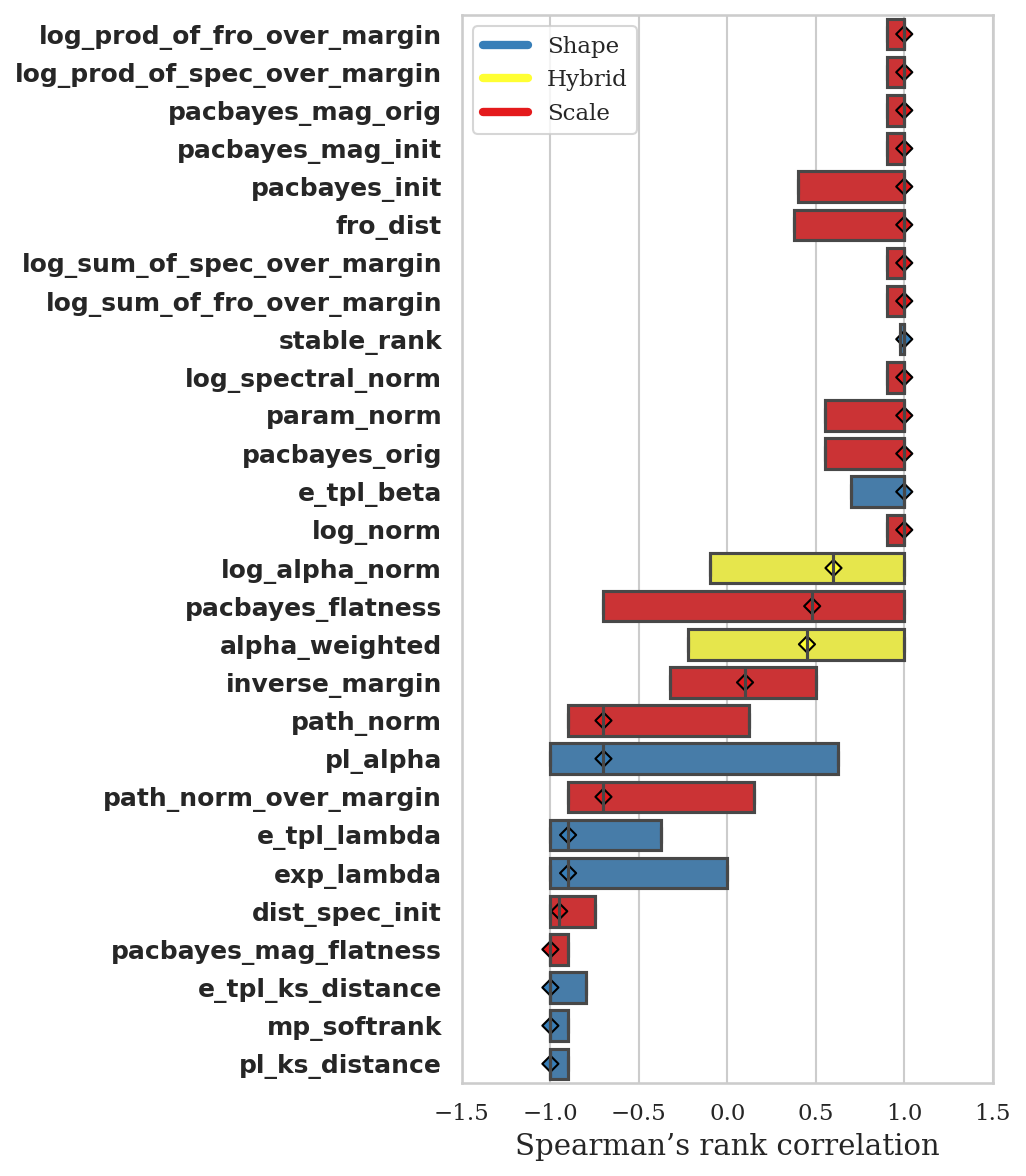

In [1658]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots(figsize=(7,8))

for label in ax.get_yticklabels():
    label.set_fontproperties('Courier New')
    label.set_fontweight('bold')

custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]

sns.boxplot(x = x, y = y, orient='h', ax=ax, palette=palette, whis=0, showfliers=False)
plt.scatter(x=np.median(values, axis=1), 
            y=range(len(values)), 
            c=[palette[k.lower()] for k in keys], 
            s=30, marker="D",
            edgecolor='black')
ax.set_xlim(-1.5,1.5)
ax.set_xlabel(r'Spearman’s rank correlation', fontsize=14)
ax.legend(custom_lines, ['Shape', 'Hybrid', 'Scale'], loc= 'upper left')
plt.tight_layout()
plt.savefig(f'boxplot_{bleu_score_type}.pdf')
#plt.show()